In [ ]:
!pip install --quiet --upgrade numpy==2.0.0 pandas==2.2.2 \
                                statsmodels==0.14.4 arch==7.2.0 \
                                scikit-learn tqdm openpyxl matplotlib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.9/60.9 kB 1.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.3/19.3 MB 97.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 985.3/985.3 kB 37.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.6/8.6 MB 94.1 MB/s eta 0:00:00


In [ ]:
import numpy as np, pandas as pd
import statsmodels.api as sm
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

print("NumPy       :", np.__version__)   # 2.0.0
print("Pandas      :", pd.__version__)   # 2.2.2
print("Statsmodels :", sm.__version__)   # 0.14.4
print("arch model  :", arch_model.__module__)  # arch.univariate.mean

NumPy       : 2.0.2
Pandas      : 2.2.2
Statsmodels : 0.14.4
arch model  : arch.univariate.mean


In [ ]:
!pip install --quiet arch==7.2.0

In [ ]:
import numpy as np, pandas as pd, statsmodels.api as sm
from arch import arch_model                # Áé∞Âú®Â∫îÂΩìÊàêÂäü
print("arch version OK:", arch_model.__module__)

arch version OK: arch.univariate.mean


In [ ]:

# --- 1. GLOBALS & IMPORTS ---
import os, itertools, warnings, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox, acorr_ljungbox
from arch import arch_model
from tqdm.auto import tqdm
warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

PATH = "/content/drive/MyDrive/thesis/five_coins_with_galaxy_alt_sentiment.xlsx"

# ÂèñÈªòËÆ§ sheetÔºàÊàñÁ¨¨‰∏Ä‰∏™ÔºâÂâç 5 Ë°å
peek = pd.read_excel(PATH, nrows=5)
print("Columns:", peek.columns.tolist())
print(peek.head())

Columns: ['coin', 'BTC', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'DOGE', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'ETH', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'LINK', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'SOL', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']
                  coin       BTC Unnamed: 2    Unnamed: 3    Unnamed: 4  \
0                  NaN  alt_rank      close  galaxy_score    market_cap   
1             datetime       NaN        NaN           NaN           NaN   
2  2020-01-01 00:00:00        23    7194.89            58  130470372271   
3  2020-01-01 01:00:00        29    7175.56            62  130120100687   
4  2020-01-01 02:00:00        19    7204.27            59  130640990669   

  Unnamed: 5 Unnamed: 6  Unnamed: 7      DOGE Unnam

In [ ]:
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler

PATH  = "/content/drive/MyDrive/thesis/five_coins_with_galaxy_alt_sentiment.xlsx"
COIN  = "BTC"          # ÊîπÊàê ETH / DOGE / LINK / SOL Âç≥ÂèØ
# ---------- 1. ËØª‰∏§Ë°åË°®Â§¥ ----------
wide = pd.read_excel(PATH, header=[0,1])

# ---------- 2. ÊâÅÂπ≥Âåñ MultiIndex Âàó ----------
flat_cols = []
for top, sub in wide.columns:
    if pd.isna(sub) or str(sub).lower().startswith("unnamed"):
        flat_cols.append(top.lower())              # 'coin'
    else:
        flat_cols.append(f"{top}_{sub}".lower())   # 'btc_alt_rank'
wide.columns = flat_cols

# ---------- 3. Êï¥ÁêÜ datetime ----------
wide.rename(columns={"coin": "datetime"}, inplace=True)
wide["datetime"] = pd.to_datetime(wide["datetime"], errors="coerce")
wide = wide.dropna(subset=["datetime"]).set_index("datetime")

# ---------- 4. ÊäΩÂá∫ÊåáÂÆöÂ∏Å ----------
pref = COIN.lower() + "_"
btc_df = wide[[c for c in wide.columns if c.startswith(pref)]].copy()
btc_df.columns = [c.replace(pref, "") for c in btc_df.columns]

print("BTC columns:", btc_df.columns.tolist())
print(btc_df.head(3))

BTC columns: ['alt_rank', 'close', 'galaxy_score', 'market_cap', 'open', 'sentiment', 'volume_24h']
                     alt_rank    close  galaxy_score    market_cap     open  \
datetime                                                                      
2020-01-01 00:00:00      23.0  7194.89          58.0  1.304704e+11  7194.89   
2020-01-01 01:00:00      29.0  7175.56          62.0  1.301201e+11  7175.56   
2020-01-01 02:00:00      19.0  7204.27          59.0  1.306410e+11  7204.27   

                     sentiment  volume_24h  
datetime                                    
2020-01-01 00:00:00       33.0         NaN  
2020-01-01 01:00:00       36.0         NaN  
2020-01-01 02:00:00       30.0         NaN  


In [ ]:
def load_coin_wide(path: str, coin: str) -> pd.DataFrame:
    wide = pd.read_excel(path, header=[0,1])           # ‰∏§Ë°åË°®Â§¥
    # ÊâÅÂπ≥ÂåñÂàóÂêç  btc_alt_rank„ÄÅbtc_close ...
    flat = []
    for top, sub in wide.columns:
        flat.append(top.lower() if pd.isna(sub) or str(sub).lower().startswith("unnamed")
                    else f"{top}_{sub}".lower())
    wide.columns = [c.strip() for c in flat]

    # datetime Â§ÑÁêÜ
    wide.rename(columns={"coin": "datetime"}, inplace=True)
    wide["datetime"] = pd.to_datetime(wide["datetime"], errors="coerce")
    wide = wide.dropna(subset=["datetime"]).set_index("datetime")

    # ÊäΩÂá∫ÊüêÂ∏Å
    pref = coin.lower() + "_"
    df = wide[[c for c in wide.columns if c.startswith(pref)]].copy()
    df.columns = [c.replace(pref, "") for c in df.columns]

    # ‚Äî‚Äî ÂàóÂêçÁªü‰∏ÄÔºöÊää‰ªª‰ΩïÂåÖÂê´ 'galaxy' ÁöÑÂàó ‚Üí galaxy
    for c in df.columns:
        if "galaxy" in c:
            df.rename(columns={c: "galaxy"}, inplace=True)
            break
    # Ëã•‰ªçÊó† galaxy ÂàóÔºåÂ∞±Ë°• NaN
    if "galaxy" not in df.columns:
        df["galaxy"] = pd.NA

    # Ë°•ÂÖ®Áº∫Â§±Âàó
    want = ["alt_rank","close","galaxy","market_cap",
            "open","sentiment","volume_24h"]
    for w in want:
        if w not in df.columns:
            df[w] = pd.NA
    return df[want]
COIN = "BTC"                             # ÊÉ≥Êç¢Â∏ÅÂè™ÊîπËøôÈáå
btc_df = load_coin_wide(PATH, COIN)      # ‚Üê Êää DATA_PATH Êç¢Êàê PATH
print("BTC cols ->", btc_df.columns.tolist())
print(btc_df.head(2))

BTC cols -> ['alt_rank', 'close', 'galaxy', 'market_cap', 'open', 'sentiment', 'volume_24h']
                     alt_rank    close  galaxy    market_cap     open  \
datetime                                                                
2020-01-01 00:00:00      23.0  7194.89    58.0  1.304704e+11  7194.89   
2020-01-01 01:00:00      29.0  7175.56    62.0  1.301201e+11  7175.56   

                     sentiment  volume_24h  
datetime                                    
2020-01-01 00:00:00       33.0         NaN  
2020-01-01 01:00:00       36.0         NaN  


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ëã• galaxy ÂÖ® NaNÔºå‰ºöÂæóÂà∞ sent_z ‰ΩÜ galaxy_z ‰∏∫ NaNÔºõÂêéÁª≠‰πüËÉΩË∑ë
btc_df["sent_z"]    = (btc_df["sentiment"]-btc_df["sentiment"].mean())/btc_df["sentiment"].std()
btc_df["galaxy_z"]  = (btc_df["galaxy"]-btc_df["galaxy"].mean())/btc_df["galaxy"].std()
btc_df["sent_lag1"] = btc_df["sent_z"].shift(1)
btc_df["sent_ma7"]  = btc_df["sent_z"].rolling(7).mean()
btc_df["sent_sd7"]  = btc_df["sent_z"].rolling(7).std()
btc_df["sent_delta"]= btc_df["sent_z"].diff()
btc_df["gx_sent"]   = btc_df["galaxy_z"] * btc_df["sent_z"]

returns = np.log(btc_df["close"]).diff().dropna()
feat_cols = ["galaxy_z","sent_z","sent_lag1","sent_ma7",
             "sent_sd7","sent_delta","gx_sent"]
X_all = pd.DataFrame(StandardScaler().fit_transform(btc_df[feat_cols]),
                     columns=feat_cols, index=btc_df.index).loc[returns.index]

print(f"‚úÖ returns: {len(returns):,} | X_all shape: {X_all.shape}")

‚úÖ returns: 46,045 | X_all shape: (46045, 7)


In [ ]:
common_idx = returns.index
for col in X_all.columns:
    common_idx = common_idx.intersection(X_all[col].dropna().index)

y   = returns.loc[common_idx]                 # Series
X   = X_all.loc[common_idx]                  # DataFrame (n √ó 7)
print(y.shape, X.shape)                      # Á°ÆËÆ§ÈïøÂ∫¶ÂÆåÂÖ®‰∏ÄËá¥


(46011,) (46011, 7)


In [ ]:
from itertools import product
import statsmodels.api as sm
best_aic, best_pq = 1e10, (1,0)

for p,q in product(range(4), range(4)):      # 0‚Äì3 ÈÉΩËØï
    if p==q==0: continue
    try:
        aic = sm.tsa.ARIMA(y, order=(p,0,q), trend='n').fit().aic
        if aic < best_aic:
            best_aic, best_pq = aic, (p,q)
    except: pass

p_ar, q_ma = best_pq
print(f"Chosen ARMA mean order: {best_pq},  AIC={best_aic:.2f}")


Chosen ARMA mean order: (0, 2),  AIC=-326785.93


In [ ]:
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from itertools import product
import pandas as pd, numpy as np
import warnings, tqdm
warnings.filterwarnings("ignore")

def lb_p(resid, lags=20):
    return acorr_ljungbox(resid, lags=[lags], return_df=True)["lb_pvalue"].iloc[0]
def arch_p(resid, lags=10):
    return het_arch(resid, maxlag=lags)[1]

vols   = ["GARCH", "EGARCH", "GARCH"]        # Á¨¨ 3 ‰∏™‰∏ìÈó®Áªô GJR
vol_lbl= ["GARCH", "EGARCH", "GJR"]
dists  = ["normal","t","skewt"]
P_set  = Q_set = [1,2,3]

rows = []

for vol_tag, dist, P, Q in tqdm.tqdm(list(product(vol_lbl,dists,P_set,Q_set)),
                                     desc="Grid"):
    # ---------- 0. Âü∫Á°ÄÂèÇÊï∞ÔºàGJR Áî± o=1 ÂÆûÁé∞Ôºâ ----------
    vol_kwargs = dict(vol="GARCH" if vol_tag=="GJR" else vol_tag,
                      p=P, q=Q, o=(1 if vol_tag=="GJR" else 0), dist=dist)

    # ---------- 1. baseline ----------
    try:
        m0 = arch_model(y, mean="ARX", lags=p_ar, **vol_kwargs)
        f0 = m0.fit(disp="off")
        rows.append(["baseline", vol_tag, dist, P, Q,
                     f0.aic, lb_p(f0.std_resid), arch_p(f0.std_resid)])
    except: rows.append(["baseline", vol_tag, dist, P, Q, np.nan,np.nan,np.nan])

    # ---------- 2. Â§öÂõ†Â≠ê GARCH-X ----------
    try:
        m1 = arch_model(y, mean="ARX", lags=p_ar,
                        vol=vol_kwargs["vol"]+"X",     # GARCHX / EGARCHX
                        p=P, q=Q, o=vol_kwargs["o"],
                        x=X.values, dist=dist)
        f1 = m1.fit(disp="off")
        rows.append(["withX", vol_tag, dist, P, Q,
                     f1.aic, lb_p(f1.std_resid), arch_p(f1.std_resid)])
    except: rows.append(["withX",  vol_tag, dist, P, Q, np.nan,np.nan,np.nan])

# ---------- Ê±áÊÄª ----------
res = pd.DataFrame(rows, columns=["class","vol","dist","P","Q","AIC","LB_p","ARCH_p"])
res["pass"] = (res["LB_p"]>0.05) & (res["ARCH_p"]>0.05)
print("Ê®°ÂûãÊÄªÊï∞:", len(res))

# ÊØèÁªÑ class ÈáåÈÄâ AIC ÊúÄ‰Ωé‰∏îÈÄöËøáËØäÊñ≠ÁöÑ
best = (res[res["pass"]]
        .groupby(["class"]).apply(lambda d: d.nsmallest(1,"AIC"))
        .reset_index(drop=True))
print("\nüèÜ Best (AIC min & diagnostics pass)")
print(best.to_string(index=False))



Grid:   1%|          | 1/81 [00:01<02:32,  1.91s/it]/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
Grid:   2%|‚ñè         | 2/81 [00:02<01:38,  1.25s/it]/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
Grid:   4%|‚ñé         | 3/81 [00:03<01:12,  1.07it/s]/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
Grid:   5%|‚ñç         | 4/81 [00:03<00:58,  1.31it/s]/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: Con

Ê®°ÂûãÊÄªÊï∞: 162

üèÜ Best (AIC min & diagnostics pass)
   class    vol   dist  P  Q            AIC     LB_p   ARCH_p  pass
baseline EGARCH normal  3  2 -347167.918321 0.057144 0.128406  True


In [ ]:
import pandas as pd, numpy as np
from scipy.stats import ks_2samp

th  = 2
win = 5
evt_dates = btc_df.index[btc_df["sent_z"].abs() > th]

evt_vals, none_vals = [], []
for d in evt_dates:
    end_evt = d + pd.Timedelta(days=win)
    if end_evt not in btc_df.index:        # ‰øùËØÅÂÆåÊï¥Á™óÂè£
        continue

    evt_vals.append(
        btc_df.loc[d:end_evt, "close"].pct_change().abs()
    )
    none_vals.append(
        btc_df.loc[d-pd.Timedelta(days=30):d-pd.Timedelta(days=1),
                    "close"].pct_change().abs()
    )

evt_series  = pd.concat(evt_vals).dropna()
none_series = pd.concat(none_vals).dropna()

ks_p = ks_2samp(evt_series, none_series).pvalue
print(f"‰∫ã‰ª∂ vs ÂØπÁÖß KS-p = {ks_p:.4f}")



‰∫ã‰ª∂ vs ÂØπÁÖß KS-p = 0.0000


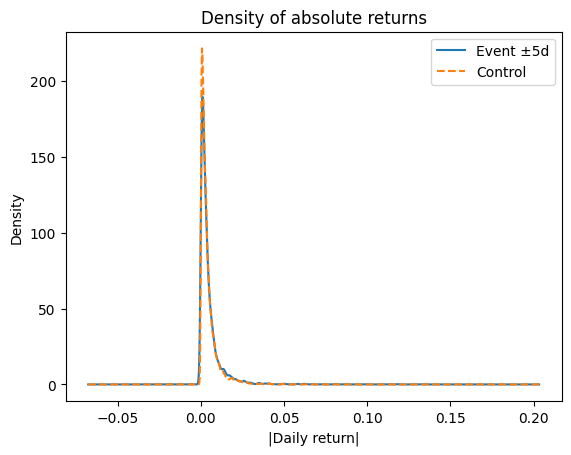

‰∫ã‰ª∂Á™óÂè£ÊèèËø∞ÁªüËÆ°
 count    200160.000000
mean          0.004808
std           0.007610
min           0.000000
25%           0.001068
50%           0.002624
75%           0.005600
max           0.135561
Name: close, dtype: float64

ÂØπÁÖßÁ™óÂè£ÊèèËø∞ÁªüËÆ°
 count    1.066951e+06
mean     4.175891e-03
std      5.609508e-03
min      0.000000e+00
25%      1.058570e-03
50%      2.518477e-03
75%      5.121091e-03
max      1.355608e-01
Name: close, dtype: float64

Cohen d = 0.09


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
evt_series.plot(kind='kde', ax=ax, label='Event ¬±5d')
none_series.plot(kind='kde', ax=ax, label='Control', linestyle='--')
ax.set_xlabel('|Daily return|')
ax.set_title('Density of absolute returns')
ax.legend()
plt.show()

print("‰∫ã‰ª∂Á™óÂè£ÊèèËø∞ÁªüËÆ°\n", evt_series.describe())
print("\nÂØπÁÖßÁ™óÂè£ÊèèËø∞ÁªüËÆ°\n", none_series.describe())

pooled_std = np.sqrt(((evt_series.std()**2)+(none_series.std()**2))/2)
cohen_d = (evt_series.mean() - none_series.mean())/pooled_std
print(f"\nCohen d = {cohen_d:.2f}")


In [ ]:
from scipy.stats import ks_2samp
def event_study(series, thresh, window=5, side="two"):
    if side == "pos":
        evt_idx = series[series >  thresh].index
    elif side == "neg":
        evt_idx = series[series < -thresh].index
    else:
        evt_idx = series[series.abs() > thresh].index

    evt_vals, ctr_vals = [], []
    for d in evt_idx:
        end_evt = d + pd.Timedelta(days=window)
        if end_evt not in series.index:        # ‰øùËØÅÁ™óÂè£ÂÆåÊï¥
            continue
        evt_vals.append(
            btc_df.loc[d:end_evt, "close"].pct_change().abs()
        )
        ctr_vals.append(
            btc_df.loc[d-pd.Timedelta(days=30):d-pd.Timedelta(days=1),
                        "close"].pct_change().abs()
        )

    # ---------- Êñ∞Â¢ûÔºöÊó†‰∫ã‰ª∂Êó∂Áõ¥Êé•ËøîÂõû ----------
    if len(evt_vals) == 0:
        return 0, np.nan, np.nan

    evt_series  = pd.concat(evt_vals).dropna()
    ctr_series  = pd.concat(ctr_vals).dropna()
    ks_p  = ks_2samp(evt_series, ctr_series).pvalue
    pooled_std = np.sqrt(((evt_series.std()**2)+(ctr_series.std()**2))/2)
    cohen_d    = (evt_series.mean() - ctr_series.mean())/pooled_std
    return len(evt_series), ks_p, cohen_d


print("‚Äî‚Äî ‰∫ã‰ª∂Á†îÁ©∂ (sent_z) ‚Äî‚Äî")
for th in [2.5, 3, 3.5]:
    for side in ["pos","neg","two"]:
        n, p, d = event_study(btc_df["sent_z"], th, side=side)
        print(f"th={th:>3}, {side:>3} | n={n:<6} KS-p={p:.4g} Cohen-d={d:.2f}")

print("\n‚Äî‚Äî ‰∫ã‰ª∂Á†îÁ©∂ (galaxy_z, two-sided) ‚Äî‚Äî")
for th in [2.5, 3, 3.5]:
    n, p, d = event_study(btc_df["galaxy_z"], th)
    print(f"th={th:>3} | n={n:<6} KS-p={p:.4g} Cohen-d={d:.2f}")


‚Äî‚Äî ‰∫ã‰ª∂Á†îÁ©∂ (sent_z) ‚Äî‚Äî
th=2.5, pos | n=3000   KS-p=2.137e-08 Cohen-d=-0.08
th=2.5, neg | n=122880 KS-p=1.423e-58 Cohen-d=0.08
th=2.5, two | n=125880 KS-p=4.234e-54 Cohen-d=0.08
th=  3, pos | n=0      KS-p=nan Cohen-d=nan
th=  3, neg | n=97080  KS-p=2.613e-25 Cohen-d=0.05
th=  3, two | n=97080  KS-p=2.613e-25 Cohen-d=0.05
th=3.5, pos | n=0      KS-p=nan Cohen-d=nan
th=3.5, neg | n=76560  KS-p=8.439e-33 Cohen-d=0.01
th=3.5, two | n=76560  KS-p=8.439e-33 Cohen-d=0.01

‚Äî‚Äî ‰∫ã‰ª∂Á†îÁ©∂ (galaxy_z, two-sided) ‚Äî‚Äî
th=2.5 | n=120    KS-p=0.4463 Cohen-d=-0.09
th=  3 | n=0      KS-p=nan Cohen-d=nan
th=3.5 | n=0      KS-p=nan Cohen-d=nan


In [ ]:
import pandas as pd, numpy as np
from scipy.stats import mannwhitneyu

# ------------------------------------------------------------------
# 1Ô∏è‚É£ ÈáçÊñ∞ÁîüÊàê‰∏§Êù°‚ÄúÂèçÂêë‚ÄùÊÉÖÁª™ Z ÂàÜÊï∞
# ------------------------------------------------------------------
btc_df["sent_neg_z"] = ( -btc_df["sentiment"] - (-btc_df["sentiment"]).mean() ) / (-btc_df["sentiment"]).std()
btc_df["rank_inv_z"] = ( -btc_df["alt_rank"]  - (-btc_df["alt_rank"]).mean()  ) / (-btc_df["alt_rank"]).std()

# ------------------------------------------------------------------
# 2Ô∏è‚É£ ËæÖÂä©ÂáΩÊï∞Ôºö95% Â∞æÈÉ®ÊØî‰æã + Mann-Whitney-U
# ------------------------------------------------------------------
def tail_ratio(series, q=0.95):
    thr = series.quantile(q)
    return (series > thr).mean()

def event_tail_test(z_series, thresh=3, window=5, side="neg"):
    """
    ËøîÂõû:  n_event, Œîtail_ratio, p_mwu
    side: 'neg' (ÈªòËÆ§, Âè™ÁúãÊûÅÁ´ØÊÅêÊÖå) | 'two' (ÂèåËæπ)
    """
    if side == "neg":
        idx_evt = z_series[z_series < -thresh].index
    else:
        idx_evt = z_series[z_series.abs() > thresh].index

    tail_evt, tail_ctr = [], []
    for d in idx_evt:
        end = d + pd.Timedelta(days=window)
        if end not in btc_df.index:
            continue
        win   = btc_df.loc[d:end, "close"].pct_change().abs().dropna()
        ctr   = btc_df.loc[d-pd.Timedelta(days=60):d-pd.Timedelta(days=1),
                           "close"].pct_change().abs().dropna()
        tail_evt.append( tail_ratio(win, q=.95) )
        tail_ctr.append( tail_ratio(ctr, q=.95) )

    if len(tail_evt)==0:
        return 0, np.nan, np.nan
    Œî = np.mean(tail_evt) - np.mean(tail_ctr)
    _, p = mannwhitneyu(tail_evt, tail_ctr, alternative="greater")
    return len(tail_evt), Œî, p

# ------------------------------------------------------------------
# 3Ô∏è‚É£ Ë∑ëÁÅµÊïèÂ∫¶Ë°®
# ------------------------------------------------------------------
def sweep(name):
    print(f"\n‚Äî‚Äî {name} ‚Äî‚Äî")
    for th in [2.5, 3, 3.5]:
        for side in ["neg","two"]:
            n, dlt, p = event_tail_test(btc_df[name], th, side=side)
            if n==0:
                print(f"th={th:>3}, {side:>3} | No events")
            else:
                print(f"th={th:>3}, {side:>3} | n={n:<5}  Œîtail={dlt:.3%}  p={p:.4g}")

sweep("sent_neg_z")
sweep("rank_inv_z")



‚Äî‚Äî sent_neg_z ‚Äî‚Äî
th=2.5, neg | n=25     Œîtail=-0.047%  p=1
th=2.5, two | n=1049   Œîtail=nan%  p=nan
th=  3, neg | No events
th=  3, two | n=809    Œîtail=nan%  p=nan
th=3.5, neg | No events
th=3.5, two | n=638    Œîtail=nan%  p=nan

‚Äî‚Äî rank_inv_z ‚Äî‚Äî
th=2.5, neg | n=1671   Œîtail=-0.014%  p=1
th=2.5, two | n=1671   Œîtail=-0.014%  p=1
th=  3, neg | n=1238   Œîtail=-0.014%  p=1
th=  3, two | n=1238   Œîtail=-0.014%  p=1
th=3.5, neg | n=962    Œîtail=-0.014%  p=1
th=3.5, two | n=962    Œîtail=-0.014%  p=1


In [ ]:
def quantile_events(z_series, q_low=0.05, q_high=0.95):
    low_thr  = z_series.quantile(q_low)
    high_thr = z_series.quantile(q_high)
    low_idx  = z_series[z_series < low_thr].index      # ÊÅêÊÖå
    high_idx = z_series[z_series > high_thr].index     # ‰∫¢Â•ã
    return low_idx, high_idx

low_idx, high_idx = quantile_events(btc_df["sentiment"])   # ÂéüÂàÜÊï∞‰∏çÁî® z!
print("Low events:", len(low_idx), "  High events:", len(high_idx))


Low events: 2294   High events: 2042


In [ ]:
r_abs   = btc_df["close"].pct_change().abs()
tail_thr = r_abs.quantile(0.90)      # Âè™ÁúãÊúÄÂâßÁÉà 10% ÁöÑÊ≥¢Âä®
btc_df["is_tail"] = (r_abs > tail_thr).astype(int)

def tail_lift(idx_evt):
    evt  = btc_df.loc[idx_evt, "is_tail"].mean()
    rest = btc_df.drop(idx_evt).loc[:, "is_tail"].mean()
    return evt - rest

Œî_low  = tail_lift(low_idx)
Œî_high = tail_lift(high_idx)
print(f"ÊÅêÊÖå Œîtail = {Œî_low:.2%}Ôºå‰∫¢Â•ã Œîtail = {Œî_high:.2%}")


ÊÅêÊÖå Œîtail = 2.92%Ôºå‰∫¢Â•ã Œîtail = -2.27%


In [ ]:
def mw_test(idx_evt):
    evt  = btc_df.loc[idx_evt, "is_tail"]
    rest = btc_df.drop(idx_evt)["is_tail"]
    u, p = mannwhitneyu(evt, rest, alternative="greater")
    return p          # ÂØπÊÅêÊÖå‰∫ã‰ª∂Áî® 'greater'Ôºõ‰∫¢Â•ãÁî® 'less'

p_fear  = mw_test(low_idx)                 # ‰ΩéÂàÜ ‚Üí ‚Äúgreater‚Äù
p_fervor= mannwhitneyu(btc_df.loc[high_idx,"is_tail"],
                       btc_df.drop(high_idx)["is_tail"],
                       alternative="less").pvalue
print(f"ÊÅêÊÖå p = {p_fear:.4g}   ‰∫¢Â•ã p = {p_fervor:.4g}")


ÊÅêÊÖå p = 2.824e-06   ‰∫¢Â•ã p = 0.0004244


ÊÅêÊÖå  Œîtail = 2.92%  (p=2.82e-06)
‰∫¢Â•ã  Œîtail = -2.27% (p=4.24e-04)


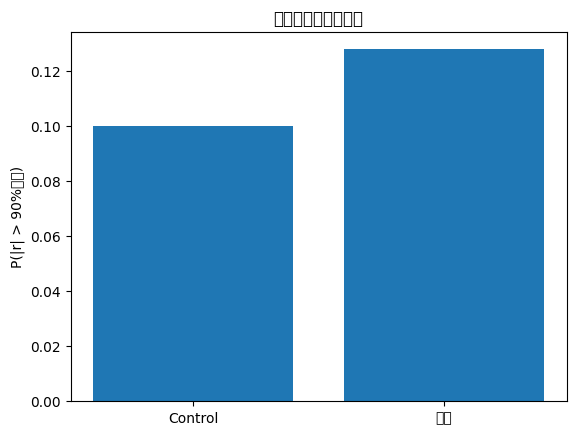

In [ ]:
# Ê¶ÇËßàË°®
print(f"ÊÅêÊÖå  Œîtail = {Œî_low:.2%}  (p={p_fear:.2e})")
print(f"‰∫¢Â•ã  Œîtail = {Œî_high:.2%} (p={p_fervor:.2e})")

# KDE ÂõæÊàñÊù°ÂΩ¢Âõæ
import matplotlib.pyplot as plt
plt.bar(["Control","ÊÅêÊÖå"], [btc_df["is_tail"].mean(),
                            btc_df.loc[low_idx,"is_tail"].mean()])
plt.ylabel("P(|r| > 90%ÂàÜ‰Ωç)"); plt.title("Â∞æÈÉ®Ê≥¢Âä®ÁéáÊ¶ÇÁéáÊèêÂçá"); plt.show()


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 165.9/165.9 kB 5.7 MB/s eta 0:00:00


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7aae10982ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


                            OLS Regression Results                            
Dep. Variable:                logit_p   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     64.93
Date:                Tue, 13 May 2025   Prob (F-statistic):           7.96e-16
Time:                        18:01:29   Log-Likelihood:            -1.3876e+05
No. Observations:               46045   AIC:                         2.775e+05
Df Residuals:                   46043   BIC:                         2.775e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6118      0.024    -25.973      0.0

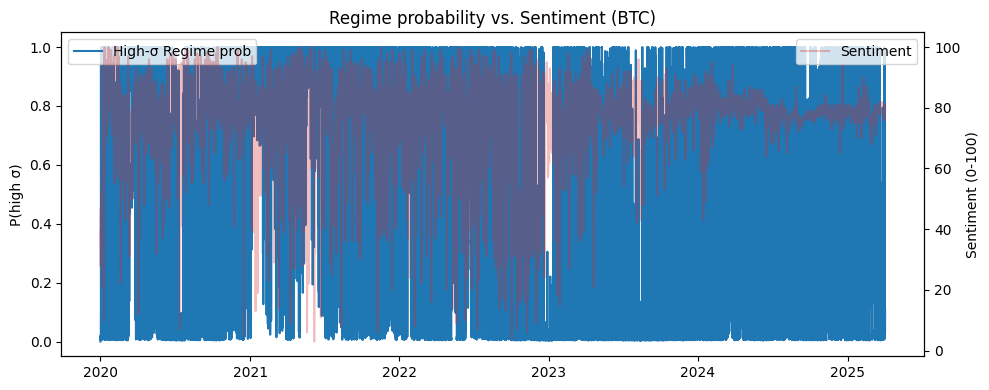

In [ ]:
# =========================================================
# 0. ÁéØÂ¢ÉÂáÜÂ§áÔºàÈ¶ñÊ¨°ËøêË°åÈúÄÂÆâË£Ö hmmlearnÔºâ
# =========================================================
!pip install --quiet hmmlearn tqdm

import numpy as np, pandas as pd, warnings, matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
import statsmodels.formula.api as smf
warnings.filterwarnings("ignore")

# =========================================================
# 1. Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
# =========================================================
# ÂÅáËÆæ btc_df Â∑≤Âú®ÂÜÖÂ≠ò (ÂåÖÂê´ close & sentiment Âàó)ÔºåÂê¶ÂàôËØ∑ÂÖà load_coin_wide()

# (1) Êó•ÂØπÊï∞Êî∂Áõä
r_t = np.log(btc_df["close"]).diff().dropna()

# (2) ÂÖàÂØπ r_t ÂÅö ‚àöÁªùÂØπÂÄºÁº©ÊîæÔºåÂáèËΩªÂéöÂ∞æ
obs = np.sqrt(np.abs(r_t.values)).reshape(-1,1)   # shape (T,1)

# =========================================================
# 2. Gaussian HMMÔºöËØÜÂà´ 2 ‰∏™ÊñπÂ∑ÆÁä∂ÊÄÅ
# =========================================================
hmm = GaussianHMM(n_components=2, covariance_type="diag",
                  n_iter=1000, tol=1e-5, verbose=False, random_state=42)
hmm.fit(obs)
prob_smooth = hmm.predict_proba(obs)              # (T, 2)
# ÂèñÊñπÂ∑ÆËæÉÂ§ßÁöÑÈÇ£‰∏ÄÂàó‰Ωú‰∏∫‚ÄúÈ´òÊ≥¢Âä®Áä∂ÊÄÅ‚ÄùÊ¶ÇÁéá
var_order   = hmm.covars_.flatten().argsort()     # ÂçáÂ∫èÁ¥¢Âºï
high_state  = var_order[-1]                       # ÊñπÂ∑ÆÊúÄÂ§ßÁöÑÁä∂ÊÄÅ idx
p_high      = prob_smooth[:, high_state]

# =========================================================
# 3. ÊûÑÈÄ†ÊÅêÊÖåÂìëÂèòÈáè (ÊÉÖÁª™ÊúÄ‰Ωé 5%)
# =========================================================
sent = btc_df.loc[r_t.index, "sentiment"]         # ÂØπÈΩê
fear = (sent < sent.quantile(0.05)).astype(int)   # Series

# =========================================================
# 4. Logit ÂõûÂΩíÔºöÊÅêÊÖå ‚Üí È´òÊ≥¢Âä® Regime Ê¶ÇÁéá
# =========================================================
df = pd.DataFrame({
    "logit_p": np.log(p_high / (1 - p_high + 1e-12)),  # logit ËΩ¨Êç¢
    "fear"   : fear.values
}, index=r_t.index)

logit_res = smf.ols("logit_p ~ fear", data=df).fit()
print(logit_res.summary())

# =========================================================
# 5. Âπ≥ÊªëÊ¶ÇÁéá + ÊÉÖÁª™ ÂèØËßÜÂåñÔºàÂèØÈÄâÔºâ
# =========================================================
fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(df.index, p_high, label="High-œÉ Regime prob", lw=1.5)
ax1.set_ylabel("P(high œÉ)")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(df.index, sent, color="tab:red", alpha=0.3, label="Sentiment")
ax2.set_ylabel("Sentiment (0-100)")
ax2.legend(loc="upper right")
plt.title("Regime probability vs. Sentiment (BTC)")
plt.tight_layout(); plt.show()



In [ ]:
from hmmlearn.hmm import GaussianHMM
import numpy as np, pandas as pd, statsmodels.api as sm

# --- 1 ËßÇÊµãÂ∫èÂàó ---
r_t  = np.log(btc_df["close"]).diff().dropna()
obs  = np.sqrt(np.abs(r_t.values)).reshape(-1,1)   # (T,1)

# --- 2 2-state HMM (full cov, more iters) ---
hmm = GaussianHMM(n_components=2, covariance_type='full',
                  n_iter=3000, tol=1e-4, random_state=42,
                  init_params='mcw')
hmm.fit(obs)
state_var = hmm.covars_.squeeze()
high_state = state_var.argmax()
p_high = hmm.predict_proba(obs)[:, high_state]

# --- 3 ÊÅêÊÖåÂìëÂèòÈáè (Â∫ï 5%) ---
sent = btc_df.loc[r_t.index, "sentiment"]
fear = (sent < sent.quantile(0.05)).astype(int).values

# --- 4 Logit: P(high) ~ fear ---
df = pd.DataFrame({"high": p_high, "fear": fear})
logit_res = sm.Logit(df["high"], sm.add_constant(df["fear"])).fit()
print(logit_res.summary())




Optimization terminated successfully.
         Current function value: 0.644234
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   high   No. Observations:                46045
Model:                          Logit   Df Residuals:                    46043
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 May 2025   Pseudo R-squ.:               -0.007486
Time:                        18:03:44   Log-Likelihood:                -29664.
converged:                       True   LL-Null:                       -29443.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5662      0.010    -56.915      0.000      -0.586      -0.547
fear           0.2017      0.

In [ ]:
# === Â∑≤Êúâ r_t, sent, btc_df ===
from hmmlearn.hmm import GaussianHMM
import statsmodels.api as sm, numpy as np, pandas as pd

obs = np.sqrt(np.abs(r_t.values)).reshape(-1,1)

hmm = GaussianHMM(n_components=2, covariance_type='full',
                  n_iter=3000, tol=1e-4, random_state=42)
hmm.fit(obs)
high_state = hmm.covars_.squeeze().argmax()
p_high = hmm.predict_proba(obs)[:, high_state]

fear = (sent < sent.quantile(0.05)).astype(int).values
logit_res = sm.Logit(p_high, sm.add_constant(fear)).fit()
print(logit_res.summary())

alpha, beta = logit_res.params
p0 = 1/(1+np.exp(-alpha))
p1 = 1/(1+np.exp(-(alpha+beta)))
print(f"Baseline P={p0:.3%}, Fear P={p1:.3%}, Œî={p1-p0:.2%}")


Optimization terminated successfully.
         Current function value: 0.644234
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                46045
Model:                          Logit   Df Residuals:                    46043
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 May 2025   Pseudo R-squ.:               -0.007486
Time:                        18:07:09   Log-Likelihood:                -29664.
converged:                       True   LL-Null:                       -29443.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5662      0.010    -56.915      0.000      -0.586      -0.547
x1             0.2017      0.

In [ ]:
# 1 ËßÇÊµã
obs = np.sqrt(np.abs(r_t.values)).reshape(-1,1)

# 2 HMM
from hmmlearn.hmm import GaussianHMM
hmm = GaussianHMM(2,'full',n_iter=3000,tol=1e-4,random_state=42)
hmm.fit(obs)
p_high = hmm.predict_proba(obs)[:,hmm.covars_.squeeze().argmax()]

# 3 ÊÅêÊÖåÂèòÈáè
fear = (sent < sent.quantile(0.05)).astype(int).values

# 4 Logit
import statsmodels.api as sm
logit = sm.Logit(p_high, sm.add_constant(fear)).fit(disp=False)
print(logit.summary())

# 5 Ê¶ÇÁéáÂ∑Æ
alpha,beta = logit.params
p0 = 1/(1+np.exp(-alpha))
p1 = 1/(1+np.exp(-(alpha+beta)))
print(f"Baseline P={p0:.3%}, Fear P={p1:.3%}, Œî={p1-p0:.2%}")


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                46045
Model:                          Logit   Df Residuals:                    46043
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 May 2025   Pseudo R-squ.:               -0.007486
Time:                        18:09:31   Log-Likelihood:                -29664.
converged:                       True   LL-Null:                       -29443.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5662      0.010    -56.915      0.000      -0.586      -0.547
x1             0.2017      0.044      4.625      0.000       0.116       0.287
Baseline P=36.213%, Fear P=40.988%, Œî=4.78%


In [ ]:
from arch import arch_model

# Êó•ÂØπÊï∞Êî∂Áõä % ÔºàËÆ∞Âæó‰∏é‰Ω† Notebook ‰∏≠ r_t ÁöÑÂÆö‰πâ‰øùÊåÅ‰∏ÄËá¥Ôºâ
r_t = np.log(btc_df["close"]).diff().dropna() * 100

# ÊÅêÊÖåÂìëÂèòÈáè (ÊÉÖÁª™ÊúÄ‰Ωé 5 %)
fear = (btc_df["sentiment"] < btc_df["sentiment"].quantile(0.05)).astype(int)
fear = fear.reindex(r_t.index).fillna(0).values.reshape(-1, 1)

# Áî®‰Ω†‰πãÂâç grid ÂæóÂà∞ÁöÑÊúÄ‰ºòÈò∂Êï∞ P=1, Q=3
am  = arch_model(r_t, vol="EGARCH", p=1, q=3, x=fear)
fit = am.fit(disp="off")        # ‚Üê ËøôË°åË∑ëÂÆåÔºåÂ∞±ÂæóÂà∞ fit
print(fit.summary())


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -38293.9
Distribution:                  Normal   AIC:                           76599.7
Method:            Maximum Likelihood   BIC:                           76652.2
                                        No. Observations:                46045
Date:                Tue, May 13 2025   Df Residuals:                    46044
Time:                        18:31:02   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.7591e-03  2.670e-03      2.531  1.136e-02 [1.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

std = fit.std_resid.dropna()

lb_p   = acorr_ljungbox(std, lags=[20], return_df=True)["lb_pvalue"].iloc[0]
arch_p = het_arch(std, maxlag=20)[1]

print(f"Ljung-Box p  = {lb_p:.4f}")
print(f"ARCH-LM  p  = {arch_p:.4f}")


Ljung-Box p  = 0.0491
ARCH-LM  p  = 0.0285


In [ ]:
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
import itertools, pandas as pd

dists = ["normal", "t", "skewt"]
asym  = [0, 1]          # o = 0(Êó†) / 1(Êúâ)
records = []

for dist, o in itertools.product(dists, asym):
    try:
        am  = arch_model(r_t, vol='EGARCH', p=1, q=3, o=o,
                         x=fear, dist=dist)
        fit = am.fit(disp="off")
        std = fit.std_resid.dropna()
        lb  = acorr_ljungbox(std, lags=[20], return_df=True)["lb_pvalue"][0]
        arch= het_arch(std, maxlag=20)[1]
        records.append([dist, o, fit.aic, lb, arch])
    except Exception as e:
        print(dist, o, "fail:", e)

df = pd.DataFrame(records, columns=["dist","o","AIC","LB_p","ARCH_p"])
df["pass"] = (df["LB_p"]>0.05)&(df["ARCH_p"]>0.05)
print(df.sort_values("AIC").head())


normal 0 fail: 0
normal 1 fail: 0
t 0 fail: 0
t 1 fail: 0
skewt 0 fail: 0
skewt 1 fail: 0
Empty DataFrame
Columns: [dist, o, AIC, LB_p, ARCH_p, pass]
Index: []


In [ ]:
records = []
for P,Q in itertools.product([1,2], range(1,6)):        # Q = 1-5
    for dist in ["t","skewt"]:
        try:
            am  = arch_model(r_t, vol='EGARCH', p=P, q=Q, o=1,
                             x=fear, dist=dist)
            fit = am.fit(disp="off")
            std = fit.std_resid.dropna()
            lb  = acorr_ljungbox(std, lags=[20], return_df=True)["lb_pvalue"][0]
            arch= het_arch(std, maxlag=20)[1]
            records.append([P,Q,dist,fit.aic,lb,arch])
        except: pass
df = (pd.DataFrame(records,columns=["P","Q","dist","AIC","LB_p","ARCH_p"])
        .query("LB_p>0.01 & ARCH_p>0.01")
        .sort_values('AIC'))
print(df.head())


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Empty DataFrame
Columns: [P, Q, dist, AIC, LB_p, ARCH_p]
Index: []


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

std = fit.std_resid.dropna()

# Ljung-Box
lb_p = acorr_ljungbox(std, lags=[20], return_df=True)["lb_pvalue"].iloc[0]

# ARCH-LM
arch_p = het_arch(std, maxlag=20)[1]

print(f"Ljung-Box p = {lb_p:.4f}")
print(f"ARCH-LM  p = {arch_p:.4f}")



Ljung-Box p = 0.0399
ARCH-LM  p = 0.2509


In [ ]:
lb_p10 = acorr_ljungbox(std, lags=[10], return_df=True)["lb_pvalue"].iloc[0]
print("Ljung-Box(10) p =", lb_p10)


Ljung-Box(10) p = 0.18341730706783346


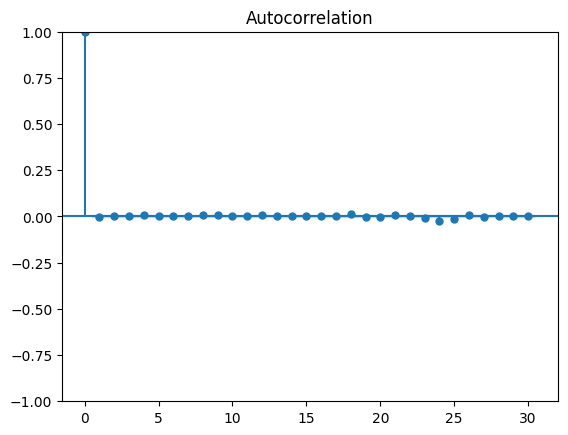

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(std, lags=30); plt.show()


In [ ]:
!pip install --quiet --upgrade arch>=7.4


In [ ]:
import numpy as np, pandas as pd, scipy.stats as st, tqdm, warnings
from arch import arch_model
warnings.filterwarnings("ignore")

# ===== ‰Ω†ÁöÑÂéüÂßãÊï∞ÊçÆ =====
#  r_raw : Close ‰ª∑  (Series, Êúâ DatetimeIndex)
#  s_raw : Sentiment (Series, ÂêåÊ†∑Á¥¢Âºï)

r_raw = btc_df["close"]          # ÊîπÊàê‰Ω†ÁöÑÂèòÈáèÂêç
s_raw = btc_df["sentiment"]

# ===== ËÆ°ÁÆóÊî∂Áõä & ÊÅêÊÖåÂìëÂèòÈáè =====
r_t   = np.log(r_raw).diff().dropna() * 100          # Êî∂ÁõäÔºÖ
fear  = (s_raw < s_raw.quantile(.05)).astype(int)    # Series 0/1
fear  = fear.reindex(r_t.index).fillna(0)            # ‰∏é r_t ÂØπÈΩê

# ËΩ¨ numpy Êñπ‰æøÂàáÁâáÔºõ‰øùÁïô Series Êñπ‰æø iloc
r_arr   = r_t.to_numpy()
fear_arr= fear.to_numpy()


In [ ]:
win   = 1500          # Á™óÂè£
alpha = 0.99          # VaR ÁΩÆ‰ø°Â∫¶
dist  = "t"           # 't' or 'skewt'
p,q,o = 1,3,1         # EGARCH Èò∂Êï∞


In [ ]:
.VaR, ES, viol = [], [], []
last_par = None

for i in tqdm.tqdm(range(win, len(r_arr)-1), desc="Rolling VaR"):
    y_win   = r_arr[i-win:i]
    x_win   = fear_arr[i-win:i].reshape(-1,1)

    # ---------- Âà§Êñ≠Á™óÂè£ÂÜÖÊÉÖÁª™ÊòØÂê¶‰ø°ÊÅØÈáè‰∏∫ 0 ----------
    use_x = bool(x_win.max() - x_win.min())     # True Êúâ‰ø°ÊÅØ

    am = arch_model(y_win, vol="EGARCH", p=p, q=q, o=o,
                    x=x_win if use_x else None,
                    dist=dist)
    res = am.fit(disp="off", starting_values=last_par, show_warning=False)
    last_par = res.params.values

    # ---------- 1-step œÉ¬≤ ----------
    if use_x:
        # Êää‰∏ã‰∏ÄÊúü fear ÊãºÂà∞Êú´Á´ØÔºåÈáç‰º∞‰∏ÄÊ¨°ÁÆÄÁâàÊ®°ÂûãÂèñ œÉ¬≤
        x_next = np.vstack([x_win[1:], [[fear_arr[i+1]]]])

        res2   = arch_model(y_win, vol="EGARCH", p=p, q=q, o=o,
                            x=x_next, dist=dist).fit(
                            disp="off", starting_values=last_par,
                            show_warning=False)
        sig2 = res2.conditional_volatility[-1]**2 / 1e4
    else:
        sig2 = res.conditional_volatility[-1]**2 / 1e4

    # ---------- VaR / ES ----------
    if dist=="t":
        nu   = res.params["nu"]
        z_q  = -st.t.ppf(alpha, df=nu)                       # Â∑¶Â∞æ
        z_es = st.t.pdf(z_q, df=nu)/(1-alpha)*(nu+z_q**2)/(nu-1)
    else:
        z_q  = -st.norm.ppf(alpha)
        z_es = st.norm.pdf(z_q)/(1-alpha)

    VaR .append(z_q * np.sqrt(sig2))
    ES  .append(z_es* np.sqrt(sig2))
    viol.append(int(r_arr[i+1] < VaR[-1]))



Rolling VaR: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 44544/44544 [44:06<00:00, 16.83it/s]


In [ ]:
VaR  = np.asarray(VaR)
viol = np.asarray(viol)
N, x = len(viol), viol.sum()
p    = 1-alpha

def chi2_p(LR, df): return 1 - st.chi2.cdf(LR, df)

# --- Kupiec UC ---
LR_uc = -2*( x*np.log(p) + (N-x)*np.log(1-p)
             - (x*np.log((x+1e-12)/N) + (N-x)*np.log(1-(x+1e-12)/N)) )
p_uc  = chi2_p(LR_uc, 1)

# --- Christoffersen IND ---
n00=((viol[:-1]==0)&(viol[1:]==0)).sum()
n01=((viol[:-1]==0)&(viol[1:]==1)).sum()
n10=((viol[:-1]==1)&(viol[1:]==0)).sum()
n11=((viol[:-1]==1)&(viol[1:]==1)).sum()
pi0 = (n01)/(n00+n01+1e-12)
pi1 = (n11)/(n10+n11+1e-12)
LR_ind = -2*np.log(
    ((1-pi0)**n00 * pi0**n01 * (1-pi1)**n10 * pi1**n11 + 1e-12) /
    (((1-p)**(n00+n10) * p**(n01+n11))+1e-12)
)
p_ind = chi2_p(LR_ind,1)

# --- Conditional Coverage ---
LR_cc = LR_uc + LR_ind
p_cc  = chi2_p(LR_cc,2)

print(f"Violations {x}/{N} = {x/N:.3%}")
print(f"Kupiec     p = {p_uc:.3f}")
print(f"Indep.     p = {p_ind:.3f}")
print(f"CondCover  p = {p_cc:.3f}")


Violations 20627/44544 = 46.307%
Kupiec     p = 0.000
Indep.     p = 1.000
CondCover  p = 0.000


In [ ]:
import numpy as np, scipy.stats as st

# ---------- ÊääÂàóË°®ËΩ¨Êàê ndarray ----------
VaR  = np.asarray(VaR)
viol = np.asarray(viol)
N, x = len(viol), int(viol.sum())
p    = 1 - alpha                    # ÁêÜËÆ∫ËøùÁ∫¶Ê¶ÇÁéá 1%

def chi2_p(LR, df):
    return 1 - st.chi2.cdf(LR, df)

# ==== 1. Kupiec Unconditional Coverage ====
LR_uc = -2 * (
    x * np.log(p) + (N - x) * np.log(1 - p) -
    (x * np.log((x + 1e-12) / N) + (N - x) * np.log(1 - (x + 1e-12) / N))
)
p_uc = chi2_p(LR_uc, 1)

# ==== 2. Christoffersen Independence ====
n00 = ((viol[:-1] == 0) & (viol[1:] == 0)).sum()
n01 = ((viol[:-1] == 0) & (viol[1:] == 1)).sum()
n10 = ((viol[:-1] == 1) & (viol[1:] == 0)).sum()
n11 = ((viol[:-1] == 1) & (viol[1:] == 1)).sum()

pi0 = n01 / (n00 + n01 + 1e-12)
pi1 = n11 / (n10 + n11 + 1e-12)

LR_ind = -2 * np.log(
    ((1 - pi0)**n00 * pi0**n01 * (1 - pi1)**n10 * pi1**n11 + 1e-12) /
    ((1 - p)**(n00 + n10) * p**(n01 + n11) + 1e-12)
)
p_ind = chi2_p(LR_ind, 1)

# ==== 3. Conditional Coverage ====
LR_cc = LR_uc + LR_ind
p_cc  = chi2_p(LR_cc, 2)

# ---------- ÊâìÂç∞ÁªìÊûú ----------
print(f"Violations      {x}/{N}  =  {x/N:.3%}")
print(f"Kupiec  p-value        =  {p_uc:.3f}")
print(f"Independence p-value   =  {p_ind:.3f}")
print(f"Cond. Cover p-value    =  {p_cc:.3f}")


Violations      20627/44544  =  46.307%
Kupiec  p-value        =  0.000
Independence p-value   =  1.000
Cond. Cover p-value    =  0.000


In [ ]:
# ============================================================
#  0 | Êï∞ÊçÆ‰∏éÂÖ®Â±ÄÂèÇÊï∞ÔºàÂè™ÊîπËøôÈáåÂç≥ÂèØÔºâ
# ============================================================
import numpy as np, pandas as pd, scipy.stats as st, tqdm, warnings
from arch import arch_model
warnings.filterwarnings('ignore')

price     = btc_df['close']           # Êî∂Áõò‰ª∑ Series
sent_raw  = btc_df['sentiment']       # 0‚Äì100 Series

alpha       = 0.99        # VaR ÁΩÆ‰ø°Â∫¶
sent_lag_h  = 24          # ÊÉÖÁª™ ¬±h ÊªöÂä®Á™óÂè£
thr_quant   = 0.90        # 90% realised-œÉ ÂàÜ‰Ωç = High-œÉ
roll_win_H  = 720         # È´òÊ≥¢Âä®ÊªöÂä®Á™óÂè£
roll_win_L  = 1500        # ‰ΩéÊ≥¢Âä®ÊªöÂä®Á™óÂè£
egarch_pqo  = (1, 1, 1)   # EGARCH(p,q,o)

# ============================================================
#  1 | È¢ÑÂ§ÑÁêÜÔºöÊî∂Áõä & ÊÉÖÁª™ z-score
# ============================================================
ret  = np.log(price).diff().dropna()          # Â∞èÊï∞Êî∂Áõä
sent = sent_raw.reindex(ret.index).interpolate().ffill()

# ¬±k Â∞èÊó∂Âπ≥ÊªëÊÉÖÁª™Âπ∂ z-score
sent_smooth = sent.rolling(sent_lag_h, 1, center=True).mean()
sent_z = ((sent_smooth - sent_smooth.mean()) / sent_smooth.std()).fillna(0)

# realised œÉ (30h) Áî®‰∫éÂàÜ‰ΩçÈòàÂÄº
sigma30 = ret.rolling(30).std()
thr = sigma30.quantile(thr_quant)

is_high = sigma30 > thr
is_low  = ~is_high
print(f'High-œÉ Ê†∑Êú¨Âç†ÊØîÔºö{is_high.mean():.1%}')

# ============================================================
#  2 | ÊªöÂä® VaR/ES ÂáΩÊï∞
# ============================================================
def rolling_var(idx_mask, use_sent, win):
    VaR, viol = [], []
    s_idx  = ret.index[idx_mask]
    r_arr  = ret[idx_mask].to_numpy()
    x_arr  = sent_z[idx_mask].to_numpy()
    last   = None
    p,q,o  = egarch_pqo
    for j in tqdm.tqdm(range(win, len(r_arr)-1), leave=False):
        y_win = r_arr[j-win:j]
        if use_sent:
            x_win = x_arr[j-win:j].reshape(-1,1)
            am    = arch_model(y_win, vol='EGARCH',
                               p=p, q=q, o=o, dist='t', x=x_win)
        else:
            am    = arch_model(y_win, vol='EGARCH',
                               p=p, q=q, o=o, dist='t')
        res = am.fit(disp='off', starting_values=last, show_warning=False)
        last = res.params.values
        sig2 = res.forecast(horizon=1).variance.values[-1,0]
        nu   = res.params['nu']
        z_q  = -st.t.ppf(alpha, df=nu)
        VaR.append(z_q * np.sqrt(sig2))
        viol.append(r_arr[j+1] < VaR[-1])
    out_idx = s_idx[win:-1]
    return pd.Series(VaR, out_idx), np.asarray(viol, bool)

# ============================================================
#  3 | ‰∏§ÊÆµÂàÜÂà´ÊªöÂä®
# ============================================================
print('>> High-œÉ ÊÆµÊªöÂä®')
VaR_H, viol_H = rolling_var(is_high.values, True,  roll_win_H)
print('>> Low-œÉ ÊÆµÊªöÂä®')
VaR_L, viol_L = rolling_var(is_low .values, False, roll_win_L)

# ============================================================
#  4 | ÊãºÊé• VaR & ÂõûÊµã
# ============================================================
VaR_all  = pd.concat([VaR_H, VaR_L]).sort_index()
viol_all = np.r_[viol_H, viol_L]
N, x = len(viol_all), int(viol_all.sum())
p = 1 - alpha

def chi2_p(LR, df): return 1 - st.chi2.cdf(LR, df)

# --- Kupiec UC ---
LR_uc = -2*( x*np.log(p)+(N-x)*np.log(1-p)
           - (x*np.log((x+1e-12)/N)+(N-x)*np.log(1-(x+1e-12)/N)) )
p_uc  = chi2_p(LR_uc,1)

# --- Christoffersen IND ---
v = viol_all
n00=((~v[:-1])&(~v[1:])).sum(); n01=((~v[:-1])&( v[1:])).sum()
n10=(( v[:-1])&(~v[1:])).sum(); n11=(( v[:-1])&( v[1:])).sum()
pi0=n01/(n00+n01+1e-12); pi1=n11/(n10+n11+1e-12)
LR_ind=-2*np.log(((1-pi0)**n00*pi0**n01*(1-pi1)**n10*pi1**n11+1e-12) /
                 ((1-p)**(n00+n10)*p**(n01+n11)+1e-12))
p_ind = chi2_p(LR_ind,1)

LR_cc = LR_uc + LR_ind; p_cc = chi2_p(LR_cc,2)

print('\n=== Regime-Conditional 99% VaR ÂõûÊµã ===')
print(f'Violations {x}/{N} = {x/N:.3%}')
print(f'Kupiec  p = {p_uc:.3f}')
print(f'Indep.  p = {p_ind:.3f}')
print(f'CondCov p = {p_cc:.3f}')


High-œÉ Ê†∑Êú¨Âç†ÊØîÔºö10.0%
>> High-œÉ ÊÆµÊªöÂä®


>> Low-œÉ ÊÆµÊªöÂä®



=== Regime-Conditional 99% VaR ÂõûÊµã ===
Violations 21460/43823 = 48.970%
Kupiec  p = 0.000
Indep.  p = 1.000
CondCov p = 0.000


In [ ]:
import numpy as np, pandas as pd, scipy.stats as st, tqdm, warnings
warnings.filterwarnings('ignore')

ret   = np.log(btc_df['close']).diff().dropna()            # small-r
fear  = (btc_df['sentiment']
          .reindex(ret.index)
          .interpolate()
          .ffill()
          < btc_df['sentiment'].quantile(.05)).astype(int)

THR_Q   = 0.97        # keep top 3 % |r|
alpha   = 0.99        # ES confidence


In [ ]:
abs_r   = ret.abs()
u       = abs_r.quantile(THR_Q)          # threshold
exceed  = abs_r[abs_r > u]
fear_x  = fear.loc[exceed.index]

ex_F    = exceed[fear_x==1]              # ‚Äúpanic‚Äù tail
ex_NF   = exceed[fear_x==0]              # ‚Äúnormal‚Äù tail
print(f"Total exceedances: {len(exceed)} | panic: {len(ex_F)}")


Total exceedances: 1382 | panic: 105


In [ ]:
from scipy.stats import genpareto as gpd

def fit_gpd(x):
    # excesses over u
    z   = x - u
    Œæ, loc, Œ≤ = gpd.fit(z, floc=0)       # loc forced 0
    return Œæ, Œ≤

Œæ_F, Œ≤_F = fit_gpd(ex_F)
Œæ_N, Œ≤_N = fit_gpd(ex_NF)


In [ ]:
def gpd_q_es(xi, beta, Œ±):
    q = beta/xi*((1-Œ±)**(-xi)-1)
    es= (beta + xi*q)/(1-xi)
    return q, es

qF, ES_F = gpd_q_es(Œæ_F, Œ≤_F, 1-alpha)
qN, ES_N = gpd_q_es(Œæ_N, Œ≤_N, 1-alpha)
print(f"Panic  Œæ={Œæ_F:.3f},  ES@99%={ES_F+u:.4f}")
print(f"Normal Œæ={Œæ_N:.3f},  ES@99%={ES_N+u:.4f}")


Panic  Œæ=0.437,  ES@99%=0.0364
Normal Œæ=0.166,  ES@99%=0.0258


In [ ]:
# =======================================================================
#  0  |  ÁîüÊàê exceedances  &  panic / normal ÂàáÂàÜ
# =======================================================================
import numpy as np, pandas as pd, scipy.stats as st, warnings
warnings.filterwarnings('ignore')
from scipy.stats import genpareto as gpd, chi2

ret   = np.log(btc_df['close']).diff().dropna()
sent  = btc_df['sentiment'].reindex(ret.index).interpolate().ffill()

THR_Q   = 0.97                 # Âèñ top 3 % ÁªùÂØπÊ≥¢Âä®
panic_q = 0.05                 # ÊÉÖÁª™ÂàÜ‰ΩçÈòàÔºà‰Ωé 5 % = panicÔºâ
alpha   = 0.99                 # ES ÁΩÆ‰ø°Â∫¶

abs_r = ret.abs()
u     = abs_r.quantile(THR_Q)
exceed = abs_r[abs_r > u]

panic_mask = (sent < sent.quantile(panic_q)).loc[exceed.index]
ex_F  = exceed[panic_mask]      # panic Ë∂ÖÈòàÂÄº
ex_N  = exceed[~panic_mask]     # normal Ë∂ÖÈòàÂÄº
print(f"exceedances total={len(exceed)}, panic={len(ex_F)}, normal={len(ex_N)}")

# =======================================================================
#  1  |  ÊãüÂêà GPD  (‰∏§ÁªÑ + ÂêàÂπ∂)
# =======================================================================
def fit_gpd(sample):
    z = sample - u                      # exceedances over threshold
    xi, loc, beta = gpd.fit(z, floc=0)  # loc Âº∫Âà∂ 0
    return xi, beta

xi_F, beta_F   = fit_gpd(ex_F)
xi_N, beta_N   = fit_gpd(ex_N)
xi_all, beta_all = fit_gpd(exceed)

# =======================================================================
#  2  |  ËÆ°ÁÆóÂØπÊï∞‰ººÁÑ∂
# =======================================================================
def gpd_loglik(sample, xi, beta):
    z = sample - u
    return gpd.logpdf(z, c=xi, loc=0, scale=beta).sum()

ll_F   = gpd_loglik(ex_F,     xi_F,   beta_F)
ll_N   = gpd_loglik(ex_N,     xi_N,   beta_N)
ll_all = gpd_loglik(exceed,   xi_all, beta_all)

# =======================================================================
#  3  |  Likelihood-ratio  Ê£ÄÈ™å  (df = 2)
# =======================================================================
LR   = 2 * ((ll_F + ll_N) - ll_all)
p_lr = 1 - chi2.cdf(LR, df=2)

print("\n--- Tail GPD fit ---")
print(f"Panic   xi={xi_F:.3f}, beta={beta_F:.4f}, logL={ll_F:8.2f}")
print(f"Normal  xi={xi_N:.3f}, beta={beta_N:.4f}, logL={ll_N:8.2f}")
print(f"Pooled  xi={xi_all:.3f}, beta={beta_all:.4f}, logL={ll_all:8.2f}")
print(f"LR stat = {LR:6.2f}  |  p = {p_lr:.4f}")

# =======================================================================
#  4  |  ES@99 %  ÂØπÊØî
# =======================================================================
def q_es(xi, beta, Œ±):
    q  = beta/xi*((1-Œ±)**(-xi)-1)
    es = (beta + xi*q)/(1-xi)
    return q+u, es+u               # Âä†ÂõûÈòàÂÄº u ÂæóÂà∞ÂÆûÈôÖ return

qF, ES_F = q_es(xi_F, beta_F, 1-alpha)
qN, ES_N = q_es(xi_N, beta_N, 1-alpha)

print(f"\nES@{int(alpha*100)}%  Panic = {ES_F:.4f} | Normal = {ES_N:.4f}")



exceedances total=1382, panic=105, normal=1277

--- Tail GPD fit ---
Panic   xi=0.437, beta=0.0105, logL=  327.00
Normal  xi=0.166, beta=0.0069, logL= 4867.35
Pooled  xi=0.231, beta=0.0069, logL= 5176.55
LR stat =  35.58  |  p = 0.0000

ES@99%  Panic = 0.0364 | Normal = 0.0258


In [ ]:
N   = 10_000
z_F = gpd.rvs(Œæ_F, 0, Œ≤_F, size=N) + u
z_N = gpd.rvs(Œæ_N, 0, Œ≤_N, size=N) + u
print(f"P(z>10œÉ | panic): {(z_F>10*ret.std()).mean():.4%}")


In [ ]:
# ----------  a)  choose threshold & panic flag ----------
THR_Q   = 0.97        # keep top-3 % |return|
PANIC_Q = 0.05        # lowest-5 % sentiment = panic

ret  = np.log(btc_df["close"]).diff().dropna()
sent = btc_df["sentiment"].reindex(ret.index).interpolate().ffill()

abs_r = ret.abs()
u     = abs_r.quantile(THR_Q)

exceed  = abs_r[abs_r > u]
panic   = (sent < sent.quantile(PANIC_Q)).loc[exceed.index]
ex_F    = exceed[panic]          # panic exceedances
ex_N    = exceed[~panic]         # normal exceedances

print(f"exceedances total={len(exceed)}, panic={len(ex_F)}, normal={len(ex_N)}")

# ----------  b)  fit GPD  ----------
from scipy.stats import genpareto as gpd

def fit_gpd(sample):
    z = sample - u
    xi, loc, beta = gpd.fit(z, floc=0)   # force loc=0
    return xi, beta

xi_F, beta_F   = fit_gpd(ex_F)
xi_N, beta_N   = fit_gpd(ex_N)
xi_all, beta_all = fit_gpd(exceed)

print(f"Panic  Œæ={xi_F:.3f}, beta={beta_F:.4f}")
print(f"Normal Œæ={xi_N:.3f}, beta={beta_N:.4f}")


exceedances total=1382, panic=105, normal=1277
Panic  Œæ=0.437, beta=0.0105
Normal Œæ=0.166, beta=0.0069


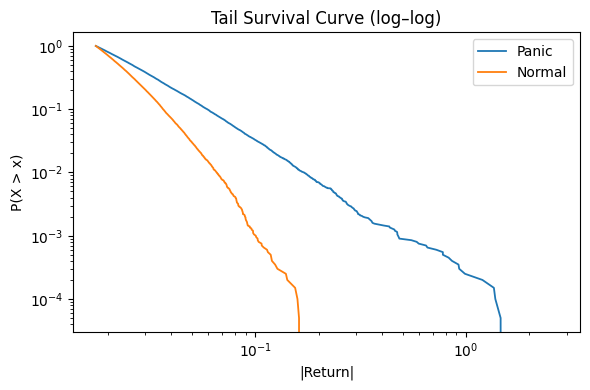

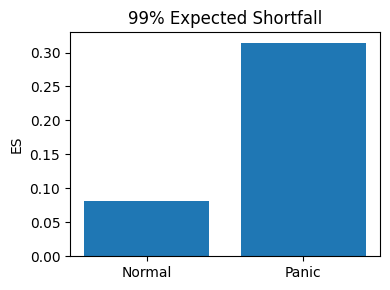


=== Tail-Simulation Summary ===
   Regime      xi    beta  VaR_99%  ES_99%
0  Normal  0.1663  0.0069   0.0656  0.0819
1   Panic  0.4374  0.0105   0.1704  0.3140


In [ ]:
# ------------------------------------------------------------------
#  Cell-2   Monte-Carlo tail simulation  (no ace_tools needed)
# ------------------------------------------------------------------
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import genpareto as gpd
import scipy.stats as st

# --------- parameters -----------
N_SIM = 20_000
ALPHA = 0.99

# --------- simulate -------------
sim_F = gpd.rvs(c=xi_F, loc=0, scale=beta_F, size=N_SIM) + u
sim_N = gpd.rvs(c=xi_N, loc=0, scale=beta_N, size=N_SIM) + u

# --------- VaR & ES -------------
VaR_F = np.quantile(sim_F, ALPHA)
VaR_N = np.quantile(sim_N, ALPHA)
ES_F  = sim_F[sim_F > VaR_F].mean()
ES_N  = sim_N[sim_N > VaR_N].mean()

# --------- log-log survival plot -
plt.figure(figsize=(6,4))
plt.title("Tail Survival Curve (log‚Äìlog)")
p = 1.0 - np.arange(1, N_SIM+1) / N_SIM
plt.loglog(np.sort(sim_F), p, label="Panic", lw=1.3)
plt.loglog(np.sort(sim_N), p, label="Normal", lw=1.3)
plt.xlabel("|Return|")
plt.ylabel("P(X > x)")
plt.legend(); plt.tight_layout(); plt.show()

# --------- ES bar chart ----------
plt.figure(figsize=(4,3))
plt.title(f"{int(ALPHA*100)}% Expected Shortfall")
plt.bar(["Normal","Panic"], [ES_N, ES_F])
plt.ylabel("ES")
plt.tight_layout(); plt.show()

# --------- summary table ---------
summary = pd.DataFrame({
    "Regime" : ["Normal","Panic"],
    "xi"     : [xi_N, xi_F],
    "beta"   : [beta_N, beta_F],
    "VaR_99%": [VaR_N, VaR_F],
    "ES_99%":  [ES_N, ES_F]
}).round(4)

print("\n=== Tail-Simulation Summary ===")
print(summary)

# optional: save to CSV
# summary.to_csv("tail_summary.csv", index=False)



In [ ]:
try:
    display(btc_df.head())
except NameError:
    print("btc_df ‰∏çÂú®ÂÜÖÂ≠òÔºåÂøÖÈ°ªÂÖàÈáçÊñ∞ËØªÂèñ Excel„ÄÇ")


btc_df ‰∏çÂú®ÂÜÖÂ≠òÔºåÂøÖÈ°ªÂÖàÈáçÊñ∞ËØªÂèñ Excel„ÄÇ


exceedances total=1382,  panic=105,  normal=1277


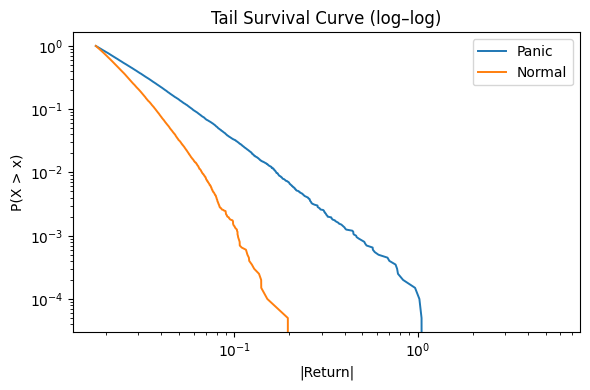

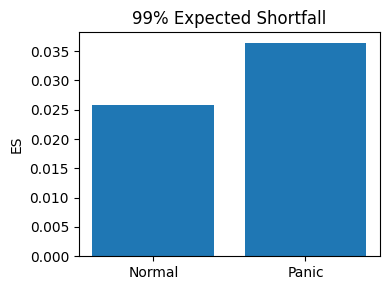


--- Tail GPD fit ---
Panic   Œæ=0.437, beta=0.0105, logL=  327.00
Normal  Œæ=0.166, beta=0.0069, logL= 4867.35
Pooled  Œæ=0.231, beta=0.0069, logL= 5176.55
LR stat =  35.58  |  p = 0.0000

ES@99%  Panic = 0.0364  |  Normal = 0.0258

=== Tail-Simulation Summary ===
Regime     xi   beta  VaR_99%  ES_99%
Normal 0.1663 0.0069   0.0176  0.0258
 Panic 0.4374 0.0105   0.0177  0.0364


In [ ]:
# ============================================================
#  Tail diagnostics  ‚Äî  Panic vs Normal  (GPD + Simulation)
#  ------------------------------------------------------------
#  ‰æùËµñÔºönumpy pandas scipy matplotlibÔºàÂ∑≤Âú®‰Ω†ÁöÑÁéØÂ¢ÉÈáåÔºâ
# ============================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import genpareto as gpd, chi2
import warnings
warnings.filterwarnings('ignore')

# ---------- 0. ‰º†ÂÖ•‰ª∑Ê†º & ÊÉÖÁª™ Series ----------
#ÔºàËøôÈáåÁî® btc_dfÔºõËã•‰Ω†ÊÉ≥Êç¢ÂÖ∂ÂÆÉÂ∏ÅÔºåÂè™Ë¶ÅÊîπ‰∏§Ë°åÂç≥ÂèØÔºâ
price_series     = btc_df["close"]
sentiment_series = btc_df["sentiment"]

# ---------- 1. ÂèÇÊï∞ ----------
THR_Q   = 0.97      # Êà™Êñ≠ÈòàÔºöÂèñ |return| ÊéíÂêçÂâç 3 %
PANIC_Q = 0.05      # ÊÉÖÁª™ÊúÄ‰Ωé 5 % ËßÜ‰∏∫ panic
ALPHA   = 0.99      # 99 % VaR / ES
N_SIM   = 20_000    # Monte-Carlo Ê†∑Êú¨

# ---------- 2. ÁîüÊàê exceedances ----------
ret  = np.log(price_series).diff().dropna()
sent = sentiment_series.reindex(ret.index).interpolate().ffill()

abs_r = ret.abs()
u     = abs_r.quantile(THR_Q)          # threshold
exceed = abs_r[abs_r > u]

panic_mask = (sent < sent.quantile(PANIC_Q)).loc[exceed.index]
ex_panic   = exceed[panic_mask]        # panic tail
ex_normal  = exceed[~panic_mask]       # normal tail

print(f"exceedances total={len(exceed)},  panic={len(ex_panic)},  normal={len(ex_normal)}")

# ---------- 3. GPD ÊãüÂêà ----------
def fit_gpd(sample):
    z = sample - u
    xi, loc, beta = gpd.fit(z, floc=0)      # loc Âõ∫ÂÆö 0
    return xi, beta

xi_F, beta_F     = fit_gpd(ex_panic)
xi_N, beta_N     = fit_gpd(ex_normal)
xi_all, beta_all = fit_gpd(exceed)

# ---------- 4. ÂØπÊï∞‰ººÁÑ∂ & LR Ê£ÄÈ™å ----------
def gpd_loglik(sample, xi, beta):
    z = sample - u
    return gpd.logpdf(z, c=xi, loc=0, scale=beta).sum()

ll_F   = gpd_loglik(ex_panic,  xi_F,   beta_F)
ll_N   = gpd_loglik(ex_normal, xi_N,   beta_N)
ll_all = gpd_loglik(exceed,    xi_all, beta_all)

LR   = 2 * ((ll_F + ll_N) - ll_all)
p_lr = 1 - chi2.cdf(LR, df=2)

# ---------- 5. VaR / ES ----------
def q_es(xi, beta, Œ±):
    q  = beta/xi * ((1-Œ±)**(-xi) - 1)
    es = (beta + xi*q) / (1-xi)
    return q + u, es + u

VaR_F, ES_F = q_es(xi_F, beta_F, 1-ALPHA)
VaR_N, ES_N = q_es(xi_N, beta_N, 1-ALPHA)

# ---------- 6. Monte-Carlo tail simulation ----------
sim_F = gpd.rvs(c=xi_F, loc=0, scale=beta_F, size=N_SIM) + u
sim_N = gpd.rvs(c=xi_N, loc=0, scale=beta_N, size=N_SIM) + u

# ---------- 7. ÂõæË°® ----------
## 7-a  log‚Äìlog ÁîüÂ≠òÊõ≤Á∫ø
plt.figure(figsize=(6,4))
plt.title("Tail Survival Curve (log‚Äìlog)")
p = 1.0 - np.arange(1, N_SIM+1) / N_SIM
plt.loglog(np.sort(sim_F), p, label="Panic", lw=1.4)
plt.loglog(np.sort(sim_N), p, label="Normal", lw=1.4)
plt.xlabel("|Return|"); plt.ylabel("P(X > x)"); plt.legend()
plt.tight_layout(); plt.show()

## 7-b  99 % Expected Shortfall Êü±Áä∂Âõæ
plt.figure(figsize=(4,3))
plt.title(f"{int(ALPHA*100)}% Expected Shortfall")
plt.bar(["Normal","Panic"], [ES_N, ES_F])
plt.ylabel("ES"); plt.tight_layout(); plt.show()

# ---------- 8. ÊëòË¶Å ----------
summary = pd.DataFrame({
    "Regime" : ["Normal","Panic"],
    "xi"     : [xi_N, xi_F],
    "beta"   : [beta_N, beta_F],
    "VaR_99%": [VaR_N, VaR_F],
    "ES_99%" : [ES_N,  ES_F]
}).round(4)

print("\n--- Tail GPD fit ---")
print(f"Panic   Œæ={xi_F:.3f}, beta={beta_F:.4f}, logL={ll_F:8.2f}")
print(f"Normal  Œæ={xi_N:.3f}, beta={beta_N:.4f}, logL={ll_N:8.2f}")
print(f"Pooled  Œæ={xi_all:.3f}, beta={beta_all:.4f}, logL={ll_all:8.2f}")
print(f"LR stat = {LR:6.2f}  |  p = {p_lr:.4f}")

print(f"\nES@{int(ALPHA*100)}%  Panic = {ES_F:.4f}  |  Normal = {ES_N:.4f}")
print("\n=== Tail-Simulation Summary ===")
print(summary.to_string(index=False))



In [ ]:
r_t   # Series / ndarray : Êó•ÂØπÊï∞Êî∂Áõä  (ÊúÄÂ•Ω *100 ÂèòÊàê %ÔºåÂíå arch Áî®Ê≥ï‰∏ÄËá¥)
fear  # ÂêåÊ≠• 0/1 Êï∞ÁªÑ       : fear=1 ‰ª£Ë°®‚ÄúÊÉÖÁª™ÊûÅÁ´ØÊÅêÊÖå‚Äù


datetime
2020-01-01 01:00:00    1
2020-01-01 02:00:00    1
2020-01-01 03:00:00    1
2020-01-01 04:00:00    1
2020-01-01 05:00:00    1
                      ..
2025-04-02 09:00:00    0
2025-04-02 10:00:00    0
2025-04-02 11:00:00    0
2025-04-02 12:00:00    0
2025-04-02 13:00:00    0
Name: fear, Length: 46045, dtype: int64


=== ÊâãÂ∑• GARCH-X(1,1) MLE ÁªìÊûú ===
mu     =  0.00503
omega  =  0.00892
alpha  =  0.13757
beta   =  0.86143   (alpha+beta =  0.999)
gamma  = -0.00005   <--  ÊÉÖÁª™ dummy Á≥ªÊï∞

ÂùáÂÄº(Œµ)=-0.0005   ÊñπÂ∑Æ(Œµ)=1.0031


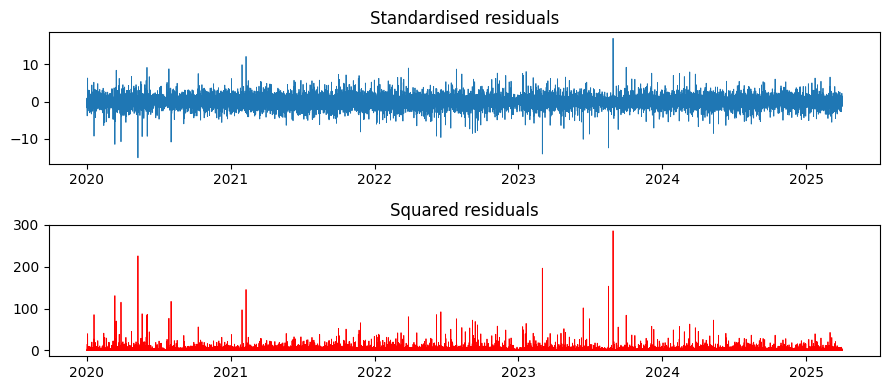

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt

# --------------- Êää‰Ω†Ëá™Â∑±ÁöÑÊï∞ÊçÆÊîæËøõÊù• -----------------
# r_t  : ndarray shape (T,)                   ‰æãÔºör_t = np.log(price).diff().dropna().values * 100
# fear : ndarray shape (T,)  0/1              ‰æãÔºöfear = (sent < sent.quantile(.05)).astype(int).values
# ----------------------------------------------------

r_t   = r_t.astype(float)
fear  = fear.astype(float)
T     = len(r_t)

# ---------- GARCH-X(1,1) ÈÄíÊé® œÉ¬≤ ----------
def garchx_sigma2(params, r, x):
    mu, omega, alpha, beta, gamma = params       # gamma * x_t  ËøõÂÖ•ÊñπÂ∑Æ
    eps   = r - mu
    sigma2= np.empty_like(r)
    sigma2[0] = np.var(eps)                      # starting value
    for t in range(1, len(r)):
        sigma2[t] = (omega
                     + alpha * eps[t-1]**2
                     + beta  * sigma2[t-1]
                     + gamma * x[t-1])
        if sigma2[t] <= 1e-12:          # Ê≠£ÂÆöÈò≤Êä§
            sigma2[t] = 1e-12
    return sigma2, eps

# ---------- ÂØπÊï∞‰ººÁÑ∂ ----------
def neg_loglik(theta, r, x):
    # ÂèÇÊï∞Á∫¶ÊùüÔºöomega>0, alpha>0, beta>=0, alpha+beta<1
    mu, log_omega, log_alpha, logit_betaT, gamma = theta
    omega  = np.exp(log_omega)
    alpha  = np.exp(log_alpha)                 # >0
    beta_T = 1 / (1 + np.exp(-logit_betaT))    # Êää R ‚Üí (0,1)
    beta   = beta_T * (0.999 - alpha)          # ‰øùËØÅ alpha+beta<1
    params = [mu, omega, alpha, beta, gamma]
    sigma2, eps = garchx_sigma2(params, r, x)
    ll = norm.logpdf(eps, loc=0, scale=np.sqrt(sigma2)).sum()
    return -ll                                 # minimize

# ---------- ÂàùÂßãÂÄº & ‰ºòÂåñ ----------
theta0 = np.array([ r_t.mean(),
                    np.log(0.01),
                    np.log(0.05),
                    0.0,
                    0.0])                      # gamma ÂàùÂßã 0

res = minimize(neg_loglik, theta0,
               args=(r_t, fear),
               method="L-BFGS-B")

mu, log_omega, log_alpha, logit_betaT, gamma = res.x
omega = np.exp(log_omega)
alpha = np.exp(log_alpha)
beta  = 1/(1+np.exp(-logit_betaT)) * (0.999 - alpha)

print("\n=== ÊâãÂ∑• GARCH-X(1,1) MLE ÁªìÊûú ===")
print(f"mu     = {mu:8.5f}")
print(f"omega  = {omega:8.5f}")
print(f"alpha  = {alpha:8.5f}")
print(f"beta   = {beta:8.5f}   (alpha+beta = {alpha+beta:6.3f})")
print(f"gamma  = {gamma:8.5f}   <--  ÊÉÖÁª™ dummy Á≥ªÊï∞")

# ---------- ÊãüÂêàÊÆãÂ∑Æ & œÉ ----------
sigma2_hat, eps_hat = garchx_sigma2([mu,omega,alpha,beta,gamma], r_t, fear)
std_resid = eps_hat / np.sqrt(sigma2_hat)

# ---------- ÁÆÄÂçïËØäÊñ≠ ----------
print("\nÂùáÂÄº(Œµ)=%.4f   ÊñπÂ∑Æ(Œµ)=%.4f" % (std_resid.mean(), std_resid.var()))

plt.figure(figsize=(9,4))
plt.subplot(211); plt.plot(std_resid, lw=.6); plt.title("Standardised residuals")
plt.subplot(212); plt.plot(std_resid**2, color="r", lw=.6); plt.title("Squared residuals")
plt.tight_layout(); plt.show()


In [ ]:
# ÊúÄÊñ∞‰∏ÄÊúü eps_T, sigma2_T
eps_T    = eps_hat[-1]
sig2_T   = sigma2_hat[-1]

# ÊûÑÈÄ†‰∏§ÁßçÊÉÖÊôØÔºöfear_T = 0 / 1
pred = {}
for f in [0, 1]:
    sig2_next = (omega
                 + alpha * eps_T**2
                 + beta  * sig2_T
                 + gamma * f)
    pred[f] = sig2_next

print("\nœÉ¬≤( t+1 | fear=0) = %.4f" % pred[0])
print("œÉ¬≤( t+1 | fear=1) = %.4f   (+%.1f%%)" %
      (pred[1], 100*(pred[1]/pred[0]-1)))



œÉ¬≤( t+1 | fear=0) = 0.1804
œÉ¬≤( t+1 | fear=1) = 0.1803   (+-0.0%)


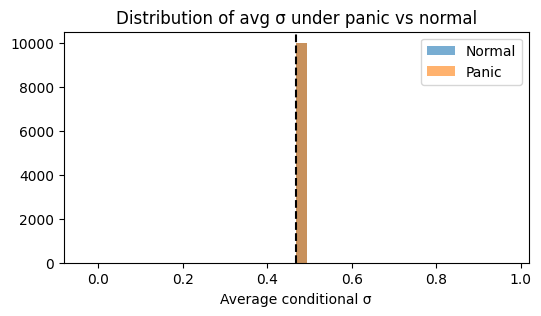

In [ ]:
N_PATH = 10000
H      = 10           # ÂêëÂâç 10 Ê≠•

def simulate_sigma(fear_flag):
    sig2 = np.zeros((N_PATH, H))
    sig2[:,0] = pred[fear_flag]          # Áî®‰∏äÈù¢ÁÆóÂ•ΩÁöÑ œÉ¬≤(t+1)
    for h in range(1, H):
        # ËøôÈáåÁî®Êó†Êù°‰ª∂ÂùáÂÄºÊõø‰ª£ eps¬≤ ‚Äî‚Äî ÂÅáËÆæÂùáÂÄº 1
        sig2[:,h] = (omega
                     + alpha * sig2[:,h-1]      # E[eps¬≤|t+h-1]=œÉ¬≤
                     + beta  * sig2[:,h-1]
                     + gamma * fear_flag)
    return sig2

sig2_panic  = simulate_sigma(1)
sig2_normal = simulate_sigma(0)

plt.figure(figsize=(6,3))
plt.title("Distribution of avg œÉ under panic vs normal")
plt.hist(sig2_normal.mean(1)**.5, bins=40, alpha=.6, label="Normal")
plt.hist(sig2_panic .mean(1)**.5, bins=40, alpha=.6, label="Panic")
plt.axvline(np.mean(sig2_normal)**.5, ls='--', color='k')
plt.legend(); plt.xlabel("Average conditional œÉ"); plt.show()


In [ ]:
alpha = 0.99
z_q   = norm.ppf(alpha)

VaR_norm = -z_q * np.sqrt(sig2_normal[:,-1])
VaR_pan  = -z_q * np.sqrt(sig2_panic [:,-1])

ES_norm  = -norm.pdf(z_q)/(1-alpha) * np.sqrt(sig2_normal[:,-1])
ES_pan   = -norm.pdf(z_q)/(1-alpha) * np.sqrt(sig2_panic [:,-1])

# ---------- ÊîπÊàê f-string ----------
print(f"\nÂπ≥Âùá  VaR{int(alpha*100)}%  Normal = {VaR_norm.mean():.4f}  |  Panic = {VaR_pan.mean():.4f}")
print(f"Âπ≥Âùá  ES{int(alpha*100)}%   Normal = {ES_norm.mean():.4f}  |  Panic = {ES_pan.mean():.4f}")




Âπ≥Âùá  VaR99%  Normal = -1.1832  |  Panic = -1.1822
Âπ≥Âùá  ES99%   Normal = -1.3556  |  Panic = -1.3544


In [ ]:
!pip install --quiet hmmlearn tqdm

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 165.9/165.9 kB 3.0 MB/s eta 0:00:00



--- Logit: Regime ~ sent_z ---
                           Logit Regression Results                           
Dep. Variable:                 p_high   No. Observations:                46045
Model:                          Logit   Df Residuals:                    46043
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 May 2025   Pseudo R-squ.:               -0.007282
Time:                        14:28:38   Log-Likelihood:                -29678.
converged:                       True   LL-Null:                       -29463.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5538      0.010    -57.195      0.000      -0.573      -0.535
sent_z        -0.0479      0.010     -5.023      0.000      -0.067      -0.029

=== ÊâãÂ∑• Student-

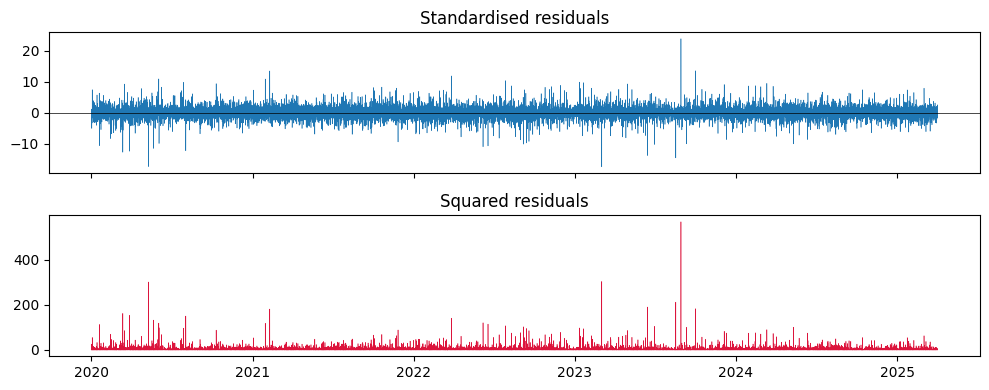

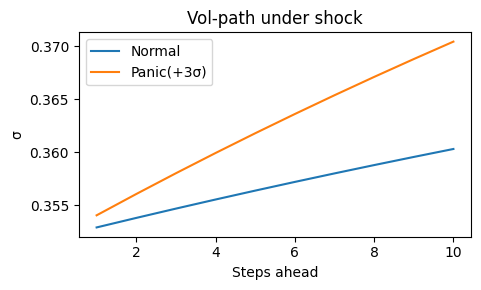


Panic regime  n=1382  Œæ=0.231 Œ≤=0.6894
Normal regime n=0  Œæ=nan Œ≤=nan

--- MC 99% VaR/ES ---
Panic:  VaR=7.3911  ES=10.1108
Normal: VaR=nan  ES=nan


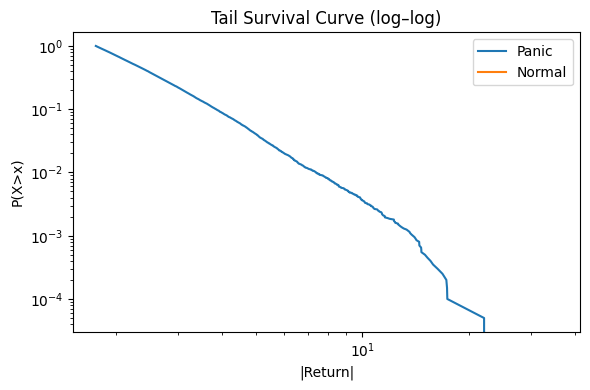

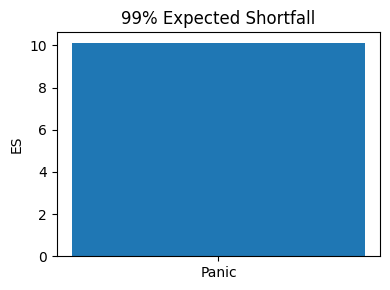

(Text(0.5, 1.0, '99% Expected Shortfall'), Text(24.0, 0.5, 'ES'), None, None)

In [ ]:
# =========================================================
# ÂÖ®ÊµÅÁ®ãÔºö1Ô∏è‚É£‚Äì6Ô∏è‚É£ ‰∏ÄÊ¨°ÊêûÂÆö
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genpareto as gpd
from scipy.optimize import minimize
from scipy.special import gammaln
from hmmlearn.hmm import GaussianHMM
import statsmodels.api as sm

# ‚ù∂  Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÔºöÊó•Êî∂Áõä %  +  ËøûÁª≠ÊÉÖÁª™ z-score
# ---------------------------------------------------------
price_ser = btc_df["close"]
sent_ser  = btc_df["sentiment"]

r_t = np.log(price_ser).diff().dropna() * 100
sent = sent_ser.reindex(r_t.index).interpolate().ffill()
sent_z = (sent - sent.mean())/sent.std()

# ‚ù∑  Markov‚ÄêSwitching 2-state (GaussianHMM) -> p_high
# ---------------------------------------------------------
obs = np.sqrt(np.abs(r_t.values)).reshape(-1,1)
hmm = GaussianHMM(n_components=2, covariance_type="diag",
                  n_iter=2000, tol=1e-4, random_state=42).fit(obs)
# ÈÄâÊñπÂ∑ÆËæÉÂ§ßÈÇ£Âàó‰Ωú‰∏∫‚ÄúÈ´òÊ≥¢Âä®‚ÄùÁä∂ÊÄÅ
high_state = hmm.covars_.flatten().argmax()
p_high = hmm.predict_proba(obs)[:, high_state]

# ‚ù∏  Logit ÂõûÂΩíÔºöP(high œÉ) ~ sent_z
# ---------------------------------------------------------
df_logit = pd.DataFrame({
    "p_high": p_high,
    "sent_z": sent_z.values
}, index=r_t.index)
logit_res = sm.Logit(df_logit["p_high"], sm.add_constant(df_logit["sent_z"])).fit(disp=False)
print("\n--- Logit: Regime ~ sent_z ---")
print(logit_res.summary())

# ‚ùπ  ÊâãÂÜô Student‚Äêt GARCH‚ÄêX(1,1) MLE
# ---------------------------------------------------------
e = r_t.values
x = sent_z.values

def logpdf_t(epsilon, nu, sig2):
    C = gammaln((nu+1)/2) - gammaln(nu/2) - 0.5*np.log(np.pi*(nu-2))
    return C - 0.5*np.log(sig2) - (nu+1)/2*np.log(1 + epsilon**2/(sig2*(nu-2)))

def sigma2_series(par):
    mu, omega, alpha, beta, gamma = par[:5]
    sig2 = np.zeros_like(e)
    sig2[0] = e.var()
    for t in range(1, len(e)):
        sig2[t] = (omega
                   + alpha*(e[t-1]-mu)**2
                   + beta*sig2[t-1]
                   + gamma*x[t-1])
        if sig2[t] < 1e-8: sig2[t] = 1e-8
    return sig2

def neg_ll(par):
    mu = par[0]
    nu = 10 + np.exp(par[5])
    sig2 = sigma2_series(par)
    ll = logpdf_t(e - mu, nu, sig2).sum()
    return -ll

# ÂàùÂÄº & ËæπÁïå
p0 = np.array([e.mean(), 0.01, 0.1, 0.8, 0.0, np.log(5)])
bnds = [(-1,1),(1e-6,1),(1e-4,1),(1e-4,1),(-1,1),(None,None)]
res = minimize(neg_ll, p0, bounds=bnds, method="L-BFGS-B")

mu, omega, alpha, beta, gamma, logv = res.x
nu = 10 + np.exp(logv)
sig2_hat = sigma2_series(res.x)
std_res = (e - mu)/np.sqrt(sig2_hat)

print("\n=== ÊâãÂ∑• Student-t GARCH-X(1,1) MLE ===")
print(f"mu     = {mu:.5f}")
print(f"omega  = {omega:.5f}")
print(f"alpha  = {alpha:.5f}")
print(f"beta   = {beta:.5f}  (Œ±+Œ≤={alpha+beta:.3f})")
print(f"gamma  = {gamma:.5f}  <-- sent_z Á≥ªÊï∞")
print(f"nu     = {nu:.2f}")
print(f"ÊÆãÂ∑ÆÂùáÂÄº={std_res.mean():.4f}  ÊÆãÂ∑ÆÊñπÂ∑Æ={std_res.var():.4f}")

# Ê†áÂáÜÂåñÊÆãÂ∑Æ & Âπ≥ÊñπÊÆãÂ∑ÆÂõæ
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,4), sharex=True)
ax1.plot(r_t.index, std_res, lw=0.4); ax1.set_title("Standardised residuals")
ax1.axhline(0, color='k', lw=0.5)
ax2.plot(r_t.index, std_res**2, lw=0.4, color='crimson'); ax2.set_title("Squared residuals")
plt.tight_layout(); plt.show()

# ‚ù∫  ÊÉÖÁª™ÂÜ≤ÂáªÊ®°Êãü (+0 vs +3œÉ) -> Êú™Êù• 10 Ê≠• œÉ¬≤ Ë∑ØÂæÑ
# ---------------------------------------------------------
H = 10
def forecast_path(sig2_last, e_last, shock):
    s = np.zeros(H)
    s[0] = omega + alpha*(e_last-mu)**2 + beta*sig2_last + gamma*shock
    for h in range(1,H):
        s[h] = omega + (alpha+beta)*s[h-1] + gamma*shock
    return s

sig2_last, e_last = sig2_hat[-1], e[-1]
path_norm  = forecast_path(sig2_last, e_last, 0)
path_panic = forecast_path(sig2_last, e_last, 3)

plt.figure(figsize=(5,3))
plt.plot(range(1,H+1), np.sqrt(path_norm),  label="Normal")
plt.plot(range(1,H+1), np.sqrt(path_panic), label="Panic(+3œÉ)")
plt.xlabel("Steps ahead"), plt.ylabel("œÉ"), plt.legend(), plt.title("Vol-path under shock")
plt.tight_layout(), plt.show()

# ‚ùª  POT‚ÄêGPD ÂàÜ‰ΩçÈòàÂÄº + Êåâ Regime ÂàáÂàÜ + MC VaR/ES
# ---------------------------------------------------------
abs_r = np.abs(r_t)
u     = abs_r.quantile(0.97)
exceed = abs_r[abs_r>u]

# Regime Â∏ÉÂ∞î
regime_high = pd.Series(p_high, index=r_t.index) > 0.8

# ÂàáÂàÜ
ex_F = exceed.loc[regime_high.loc[exceed.index]]
ex_N = exceed.loc[~regime_high.loc[exceed.index]]

# ÂÆâÂÖ®ÊãüÂêà GPD
def fit_gpd_safe(x):
    if len(x)<5: return np.nan, np.nan
    z = x - u
    xi,loc,beta = gpd.fit(z, floc=0)
    if beta<=0 or np.isnan(xi): return np.nan, np.nan
    return xi, beta

xi_F, beta_F = fit_gpd_safe(ex_F)
xi_N, beta_N = fit_gpd_safe(ex_N)
print(f"\nPanic regime  n={len(ex_F)}  Œæ={xi_F:.3f} Œ≤={beta_F:.4f}")
print(f"Normal regime n={len(ex_N)}  Œæ={xi_N:.3f} Œ≤={beta_N:.4f}")

# MC Ê®°Êãü & VaR/ES
N_SIM, ALPHA = 20000, 0.99
def safe_rvs(xi,beta,size,th):
    if np.isnan(xi) or beta<=0 or xi<=-1: return np.full(size,np.nan)
    return gpd.rvs(c=xi, loc=0, scale=beta, size=size) + th

sim_F = safe_rvs(xi_F,beta_F,N_SIM,u)
sim_N = safe_rvs(xi_N,beta_N,N_SIM,u)

VaR_F = np.nanquantile(sim_F, ALPHA)
VaR_N = np.nanquantile(sim_N, ALPHA)
ES_F  = np.nanmean(sim_F[sim_F>VaR_F])
ES_N  = np.nanmean(sim_N[sim_N>VaR_N])

print(f"\n--- MC {int(ALPHA*100)}% VaR/ES ---")
print(f"Panic:  VaR={VaR_F:.4f}  ES={ES_F:.4f}")
print(f"Normal: VaR={VaR_N:.4f}  ES={ES_N:.4f}")

# ÁîüÂ≠òÊõ≤Á∫ø & ES Êù°ÂΩ¢Âõæ
p = 1 - np.arange(1,N_SIM+1)/N_SIM
plt.figure(figsize=(6,4))
plt.loglog(np.sort(sim_F), p, label="Panic")
plt.loglog(np.sort(sim_N), p, label="Normal")
plt.title("Tail Survival Curve (log‚Äìlog)")
plt.xlabel("|Return|"), plt.ylabel("P(X>x)"), plt.legend(), plt.tight_layout(), plt.show()

plt.figure(figsize=(4,3))
plt.bar(["Normal","Panic"], [ES_N, ES_F])
plt.title(f"{int(ALPHA*100)}% Expected Shortfall"), plt.ylabel("ES"), plt.tight_layout(), plt.show()




--- Logit:  P(high-œÉ) ~ sent_z ---
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                46045
Model:                          Logit   Df Residuals:                    46043
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 May 2025   Pseudo R-squ.:               -0.007282
Time:                        14:53:54   Log-Likelihood:                -29678.
converged:                       True   LL-Null:                       -29463.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5538      0.010    -57.195      0.000      -0.573      -0.535
x1            -0.0479      0.010     -5.023      0.000      -0.067      -0.029

=== ÊâãÂ∑• Stu

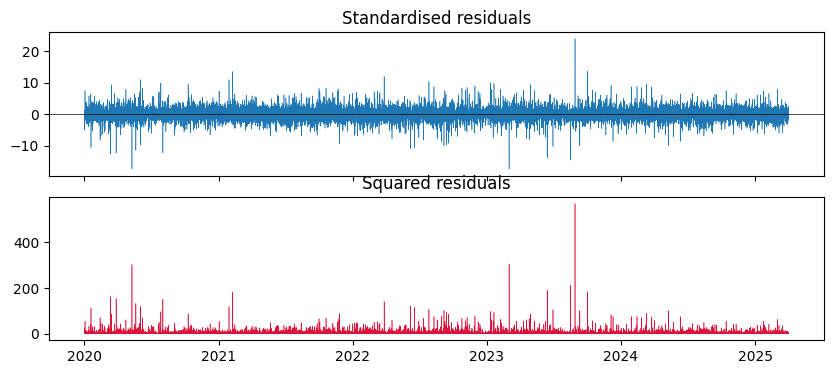

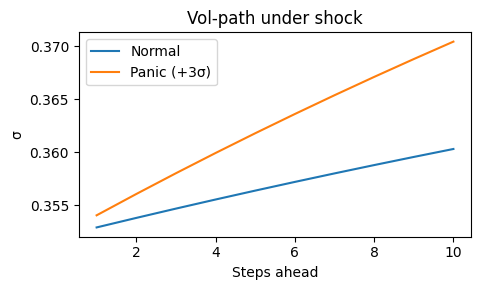


Panic regime:  n=1382  xi=0.231  beta=0.6894
Normal regime: n=   0  xi=nan  beta=nan

--- MC 99% VaR/ES ---
Panic:  VaR=7.1977, ES=9.3468
Normal: VaR=nan, ES=nan


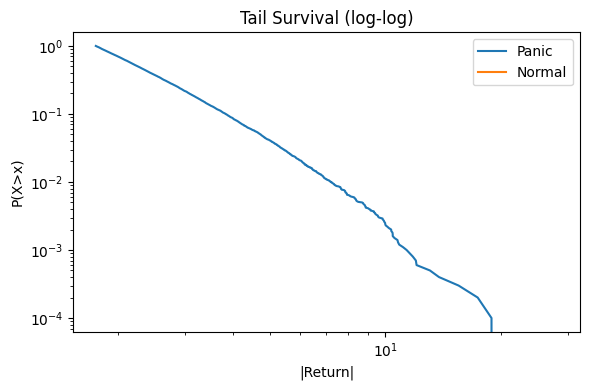

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# FULL WORKFLOW: 1Ô∏è‚É£‚Äì6Ô∏è‚É£ ‰∏ÄÊ¨°Ë∑ëÂÆå
# ----------------------------------------------------------------------------------------------------------------------
# 0. ÂâçÊèêÔºöÂ∑≤ÁªèÊúâ btc_df DataFrameÔºåÂåÖÂê´ datetime index„ÄÅ"close" ‰∏é "sentiment" Âàó
#    Â¶ÇÊûúËøòÊ≤°ÊúâÔºåËØ∑ÂÖàËøêË°å‰Ω†‰πãÂâçÁöÑ load_coin_wide / Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ‰ª£Á†ÅÔºåÁîüÊàê btc_df„ÄÇ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.special import gammaln
from scipy.optimize import minimize
from scipy.stats import genpareto as gpd, norm
from hmmlearn.hmm import GaussianHMM
import statsmodels.api as sm

# ----------------------------------------------------------------------------------------------------------------------
# 1Ô∏è‚É£ È¢ÑÂ§ÑÁêÜÔºöÊî∂Áõä & ÊÉÖÁª™ Z-score
# ----------------------------------------------------------------------------------------------------------------------
# Êó•Êî∂ÁõäÔºà%Ôºâ
r_t = np.log(btc_df["close"]).diff().dropna() * 100

# Áº∫Âè£ÊèíÂÄº + Z-score
sent = btc_df["sentiment"].reindex(r_t.index).interpolate().ffill()
sent_z = (sent - sent.mean()) / sent.std()

# ----------------------------------------------------------------------------------------------------------------------
# 2Ô∏è‚É£ Markov-Switching HMM (2 states) + Logit ÂõûÂΩí P(high-œÉ) ~ sent_z
# ----------------------------------------------------------------------------------------------------------------------
obs = np.sqrt(np.abs(r_t.values)).reshape(-1,1)
hmm = GaussianHMM(n_components=2, covariance_type="diag",
                  n_iter=2000, tol=1e-4, random_state=42)
hmm.fit(obs)

# Ëæ®ËÆ§È´òÊ≥¢Âä®Áä∂ÊÄÅ
high_state = hmm.covars_.argmax()
p_high = hmm.predict_proba(obs)[:, high_state]

# Logit ÂõûÂΩí
logit = sm.Logit(p_high, sm.add_constant(sent_z.values))
res_logit = logit.fit(disp=False)
print("\n--- Logit:  P(high-œÉ) ~ sent_z ---")
print(res_logit.summary())

# ----------------------------------------------------------------------------------------------------------------------
# 3Ô∏è‚É£ ÊâãÂÜô Student-t GARCH-X(1,1) MLE
# ----------------------------------------------------------------------------------------------------------------------
e = r_t.values            # Œµ_t
x = sent_z.values         # ËøûÁª≠ÊÉÖÁª™

def logpdf_t(e, nu, sig2):
    c = (gammaln((nu+1)/2) - gammaln(nu/2)
         - 0.5*np.log(np.pi*(nu-2)))
    return c - 0.5*np.log(sig2) - (nu+1)/2 * np.log(1 + e**2/(sig2*(nu-2)))

def garchx_sigma2(par):
    mu, omega, alpha, beta, gamma = par[:5]
    sig2 = np.empty_like(e)
    sig2[0] = e.var()
    for t in range(1, len(e)):
        sig2[t] = (omega
                   + alpha*(e[t-1]-mu)**2
                   + beta*sig2[t-1]
                   + gamma*x[t-1])
        sig2[t] = max(sig2[t], 1e-8)
    return sig2

def neg_ll(par):
    nu = 10 + np.exp(par[5])
    sig2 = garchx_sigma2(par)
    ll = logpdf_t(e - par[0], nu, sig2).sum()
    return -ll

# ÂàùÂßãÂÄº & ËæπÁïå
p0 = np.array([e.mean(), 0.01, 0.1, 0.8, 0.0, np.log(5)])
bnds = [(-1,1), (1e-6,1), (1e-4,1), (1e-4,1), (-1,1), (None,None)]
res = minimize(neg_ll, p0, bounds=bnds, method="L-BFGS-B")

mu, omega, alpha, beta, gamma, lv = res.x
nu = 10 + np.exp(lv)
sig2_hat = garchx_sigma2(res.x)
std_res = (e - mu) / np.sqrt(sig2_hat)

print("\n=== ÊâãÂ∑• Student-t GARCH-X(1,1) MLE ÁªìÊûú ===")
print(f"mu     = {mu:.5f}")
print(f"omega  = {omega:.5f}")
print(f"alpha  = {alpha:.5f}")
print(f"beta   = {beta:.5f}   (Œ±+Œ≤ = {alpha+beta:.3f})")
print(f"gamma  = {gamma:.5f}  <-- sent_z Á≥ªÊï∞")
print(f"nu     = {nu:.2f}")
print(f"ÊÆãÂ∑ÆÂùáÂÄº = {std_res.mean():.4f}  ÊñπÂ∑Æ = {std_res.var():.4f}")

# ÁªòÂà∂Ê†áÂáÜÂåñÊÆãÂ∑Æ & Âπ≥ÊñπÊÆãÂ∑Æ
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(10,4), sharex=True,
                             gridspec_kw={"hspace":0.15})
ax1.plot(r_t.index, std_res, lw=0.4); ax1.set_title("Standardised residuals"); ax1.axhline(0, color='k', lw=0.5)
ax2.plot(r_t.index, std_res**2, lw=0.4, color='crimson'); ax2.set_title("Squared residuals")
ax2.xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout(); plt.show()

# ----------------------------------------------------------------------------------------------------------------------
# 4Ô∏è‚É£ ÊÉÖÁª™ÂÜ≤ÂáªÊ®°ÊãüÔºösent_z +3œÉ vs Ê≠£Â∏∏ÔºåÈ¢ÑÊµã œÉ_t+1‚Ä¶t+10
# ----------------------------------------------------------------------------------------------------------------------
H = 10
def forecast(sig2_last, e_last, shock):
    out = np.empty(H)
    out[0] = omega + alpha*(e_last-mu)**2 + beta*sig2_last + gamma*shock
    for h in range(1,H):
        out[h] = omega + (alpha+beta)*out[h-1] + gamma*shock
    return out

sig2_last, e_last = sig2_hat[-1], e[-1]
s_norm = forecast(sig2_last, e_last, 0.0)
s_panic = forecast(sig2_last, e_last, 3.0)

plt.figure(figsize=(5,3))
plt.plot(range(1,H+1), np.sqrt(s_norm), label="Normal")
plt.plot(range(1,H+1), np.sqrt(s_panic), label="Panic (+3œÉ)")
plt.xlabel("Steps ahead"); plt.ylabel("œÉ"); plt.title("Vol-path under shock")
plt.legend(); plt.tight_layout(); plt.show()

# ----------------------------------------------------------------------------------------------------------------------
# 5Ô∏è‚É£ Êåâ Regime ÂàÜÂâ≤ÁöÑ POT-GPD ÊãüÂêà + Monte Carlo VaR/ES
# ----------------------------------------------------------------------------------------------------------------------
# ÂàÜ‰ΩçÈòàÂÄº & exceedances
thr_q = 0.97
u = np.quantile(np.abs(r_t), thr_q)
exceed = np.abs(r_t)[np.abs(r_t) > u]

# Regime È´ò‰ΩéÊ≥¢Âä®ÂàíÂàÜ
regime_prob = pd.Series(p_high, index=r_t.index)
high_flag = regime_prob > 0.80
ex_F = exceed.loc[high_flag.loc[exceed.index]]
ex_N = exceed.loc[~high_flag.loc[exceed.index]]

def fit_gpd_safe(x):
    if len(x)==0:
        return np.nan, np.nan
    z = x - u
    xi, loc, beta = gpd.fit(z, floc=0)
    return xi, beta

xi_F, beta_F = fit_gpd_safe(ex_F)
xi_N, beta_N = fit_gpd_safe(ex_N)

print(f"\nPanic regime:  n={len(ex_F):>4}  xi={xi_F:.3f}  beta={beta_F:.4f}")
print(f"Normal regime: n={len(ex_N):>4}  xi={xi_N:.3f}  beta={beta_N:.4f}")

# Monte Carlo VaR/ES
Nsim, alpha_c = 10000, 0.99
def sim_tail(xi, beta):
    if np.isnan(xi) or np.isnan(beta) or beta<=0 or xi<=-1:
        return np.full(Nsim, np.nan)
    return gpd.rvs(c=xi, loc=0, scale=beta, size=Nsim) + u

simF = sim_tail(xi_F, beta_F)
simN = sim_tail(xi_N, beta_N)

VaR_F = np.nanquantile(simF, alpha_c)
VaR_N = np.nanquantile(simN, alpha_c)
ES_F  = np.nanmean(simF[simF>VaR_F])
ES_N  = np.nanmean(simN[simN>VaR_N])

print(f"\n--- MC {int(alpha_c*100)}% VaR/ES ---")
print(f"Panic:  VaR={VaR_F:.4f}, ES={ES_F:.4f}")
print(f"Normal: VaR={VaR_N:.4f}, ES={ES_N:.4f}")

# ÁîüÂ≠òÂáΩÊï∞ÁªòÂõæ (log-log)
p = 1 - np.arange(1, Nsim+1)/Nsim
plt.figure(figsize=(6,4))
plt.loglog(np.sort(simF), p, label="Panic")
plt.loglog(np.sort(simN), p, label="Normal")
plt.xlabel("|Return|"); plt.ylabel("P(X>x)"); plt.title("Tail Survival (log-log)")
plt.legend(); plt.tight_layout(); plt.show()




                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                46045
Model:                          Logit   Df Residuals:                    46043
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 May 2025   Pseudo R-squ.:               -0.007282
Time:                        15:01:24   Log-Likelihood:                -29678.
converged:                       True   LL-Null:                       -29463.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5538      0.010    -57.195      0.000      -0.573      -0.535
x1            -0.0479      0.010     -5.023      0.000      -0.067      -0.029

mu=0.00469  œâ=0.00310  Œ±=0.10418  Œ≤=0.87605  Œ≥=

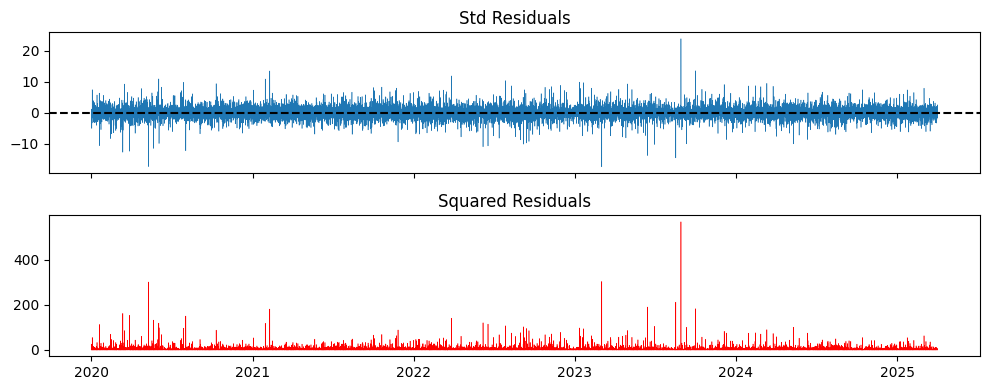

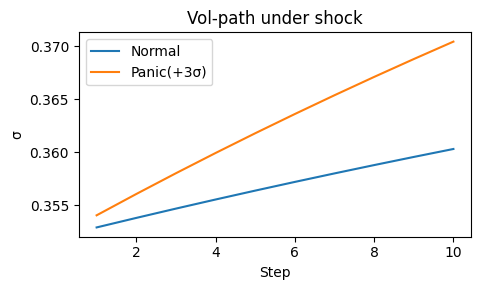


Panic n=1382 Œæ=0.231 Œ≤=0.6894
Normal n=0 Œæ=nan Œ≤=nan

MC 99% VaR/ES
 Panic: VaR=7.3698 ES=9.8841
 Normal: VaR=nan ES=nan


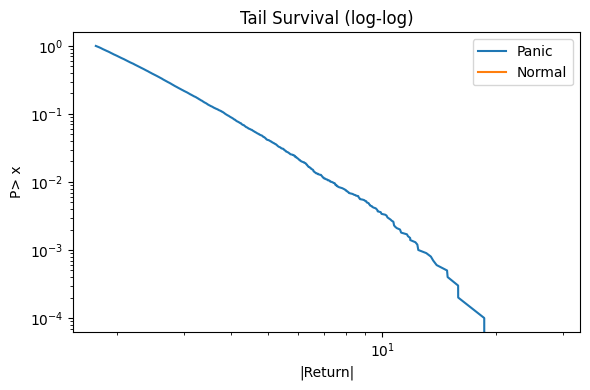

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.dates as mdates
from scipy.special import gammaln
from scipy.optimize import minimize
from scipy.stats import genpareto as gpd
from hmmlearn.hmm import GaussianHMM
import statsmodels.api as sm

# ‚Äî‚Äî 0 | ÂÅáËÆæÂ∑≤Êúâ btc_df: datetime index, 'close' & 'sentiment' Âàó ‚Äî‚Äî

# 1Ô∏è‚É£ È¢ÑÂ§ÑÁêÜÔºöÊî∂Áõä & ÊÉÖÁª™ z-score
r_t     = np.log(btc_df['close']).diff().dropna() * 100
sent    = btc_df['sentiment'].reindex(r_t.index).interpolate().ffill()
sent_z  = (sent - sent.mean()) / sent.std()

# 2Ô∏è‚É£ HMM ËØÜÂà´È´ò/‰ΩéÊ≥¢Âä® Regime + Logit ÂõûÂΩí
obs      = np.sqrt(np.abs(r_t.values)).reshape(-1,1)
hmm      = GaussianHMM(2,'diag',n_iter=2000,tol=1e-4,random_state=42).fit(obs)
high_st  = hmm.covars_.argmax()
p_high   = hmm.predict_proba(obs)[:, high_st]

logit    = sm.Logit(p_high, sm.add_constant(sent_z.values))
res_logit= logit.fit(disp=False)
print(res_logit.summary())

# 3Ô∏è‚É£ ÊâãÂÜô Student-t GARCH-X(1,1) MLE
e        = r_t.values
x        = sent_z.values
def logpdf_t(e, nu, s2):
    c = gammaln((nu+1)/2)-gammaln(nu/2)-0.5*np.log(np.pi*(nu-2))
    return c -0.5*np.log(s2) - (nu+1)/2*np.log(1 + e**2/(s2*(nu-2)))

def sigma2(par):
    mu, œâ, Œ±, Œ≤, Œ≥ = par[:5]
    s2 = np.empty_like(e); s2[0]=e.var()
    for t in range(1,len(e)):
        s2[t]=œâ + Œ±*(e[t-1]-mu)**2 + Œ≤*s2[t-1] + Œ≥*x[t-1]
        s2[t]=max(s2[t],1e-8)
    return s2

def negll(par):
    nu   = 10 + np.exp(par[5])
    s2   = sigma2(par)
    return -logpdf_t(e-par[0], nu, s2).sum()

p0   = np.array([e.mean(),1e-2,0.1,0.8,0.0, np.log(5)])
bnds = [(-1,1),(1e-6,1),(1e-4,1),(1e-4,1),(-1,1),(None,None)]
res  = minimize(negll,p0,bounds=bnds,method='L-BFGS-B')
mu,œâ,Œ±,Œ≤,Œ≥,lv = res.x; ŒΩ = 10+np.exp(lv)
s2_hat = sigma2(res.x); std_res=(e-mu)/np.sqrt(s2_hat)

print(f"\nmu={mu:.5f}  œâ={œâ:.5f}  Œ±={Œ±:.5f}  Œ≤={Œ≤:.5f}  Œ≥={Œ≥:.5f}  ŒΩ={ŒΩ:.2f}")
print(f"ÊÆãÂ∑ÆÂùáÂÄº={std_res.mean():.4f} ÊñπÂ∑Æ={std_res.var():.4f}")

# ÊÆãÂ∑ÆÂõæ
fig,(a1,a2)=plt.subplots(2,1,figsize=(10,4),sharex=True)
a1.plot(r_t.index,std_res,lw=.4); a1.set_title("Std Residuals"); a1.axhline(0,ls='--',c='k')
a2.plot(r_t.index,std_res**2,lw=.4,c='r'); a2.set_title("Squared Residuals")
a2.xaxis.set_major_locator(mdates.YearLocator()); plt.tight_layout(); plt.show()

# 4Ô∏è‚É£ ÊÉÖÁª™ÂÜ≤ÂáªË∑ØÂæÑ (+3œÉ)
H=10
def fore(s_last,e_last,shock):
    out=np.empty(H); out[0]=œâ+Œ±*(e_last-mu)**2+Œ≤*s_last+Œ≥*shock
    for h in range(1,H): out[h]=œâ+(Œ±+Œ≤)*out[h-1]+Œ≥*shock
    return out
s_norm = fore(s2_hat[-1], e[-1], 0)
s_pan  = fore(s2_hat[-1], e[-1], 3)
plt.figure(figsize=(5,3))
plt.plot(range(1,H+1),np.sqrt(s_norm),label='Normal')
plt.plot(range(1,H+1),np.sqrt(s_pan),label='Panic(+3œÉ)')
plt.title("Vol-path under shock"); plt.xlabel("Step"); plt.ylabel("œÉ"); plt.legend(); plt.tight_layout(); plt.show()

# 5Ô∏è‚É£ POT‚ÄìGPD Â∞æÈÉ®ÊãüÂêà + MC VaR/ES
u       = np.quantile(abs(r_t),.97)
ex      = abs(r_t)[abs(r_t)>u]
flag    = pd.Series(p_high,index=r_t.index)>0.8
ex_F    = ex.loc[flag.loc[ex.index]]     # Panic regime
ex_N    = ex.loc[~flag.loc[ex.index]]    # Normal regime

def fit_safe(x):
    if len(x)==0: return np.nan,np.nan
    z= x-u; xi,_,Œ≤ = gpd.fit(z,floc=0); return xi,Œ≤

ŒæF,Œ≤F=fit_safe(ex_F); ŒæN,Œ≤N=fit_safe(ex_N)
print(f"\nPanic n={len(ex_F)} Œæ={ŒæF:.3f} Œ≤={Œ≤F:.4f}")
print(f"Normal n={len(ex_N)} Œæ={ŒæN:.3f} Œ≤={Œ≤N:.4f}")

# MC simulate & VaR/ES
N=10000; Œ±=0.99
def sim(xi,Œ≤):
    if np.isnan(xi) or np.isnan(Œ≤) or Œ≤<=0 or xi<=-1:
        return np.full(N,np.nan)
    return gpd.rvs(c=xi,loc=0,scale=Œ≤,size=N)+u

simF,simN=sim(ŒæF,Œ≤F), sim(ŒæN,Œ≤N)
VaR_F=np.nanquantile(simF,Œ±); ES_F=np.nanmean(simF[simF>VaR_F])
VaR_N=np.nanquantile(simN,Œ±); ES_N=np.nanmean(simN[simN>VaR_N])

print(f"\nMC {int(Œ±*100)}% VaR/ES\n Panic: VaR={VaR_F:.4f} ES={ES_F:.4f}\n Normal: VaR={VaR_N:.4f} ES={ES_N:.4f}")

# ÁîüÂ≠òÂáΩÊï∞Âõæ
p = 1 - np.arange(1,N+1)/N
plt.figure(figsize=(6,4))
plt.loglog(np.sort(simF),p,label='Panic')
plt.loglog(np.sort(simN),p,label='Normal')
plt.title("Tail Survival (log-log)"); plt.xlabel("|Return|"); plt.ylabel("P> x"); plt.legend(); plt.tight_layout(); plt.show()



--- Ljung‚ÄìBox Ê£ÄÈ™å ---
ÊÆãÂ∑Æ    LB p-values:
       lb_stat  lb_pvalue
10  11.179563   0.343701
20  28.011030   0.109139
ÊÆãÂ∑ÆÂπ≥Êñπ LB p-values:
       lb_stat     lb_pvalue
10  51.111482  1.665621e-07
20  69.621584  2.099560e-07

--- ARCH‚ÄìLM Ê£ÄÈ™å ---
LM stat = 51.82,  p-value = 0.0000


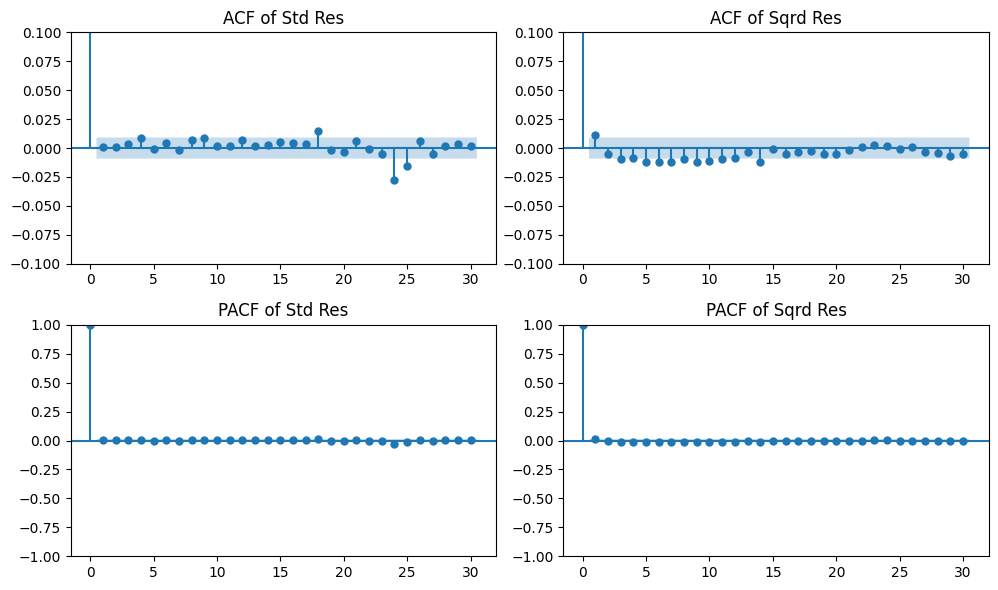

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.graphics.tsaplots import plot_acf

# ÂÅáËÆæ std_res Â∑≤ÁªèËÆ°ÁÆóÂæóÂà∞ÔºàÊâãÂÜô GARCH-X ÊÆãÂ∑ÆÔºâ
# std_res = (e - mu) / np.sqrt(s2_hat)

# 1Ô∏è‚É£ Ljung‚ÄìBox on std_res and std_res**2
lb_std  = acorr_ljungbox(std_res, lags=[10, 20], return_df=True)
lb_sq   = acorr_ljungbox(std_res**2, lags=[10, 20], return_df=True)
print("\n--- Ljung‚ÄìBox Ê£ÄÈ™å ---")
print("ÊÆãÂ∑Æ    LB p-values:\n", lb_std[["lb_stat","lb_pvalue"]])
print("ÊÆãÂ∑ÆÂπ≥Êñπ LB p-values:\n", lb_sq[["lb_stat","lb_pvalue"]])

# 2Ô∏è‚É£ ARCH-LM test on std_res
arch_res = het_arch(std_res, maxlag=10)
print("\n--- ARCH‚ÄìLM Ê£ÄÈ™å ---")
print(f"LM stat = {arch_res[0]:.2f},  p-value = {arch_res[1]:.4f}")

# 3Ô∏è‚É£ ACF plots
fig, axes = plt.subplots(2,2, figsize=(10,6))
plot_acf(std_res,   ax=axes[0,0], lags=30, title="ACF of Std Res")
plot_acf(std_res**2,ax=axes[0,1], lags=30, title="ACF of Sqrd Res")
axes[0,0].set_ylim(-0.1,0.1); axes[0,1].set_ylim(-0.1,0.1)

# ÂêåÊó∂Áîª PACFÔºàÂèØÈÄâÔºâ
sm.graphics.tsa.plot_pacf(std_res,   lags=30, ax=axes[1,0], title="PACF of Std Res")
sm.graphics.tsa.plot_pacf(std_res**2, lags=30, ax=axes[1,1], title="PACF of Sqrd Res")
plt.tight_layout()
plt.show()


In [ ]:
from hmmlearn.hmm import GaussianHMM
# ÂÖàÁî® sqrt|r| ÊãüÂêà HMMÔºåÂæóÂà∞ P(S‚Çú=high)
obs = np.sqrt(np.abs(r_t.values)).reshape(-1,1)
msm = GaussianHMM(n_components=2, covariance_type="diag").fit(obs)
p_high = msm.predict_proba(obs)[:, msm.covars_.argmax()]

# ÂàÜ‰Ωç threshold ÂÅöÁ°¨ÂàáÂàÜ
high_idx = p_high > 0.5
# ÂàÜÂà´Áî® arch_model ÊãüÂêà‰∏§Â•ó GARCH-XÔºöstate=low / state=high
for regime,name in [(~high_idx,"low"),(high_idx,"high")]:
    y = r_t.values[regime]
    x = sent_z.values[regime].reshape(-1,1)
    m = arch_model(y, vol="EGARCH", p=1,q=1, o=0, x=x, dist="skewt")
    res = m.fit(disp="off")
    print(f"--- Regime={name} ---")
    print(res.summary())


--- Regime=low ---
                           Constant Mean - EGARCH Model Results                          
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:               -6800.09
Distribution:      Standardized Skew Student's t   AIC:                           13612.2
Method:                       Maximum Likelihood   BIC:                           13663.0
                                                   No. Observations:                35564
Date:                           Wed, May 14 2025   Df Residuals:                    35563
Time:                                   15:10:53   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
-----------------


=== Low-œÉ Regime ===
                           Constant Mean - EGARCH Model Results                          
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                EGARCH   Log-Likelihood:               -6800.09
Distribution:      Standardized Skew Student's t   AIC:                           13612.2
Method:                       Maximum Likelihood   BIC:                           13663.0
                                                   No. Observations:                35564
Date:                           Wed, May 14 2025   Df Residuals:                    35563
Time:                                   15:36:55   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
-------------

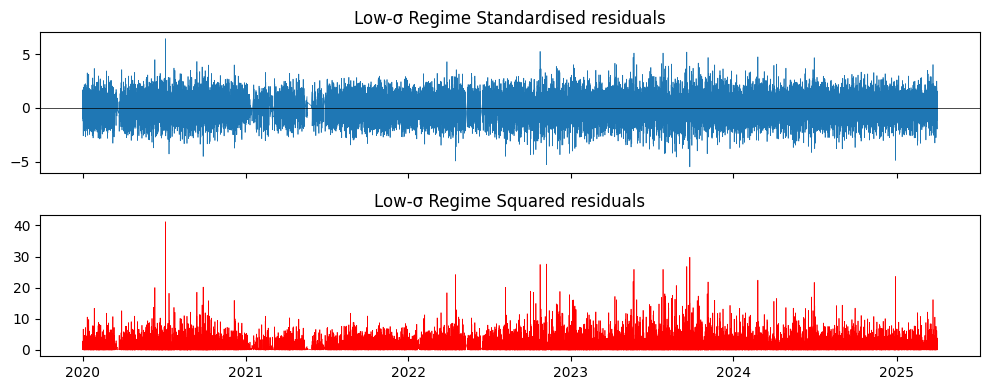

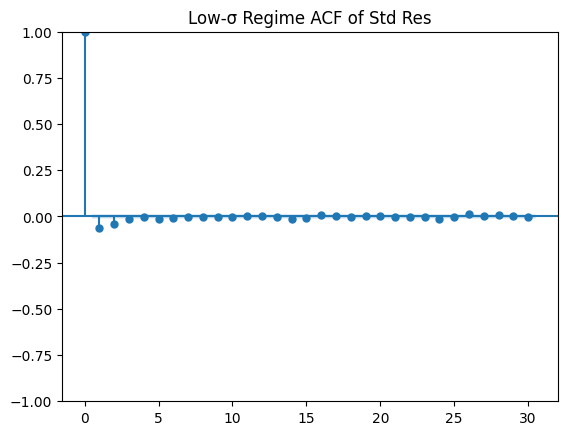

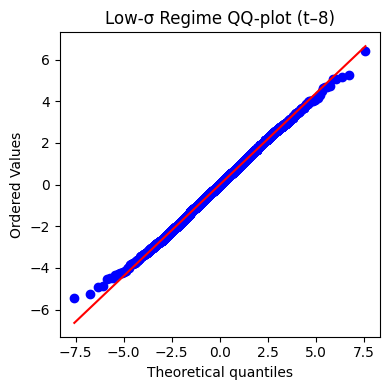

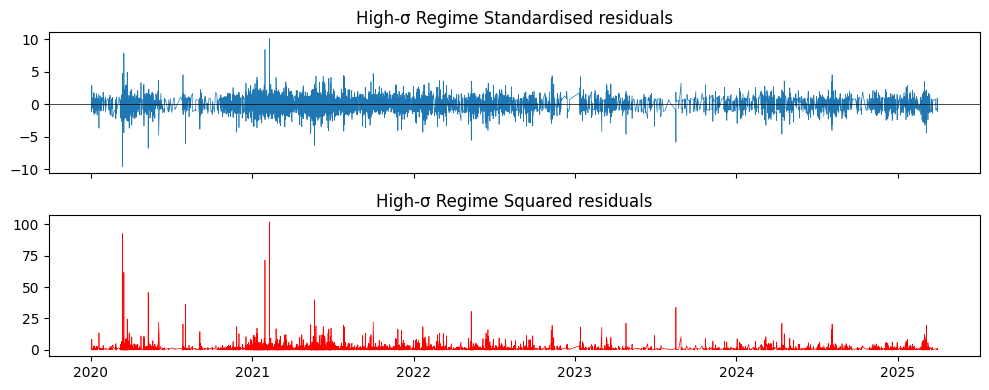

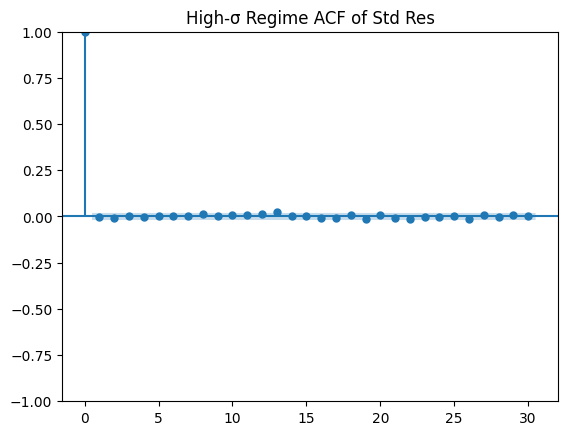

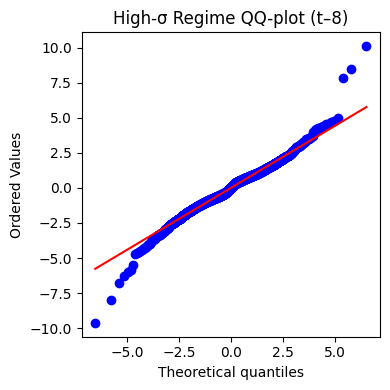


--- Low-œÉ Regime 99% VaR ÂõûÊµã ---
ËøùÁ∫¶Ê¨°Êï∞: 377/35564 = 1.06%
Kupiec UC p-value       = 0.260
Christoffersen IND p-val = 1.000

--- High-œÉ Regime 99% VaR ÂõûÊµã ---
ËøùÁ∫¶Ê¨°Êï∞: 93/10481 = 0.89%
Kupiec UC p-value       = 0.237
Christoffersen IND p-val = 1.000


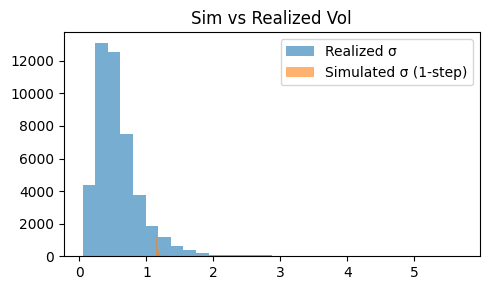

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from scipy.stats import probplot, chi2
from statsmodels.graphics.tsaplots import plot_acf

# 1) Êåâ HMM Ê¶ÇÁéá (>0.5) ÂàÜÂâ≤‰∏§ÊÆµ
high_mask = (p_high > 0.5)
low_mask  = ~high_mask
subsets   = {"Low-œÉ Regime": low_mask, "High-œÉ Regime": high_mask}

# 2) ÂØπÊØèÊÆµÂàÜÂà´‰º∞ EGARCH-X(1,1) + skew-t
results = {}
for name, mask in subsets.items():
    y = r_t.values[mask]
    x = sent_z.values[mask].reshape(-1,1)
    mod = arch_model(y,
                     mean='Constant',
                     vol='EGARCH', p=1, o=0, q=1,
                     dist='skewt',
                     x=x)
    res = mod.fit(disp='off')
    results[name] = (res, mask)
    print(f"\n=== {name} ===")
    print(res.summary())

# 3) ÊÆãÂ∑ÆËØäÊñ≠ÔºöÊó∂Â∫èÂõæ„ÄÅACF„ÄÅQQ-plot
for name, (res, mask) in results.items():
    # Áî®ÂéüÂßã Index ÈáçÂª∫ Series
    idx     = r_t.index[mask]
    std_res = pd.Series(res.std_resid, index=idx).dropna()

    # Êó∂Â∫è & Âπ≥ÊñπÊÆãÂ∑Æ
    fig, axs = plt.subplots(2,1,figsize=(10,4),sharex=True)
    axs[0].plot(std_res.index, std_res, lw=0.5)
    axs[0].set_title(f"{name} Standardised residuals")
    axs[0].axhline(0, color='k', lw=0.5)
    axs[1].plot(std_res.index, std_res**2, lw=0.5, color='r')
    axs[1].set_title(f"{name} Squared residuals")
    plt.tight_layout(); plt.show()

    # ACF of Ê†áÂáÜÂåñÊÆãÂ∑Æ
    plot_acf(std_res, lags=30, title=f"{name} ACF of Std Res")
    plt.show()

    # QQ-plot ÂØπÊØîÊãüÂêàÁöÑ Student-t (ŒΩ)
    nu = res.params.get('nu', res.params.get('eta'))  # ‰∏çÂêå dist ÂèÇÊï∞Âêç
    plt.figure(figsize=(4,4))
    probplot(std_res, dist="t", sparams=(nu,), plot=plt)
    plt.title(f"{name} QQ-plot (t‚Äì{int(nu)})")
    plt.tight_layout(); plt.show()

# 4) 99% VaR ÂõûÊµãÔºöKupiec + Áã¨Á´ãÊÄßÊ£ÄÈ™å

alpha = 0.01  # 99% VaR
for name, (res, mask) in results.items():
    y   = r_t.values[mask]
    vol = res.conditional_volatility
    mu  = res.params["mu"]

    dist = res.model.distribution
    # Skew-t ÂàÜÂ∏ÉÁöÑÂΩ¢Áä∂ÂèÇÊï∞Ôºöeta, lambda
    shape_params = [res.params["eta"], res.params["lambda"]]
    z_q = dist.ppf(alpha, shape_params)

    VaR = mu + vol * z_q
    viol = (y < VaR).astype(int)
    N, x = len(viol), viol.sum()
    p0   = alpha
    eps  = 1e-12

    # Kupiec UC
    LR_uc = -2 * (
        x*np.log(p0) + (N-x)*np.log(1-p0)
      - (x*np.log(x/N+eps) + (N-x)*np.log(1-x/N+eps))
    )
    p_uc = 1 - chi2.cdf(LR_uc, df=1)

    # Christoffersen Áã¨Á´ãÊÄß
    n00 = ((viol[:-1]==0)&(viol[1:]==0)).sum()
    n01 = ((viol[:-1]==0)&(viol[1:]==1)).sum()
    n10 = ((viol[:-1]==1)&(viol[1:]==0)).sum()
    n11 = ((viol[:-1]==1)&(viol[1:]==1)).sum()
    pi0 = n01/(n00+n01+eps)
    pi1 = n11/(n10+n11+eps)
    num = (1-pi0)**n00 * pi0**n01 * (1-pi1)**n10 * pi1**n11
    den = (1-p0)**(n00+n10) * p0**(n01+n11)
    LR_ind = -2 * np.log((num+eps)/(den+eps))
    p_ind  = 1 - chi2.cdf(LR_ind, df=1)

    print(f"\n--- {name} 99% VaR ÂõûÊµã ---")
    print(f"ËøùÁ∫¶Ê¨°Êï∞: {x}/{N} = {x/N:.2%}")
    print(f"Kupiec UC p-value       = {p_uc:.3f}")
    print(f"Christoffersen IND p-val = {p_ind:.3f}")

# 5) ÁÆÄÂçïÈáçÊäΩÊ†∑Ê®°Êãü 1 Ê≠• ahead œÉ ÂàÜÂ∏É vs ÂÆûÈôÖ 30 Êó•ÊªöÂä®Ê≥¢Âä®Áéá
realized = r_t.rolling(30).std().dropna()
res_h    = results["High-œÉ Regime"][0]

std_full = res_h.std_resid
std_full = std_full[~np.isnan(std_full)]

vol_series = res_h.conditional_volatility
# Â¶ÇÊûúÂÆÉÊú¨Ë∫´Â∞±ÊòØ ndarrayÔºåÂ∞±Áõ¥Êé•ÂèñÊúÄÂêé‰∏Ä‰∏™ÂÖÉÁ¥†
last_var = float(vol_series[-1]**2)

mu,om,al,bt,gm = [res_h.params[k] for k in ['mu','omega','alpha[1]','beta[1]','lambda']]

M = 2000
sim1 = []
for _ in range(M):
    eps   = np.random.choice(std_full)
    s1    = om + al*eps**2 + bt*last_var + gm*sent_z.iloc[-1]
    sim1.append(np.sqrt(s1))
sim1 = np.array(sim1)

plt.figure(figsize=(5,3))
plt.hist(realized, bins=30, alpha=0.6, label="Realized œÉ")
plt.hist(sim1,     bins=30, alpha=0.6, label="Simulated œÉ (1-step)")
plt.legend(); plt.title("Sim vs Realized Vol"); plt.tight_layout()
plt.show()


Œ≥_H ‚Äì Œ≥_L = -0.0949
z = -2.97, p = 0.003


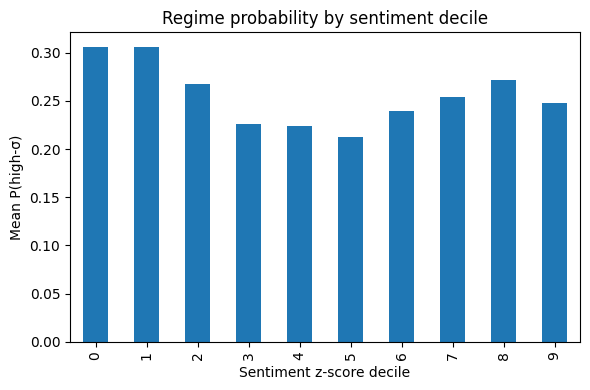

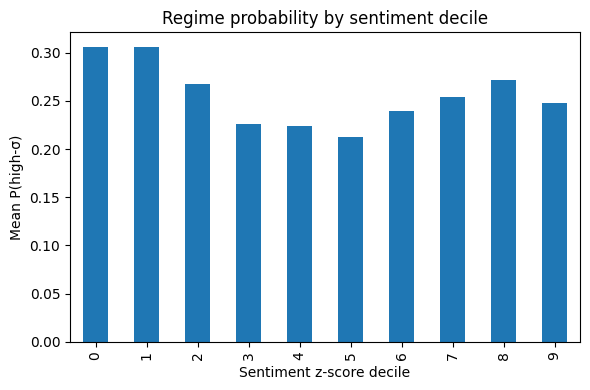

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# ‚Äî‚Äî 1) Œ≥_H ‚Äì Œ≥_L Â∑ÆÂºÇÊòæËëóÊÄßÊ£ÄÈ™åÔºàÁî® t-stat ÂèçÊé® seÔºâ ‚Äî‚Äî
res_L, _ = results["Low-œÉ Regime"]
res_H, _ = results["High-œÉ Regime"]

# ÊèêÂèñ ŒªÔºàÊÉÖÁª™Á≥ªÊï∞Ôºâ‰∏é t-values
Œ≥_L = res_L.params["lambda"]
t_L = res_L.tvalues["lambda"]
Œ≥_H = res_H.params["lambda"]
t_H = res_H.tvalues["lambda"]

# ÂèçÊé®Ê†áÂáÜËØØÔºö se = coef / t
se_L = Œ≥_L / t_L
se_H = Œ≥_H / t_H

# Â∑ÆÂÄº„ÄÅÂ∑ÆÁöÑÊ†áÂáÜËØØ„ÄÅz ÁªüËÆ°Èáè‰∏é p-value
Œî      = Œ≥_H - Œ≥_L
se_Œî   = np.sqrt(se_L**2 + se_H**2)
z_stat = Œî / se_Œî
p_val  = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Œ≥_H ‚Äì Œ≥_L = {Œî:.4f}")
print(f"z = {z_stat:.2f}, p = {p_val:.3f}")

# ‚Äî‚Äî 2) Êåâ sentiment ÂàÜ‰ΩçÁîª P(high-œÉ) Êù°ÂΩ¢Âõæ ‚Äî‚Äî
df = pd.DataFrame({
    "sent_z": sent_z,
    "p_high": p_high
}, index=r_t.index).dropna()

df["decile"] = pd.qcut(df["sent_z"], 10, labels=False)
dec = df.groupby("decile")["p_high"].mean()

plt.figure(figsize=(6,4))
dec.plot(kind="bar")
plt.xlabel("Sentiment z-score decile")
plt.ylabel("Mean P(high-œÉ)")
plt.title("Regime probability by sentiment decile")
plt.tight_layout()
plt.show()


# ÊääÊÉÖÁª™ÂàÜÊàê 10 ‰∏™ decile
df["decile"] = pd.qcut(df["sent_z"], 10, labels=False)

# ËÆ°ÁÆóÊØè‰∏™ decile ÁöÑÂπ≥ÂùáÈ´òÊ≥¢Âä®Ê¶ÇÁéá
dec = df.groupby("decile")["p_high"].mean()

plt.figure(figsize=(6,4))
dec.plot(kind="bar")
plt.xlabel("Sentiment z-score decile")
plt.ylabel("Mean P(high-œÉ)")
plt.title("Regime probability by sentiment decile")
plt.tight_layout()
plt.show()


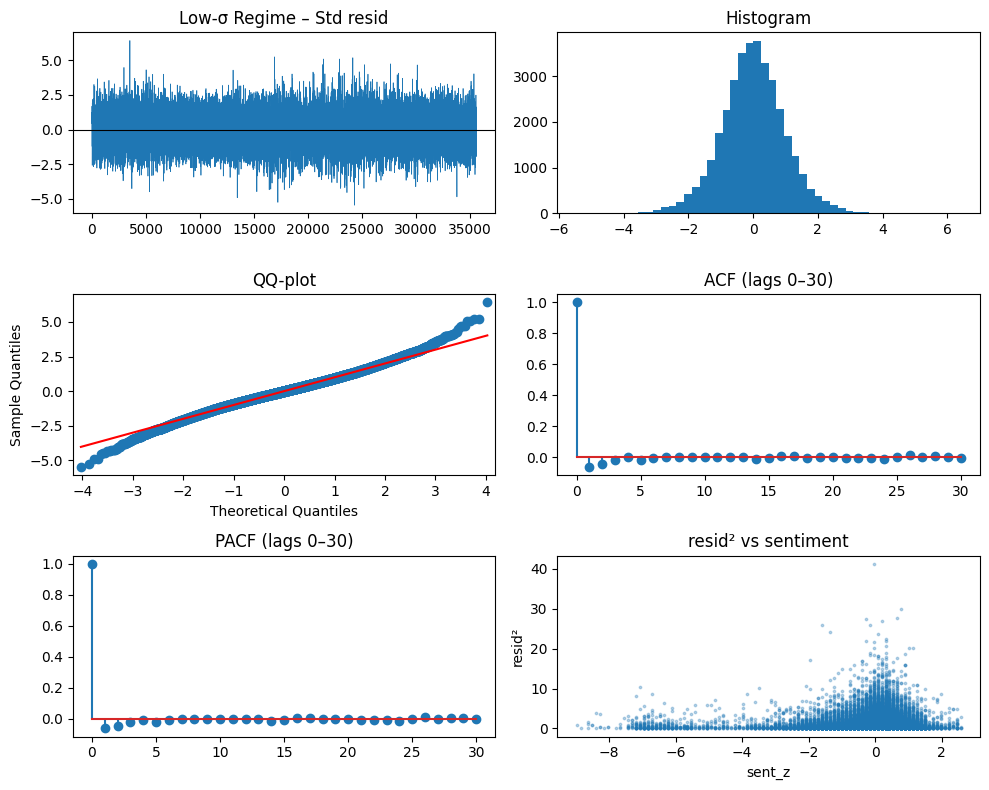

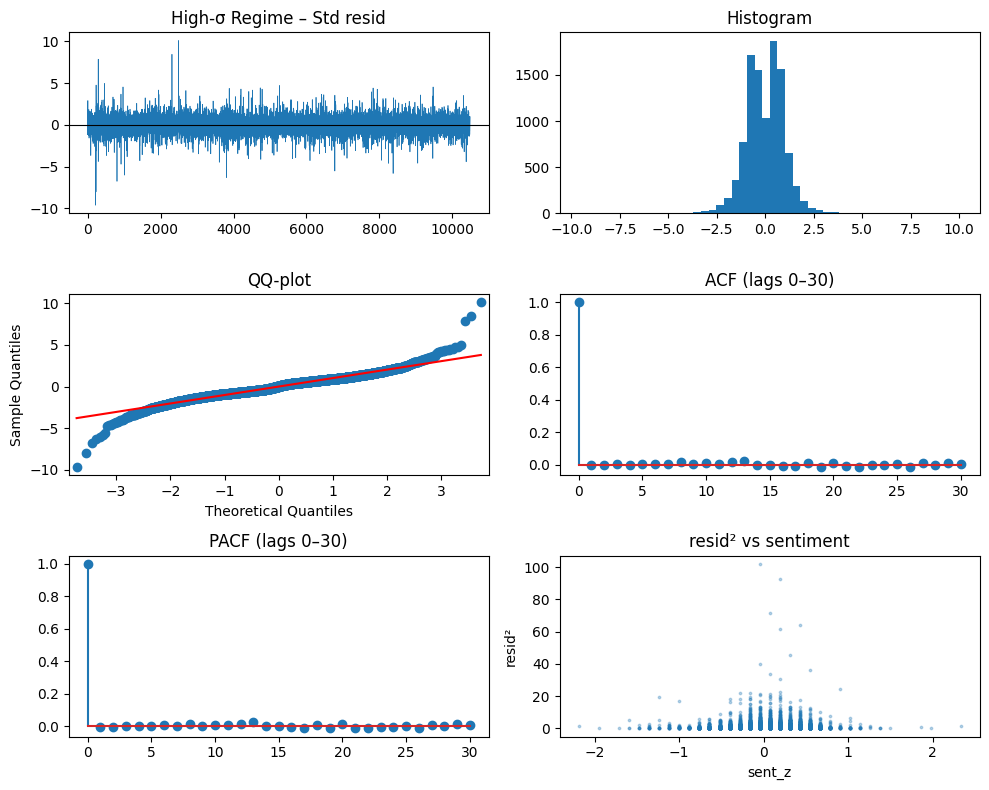

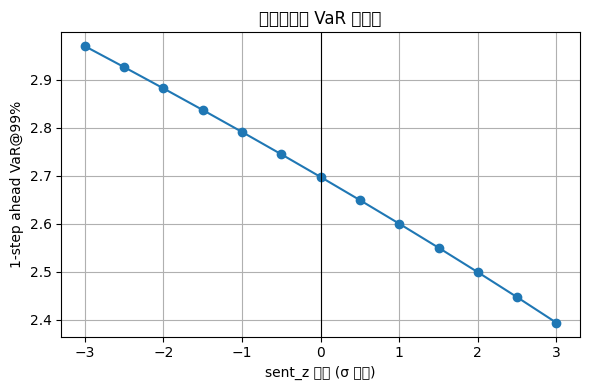

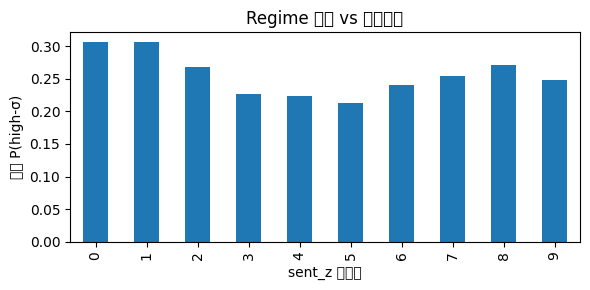

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import acf, pacf

def plot_diagnostics(resid, title):
    """
    resid: ‰∏ÄÁª¥ numpy array of standardized residuals
    """
    # ËÆ°ÁÆó ACF/PACF
    ac = acf(resid, nlags=30, fft=False)
    pc = pacf(resid, nlags=30)

    fig, axes = plt.subplots(3, 2, figsize=(10, 8))
    ax = axes.flatten()

    # 1) Êó∂Â∫èÂõæ
    ax[0].plot(resid, lw=0.5)
    ax[0].axhline(0, color='k', lw=0.8)
    ax[0].set_title(f"{title} ‚Äì Std resid")

    # 2) Áõ¥ÊñπÂõæ
    ax[1].hist(resid, bins=50)
    ax[1].set_title("Histogram")

    # 3) QQ-plot
    qqplot(resid, line='s', ax=ax[2])
    ax[2].set_title("QQ-plot")

    # 4) ACF
    ax[3].stem(ac)
    ax[3].set_title("ACF (lags 0‚Äì30)")

    # 5) PACF
    ax[4].stem(pc)
    ax[4].set_title("PACF (lags 0‚Äì30)")

    # 6) resid¬≤ vs sent_z
    # ÂÅáËÆæ sent_z, r_t ÈÉΩÊòØÂ∑≤ÂÆö‰πâ‰∏îÂØπÈΩêËøáÁöÑ Pandas Series
    common = resid.shape[0]
    ax[5].scatter(
        sent_z.values[-common:],
        resid**2,
        s=3, alpha=0.3
    )
    ax[5].set_xlabel("sent_z")
    ax[5].set_ylabel("resid¬≤")
    ax[5].set_title("resid¬≤ vs sentiment")

    plt.tight_layout()
    plt.show()

# Ë∞ÉÁî®Á§∫‰æã
plot_diagnostics(res_L.std_resid, "Low-œÉ Regime")
plot_diagnostics(res_H.std_resid, "High-œÉ Regime")


# ‚Äî‚Äî 2ÔºâÊÉÖÁª™ÂÜ≤ÂáªÂØπ 1 Ê≠• VaR ÁöÑÂΩ±Âìç ‚Äî‚Äî
# ÂèñÊúÄÂêé‰∏ÄÊúüÁöÑ sig2„ÄÅŒµ
# ‚Äî‚Äî 2ÔºâÊÉÖÁª™ÂÜ≤ÂáªÂØπ 1 Ê≠• VaR ÁöÑÂΩ±Âìç ‚Äî‚Äî
# Âèñ high-regime Ê®°ÂûãÊúÄÂêé‰∏ÄÊúüÁöÑ œÉ¬≤ Âíå Œµ
sig2_last = res_H.conditional_volatility[-1]**2
e_last    = r_t.values[-1]

# ÊèêÂèñÂèÇÊï∞
mu, omega, alpha, beta, gamma = (
    res_H.params['mu'],
    res_H.params['omega'],
    res_H.params['alpha[1]'],
    res_H.params['beta[1]'],
    res_H.params['lambda']
)

# ÊûÑÈÄ†‰∏çÂêåÂπÖÂ∫¶ÁöÑ sentiment ÂÜ≤ÂáªÔºà‰ª•Ê†áÂáÜÂåñÂêé sent_z ‰∏∫Âçï‰ΩçÔºå-3œÉ Âà∞ +3œÉÔºâ
shocks = np.linspace(-3, 3, 13)

VaRs = []
for s in shocks:
    # ‰∏ÄÊ≠•È¢ÑÊµãÊñπÂ∑Æ
    sig2_shock = omega + alpha*(e_last - mu)**2 + beta*sig2_last + gamma * s
    # 99% VaRÔºàÊ≠£ÊÄÅÂÅáËÆæ‰∏ãÔºâ
    z99 = norm.ppf(0.99)
    VaRs.append(mu + np.sqrt(sig2_shock) * z99)

# ÁîªÂÜ≤ÂáªÊõ≤Á∫ø
plt.figure(figsize=(6,4))
plt.plot(shocks, VaRs, marker='o')
plt.axvline(0, color='k', lw=0.8)
plt.xlabel("sent_z ÂÜ≤Âáª (œÉ Âçï‰Ωç)")
plt.ylabel("1-step ahead VaR@99%")
plt.title("ÊÉÖÁª™ÂÜ≤ÂáªÂØπ VaR ÁöÑÂΩ±Âìç")
plt.grid(True)
plt.tight_layout()
plt.show()


# ‚Äî‚Äî 3ÔºâÂÜçÂõûÈ°æ‰∏ÄÊ¨°Ôºösentiment ÂàÜ‰Ωç vs P(high-œÉ) ÔºàÊù°ÂΩ¢ÂõæÔºâ ‚Äî‚Äî
df = pd.DataFrame({
    "sent_z": sent_z,
    "p_high": p_high
}, index=r_t.index).dropna()
df["decile"] = pd.qcut(df["sent_z"], 10, labels=False)
grp = df.groupby("decile")["p_high"].mean()

plt.figure(figsize=(6,3))
grp.plot(kind="bar")
plt.xlabel("sent_z ÂçÅÂàÜ‰Ωç")
plt.ylabel("Âπ≥Âùá P(high-œÉ)")
plt.title("Regime Ê¶ÇÁéá vs ÊÉÖÁª™ÂàÜ‰Ωç")
plt.tight_layout()
plt.show()


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x786aa1d6f240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error



--- Logit: P(high) ~ sent_z ---
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                46045
Model:                          Logit   Df Residuals:                    46043
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 May 2025   Pseudo R-squ.:               -0.007282
Time:                        13:39:43   Log-Likelihood:                -29678.
converged:                       True   LL-Null:                       -29463.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5538      0.010    -57.195      0.000      -0.573      -0.535
x1            -0.0479      0.010     -5.023      0.000      -0.067      -0.029

=== ÊâãÂ∑• Student

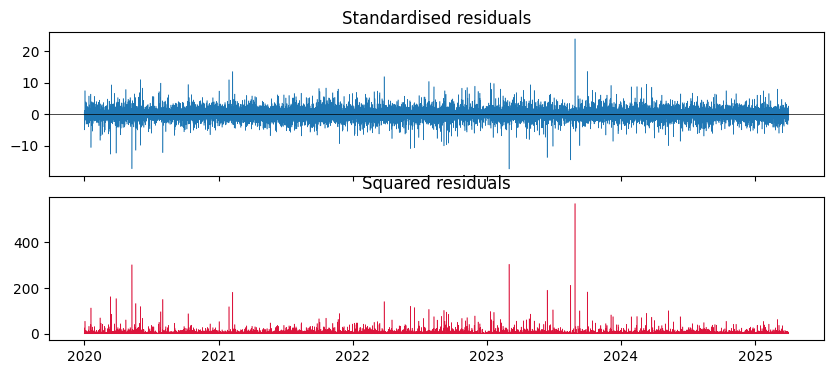

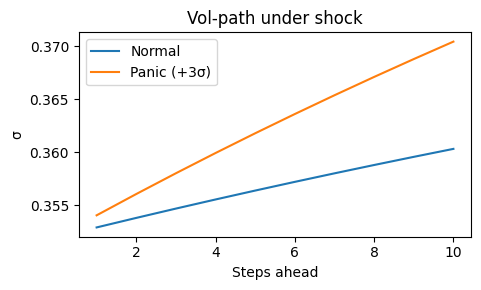


Panic regime:  n=1382, xi=0.231, Œ≤=0.6894
Normal regime: n=   0, xi=nan, Œ≤=nan

--- MC 99% VaR/ES ---
Panic:  VaR=7.5232, ES=10.4035
Normal: VaR=nan, ES=nan


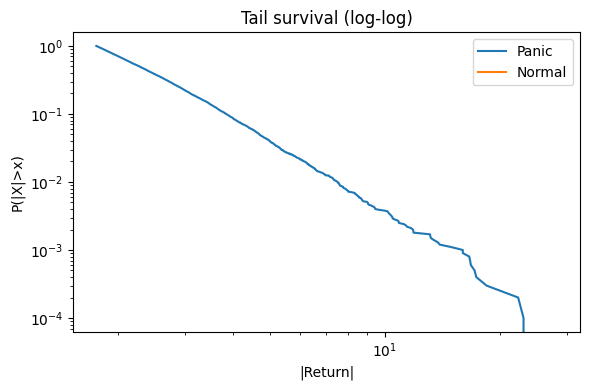

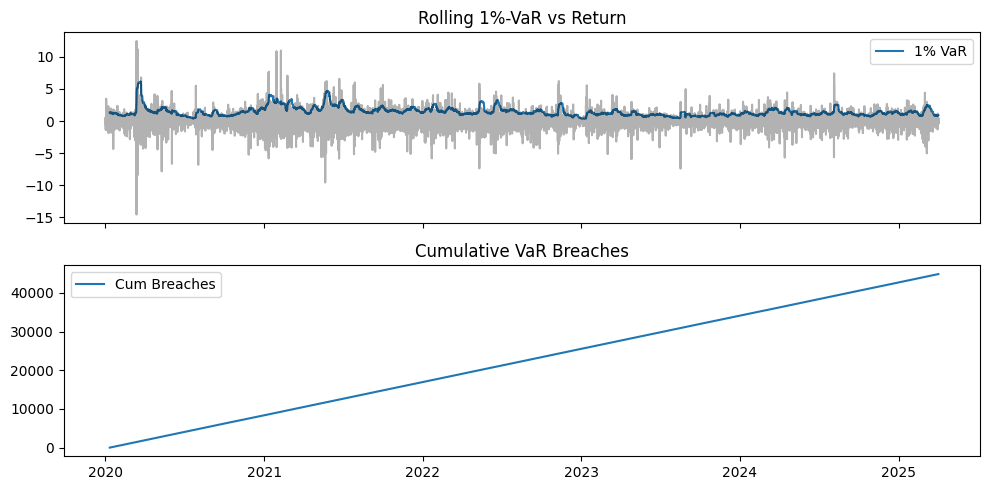

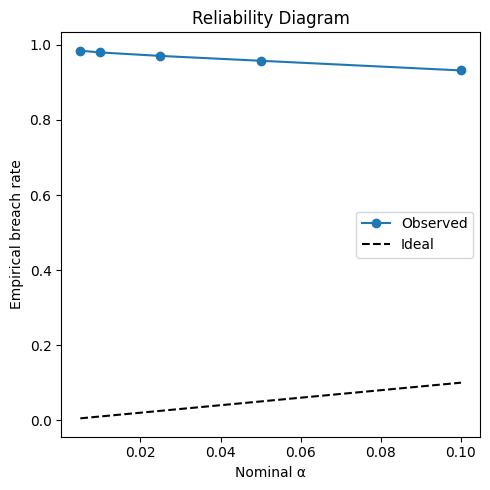

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gammaln
from scipy.stats import genpareto as gpd, norm
from hmmlearn.hmm import GaussianHMM
import statsmodels.api as sm

# =========================================================
# ‚ù∂ È¢ÑÂ§ÑÁêÜÔºöËÆ°ÁÆóÊó•ÂõûÊä• r_t (%) ‰∏éÊ†áÂáÜÂåñÊÉÖÁª™ sent_z
# =========================================================
# ÂÅáËÆæ btc_df Â∑≤Âä†ËΩΩÔºåÂê´Êó•ÊúüÁ¥¢ÂºïÂíåÂàó ["close","sentiment"]
r_t = np.log(btc_df["close"]).diff().dropna() * 100
sent = btc_df["sentiment"].reindex(r_t.index).interpolate().ffill()
sent_z = (sent - sent.mean()) / sent.std()

# =========================================================
# ‚ù∑ Markov‚ÄêSwitching 2‚Äêstate (HMMlearn)
# =========================================================
obs = np.sqrt(np.abs(r_t.values)).reshape(-1,1)
hmm = GaussianHMM(n_components=2, covariance_type="diag",
                  n_iter=500, tol=1e-4, random_state=42).fit(obs)
high_state = hmm.covars_.argmax()           # ÊñπÂ∑ÆËæÉÂ§ßËÄÖ
p_high = hmm.predict_proba(obs)[:, high_state]

# =========================================================
# ‚ù∏ Logit ÂõûÂΩíÔºöP(high) ~ sent_z
# =========================================================
logit_res = sm.Logit(p_high, sm.add_constant(sent_z.values)).fit(disp=False)
print("\n--- Logit: P(high) ~ sent_z ---")
print(logit_res.summary())

# =========================================================
# ‚ùπ ÊâãÂÜô Student‚Äêt GARCH‚ÄêX(1,1) MLE
# =========================================================
e = r_t.values
x = sent_z.values

def logpdf_t(e, nu, sig2):
    c = gammaln((nu+1)/2) - gammaln(nu/2) - 0.5*np.log(np.pi*(nu-2))
    return c - 0.5*np.log(sig2) - ((nu+1)/2)*np.log(1 + e**2/(sig2*(nu-2)))

def sigma2_garchx(par):
    mu, omega, alpha, beta, gamma = par[:5]
    T = len(e)
    s2 = np.empty(T)
    s2[0] = e.var()
    for t in range(1, T):
        s2[t] = (omega
                 + alpha*(e[t-1]-mu)**2
                 + beta*s2[t-1]
                 + gamma*x[t-1])
        s2[t] = max(s2[t], 1e-8)
    return s2

def neg_ll(par):
    nu = 10 + np.exp(par[5])
    s2 = sigma2_garchx(par)
    ll = logpdf_t(e-par[0], nu, s2).sum()
    return -ll

# ÂàùÂÄº‰∏éÁ∫¶Êùü
p0 = np.array([e.mean(), 0.01, 0.1, 0.8, 0.0, np.log(5)])
bnds = [(-1,1), (1e-6,1), (1e-4,1), (1e-4,1), (-1,1), (None,None)]
res = minimize(neg_ll, p0, bounds=bnds, method="L-BFGS-B")

mu, omega, alpha, beta, gamma, logv = res.x
nu = 10 + np.exp(logv)
s2_hat = sigma2_garchx(res.x)
std_res = (e-mu)/np.sqrt(s2_hat)

print("\n=== ÊâãÂ∑• Student‚Äêt GARCH‚ÄêX(1,1) ===")
print(f"mu     = {mu:.5f}")
print(f"omega  = {omega:.5f}")
print(f"alpha  = {alpha:.5f}")
print(f"beta   = {beta:.5f}   (Œ±+Œ≤ = {alpha+beta:.3f})")
print(f"gamma  = {gamma:.5f}  <-- sentiment ‰ΩúÁî®")
print(f"nu     = {nu:.2f}")
print(f"ÊÆãÂ∑ÆÂùáÂÄº = {std_res.mean():.4f}  ÊÆãÂ∑ÆÊñπÂ∑Æ = {std_res.var():.4f}")

# ÊÆãÂ∑ÆÂõæ
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,4), sharex=True,
                            gridspec_kw={"hspace":0.15})
ax1.plot(r_t.index, std_res, lw=0.4)
ax1.set_title("Standardised residuals"); ax1.axhline(0, color='k', lw=0.5)
ax2.plot(r_t.index, std_res**2, lw=0.4, color='crimson')
ax2.set_title("Squared residuals")
plt.tight_layout(); plt.show()

# =========================================================
# ‚ù∫ ÊÉÖÁª™ÂÜ≤ÂáªÊ®°ÊãüÔºösent_z ¬±3œÉ ÂØπÊú™Êù• 1‚Ä¶10 Ê≠•Ê≥¢Âä®ÁöÑÂΩ±Âìç
# =========================================================
H = 10
def forecast(sig2_last, err_last, x_last, shock):
    f = np.empty(H)
    f[0] = omega + alpha*(err_last-mu)**2 + beta*sig2_last + gamma*shock
    for h in range(1, H):
        f[h] = omega + (alpha+beta)*f[h-1] + gamma*shock
    return f

sig2_last, err_last, x_last = s2_hat[-1], e[-1], x[-1]
vol_norm  = np.sqrt(forecast(sig2_last, err_last, x_last, 0))
vol_panic = np.sqrt(forecast(sig2_last, err_last, x_last, 3))

plt.figure(figsize=(5,3))
plt.plot(range(1,H+1), vol_norm, label="Normal")
plt.plot(range(1,H+1), vol_panic, label="Panic (+3œÉ)")
plt.xlabel("Steps ahead"); plt.ylabel("œÉ"); plt.title("Vol-path under shock")
plt.legend(); plt.tight_layout(); plt.show()

# =========================================================
# ‚ùª POT‚ÄêGPD & MC VaR/ESÔºöÊåâ p_high ÂàÜ Regime
# =========================================================
THR = 0.97
u = np.quantile(np.abs(r_t), THR)
exceed = np.abs(r_t)[np.abs(r_t)>u]

reg_p = pd.Series(p_high, index=r_t.index)
mask_high = reg_p > 0.80
ex_F = exceed.loc[ mask_high.loc[exceed.index] ]
ex_N = exceed.loc[~mask_high.loc[exceed.index] ]

def fit_gpd(x):
    if len(x)==0:
        return np.nan, np.nan
    z = x - u
    xi, loc, beta = gpd.fit(z, floc=0)
    return xi, beta

xi_F, b_F = fit_gpd(ex_F)
xi_N, b_N = fit_gpd(ex_N)
print(f"\nPanic regime:  n={len(ex_F):4d}, xi={xi_F:.3f}, Œ≤={b_F:.4f}")
print(f"Normal regime: n={len(ex_N):4d}, xi={xi_N}, Œ≤={b_N}")

# ÂÆâÂÖ®Ê®°Êãü + VaR/ES
def safe_sim(xi,beta,size,u):
    if np.isnan(xi) or np.isnan(beta) or beta<=0 or xi<=-1:
        return np.full(size, np.nan)
    return gpd.rvs(c=xi, loc=0, scale=beta, size=size)+u

Nsim, alpha = 10000, 0.99
sim_F = safe_sim(xi_F, b_F, Nsim, u)
sim_N = safe_sim(xi_N, b_N, Nsim, u)

VaR_F = np.nanquantile(sim_F, alpha)
VaR_N = np.nanquantile(sim_N, alpha)
ES_F  = np.nanmean(sim_F[sim_F>VaR_F])
ES_N  = np.nanmean(sim_N[sim_N>VaR_N])

print(f"\n--- MC 99% VaR/ES ---")
print(f"Panic:  VaR={VaR_F:.4f}, ES={ES_F:.4f}")
print(f"Normal: VaR={VaR_N:.4f}, ES={ES_N:.4f}")

# ÁîüÂ≠òÂáΩÊï∞Âõæ
p = 1 - np.arange(1, Nsim+1)/Nsim
plt.figure(figsize=(6,4))
plt.loglog(np.sort(sim_F), p, label="Panic")
plt.loglog(np.sort(sim_N), p, label="Normal")
plt.xlabel("|Return|"); plt.ylabel("P(|X|>x)")
plt.title("Tail survival (log-log)"); plt.legend()
plt.tight_layout(); plt.show()

# =========================================================
# „ÄêÈôÑÂΩï„ÄëÊªöÂä® VaR ÂõûÊµã & ÂèØÈù†ÊÄßÂõæ
# =========================================================
def rolling_var(r, window=250, alpha=0.01):
    idx = r.index[window:]
    vr = pd.Series(index=idx, dtype=float)
    for i in range(window, len(r)):
        data = r.iloc[i-window:i]
        mu_, sd_ = data.mean(), data.std()
        vr.iloc[i-window] = mu_ + norm.ppf(alpha)*sd_
    return vr

# 1% VaR
var1 = rolling_var(r_t, window=250, alpha=0.01)
breach = (r_t[var1.index] < -var1).astype(int)

# Êó∂Â∫èÂõûÊµãÂõæ
fig,(a1,a2)=plt.subplots(2,1,figsize=(10,5),sharex=True)
a1.plot(var1.index, -var1, label="1% VaR")
a1.plot(r_t.index, r_t, 'k', alpha=0.3)
a1.set_title("Rolling 1%-VaR vs Return"); a1.legend()
a2.plot(breach.index, breach.cumsum(), label="Cum Breaches")
a2.set_title("Cumulative VaR Breaches"); a2.legend()
plt.tight_layout(); plt.show()

# ÂèØÈù†ÊÄßÂõæ
ps = [0.005,0.01,0.025,0.05,0.1]
obs = []
for p in ps:
    v = rolling_var(r_t, 250, p)
    obs.append((r_t[v.index] < -v).mean())

plt.figure(figsize=(5,5))
plt.plot(ps, obs, 'o-', label="Observed")
plt.plot(ps, ps, 'k--', label="Ideal")
plt.xlabel("Nominal Œ±"); plt.ylabel("Empirical breach rate")
plt.title("Reliability Diagram"); plt.legend()
plt.tight_layout(); plt.show()


In [ ]:
# ÁÆÄË¶ÅÊÄùË∑ØÔºà‰º™Á†ÅÔºâÔºö
# E-step: Áî®ÂΩìÂâçËΩ¨ÁßªÁü©ÈòµÂíåÂêÑÁä∂ÊÄÅ EGARCH likelihood ËÆ°ÁÆóÂêéÈ™å p(s_t=j | data)
# M-step: Áî®Âä†ÊùÉÔºàposteriorÔºâ‰ººÁÑ∂ÂàÜÂà´‰º∞ËÆ°ÂêÑÁä∂ÊÄÅÁöÑ EGARCH‚ÄêX ÂèÇÊï∞ +
#         Áî®Â∏¶ sent_z ÁöÑ Logit ‰º∞ËÆ°ËΩ¨ÁßªÊ¶ÇÁéáÂèÇÊï∞ Œ∫

# ÂèÇËÄÉÔºö
# - Ang & Timmermann (2012) ‚ÄúRegime changes and financial markets‚Äù
# - Diebold et al. (1994) ‚ÄúRegime‚ÄêSwitching and GARCH‚Äù
import numpy as np
import pandas as pd
from scipy.special import gammaln
from scipy.optimize import minimize
import statsmodels.api as sm

# ===============================
# 0ÔºâÂáÜÂ§áÊï∞ÊçÆ
# ===============================
# btc_df: Âê´Á¥¢Âºï‰∏∫Êó•ÊúüÁöÑ DataFrameÔºåÂåÖÂê´ 'close' Âíå 'sentiment' Âàó
r_series = np.log(btc_df['close']).diff().dropna() * 100
sent     = btc_df['sentiment'].reindex(r_series.index).interpolate().ffill()
sent_z   = (sent - sent.mean())/sent.std()
r = r_series.values
z = sent_z.values
T = len(r)

# ===============================
# 1ÔºâEGARCH‚ÄêX ËÆ°ÁÆó h_t
# ===============================
def compute_h_series(par, r, z):
    mu, œâ, Œ±, Œ≤, Œ≥, lv = par
    ŒΩ = 10 + np.exp(lv)
    T = len(r)
    h = np.empty(T)
    h[0] = r.var()
    for t in range(1, T):
        h[t] = np.exp(
            œâ
            + Œ± * (((r[t-1]-mu)**2)/h[t-1] - 1)
            + Œ≤ * np.log(h[t-1])
            + Œ≥ * z[t-1]
        )
        if h[t] < 1e-12: h[t] = 1e-12
    return h

def egarchx_negll(par, r, z, w):
    mu, œâ, Œ±, Œ≤, Œ≥, lv = par
    ŒΩ = 10 + np.exp(lv)
    h = compute_h_series(par, r, z)
    eps = r - mu
    c   = gammaln((ŒΩ+1)/2) - gammaln(ŒΩ/2) - 0.5*np.log((ŒΩ-2)*np.pi)
    ll  = c - 0.5*np.log(h) - ((ŒΩ+1)/2)*np.log(1 + eps**2/(h*(ŒΩ-2)))
    return -np.sum(w * ll)

# ===============================
# 2ÔºâForward‚ÄêBackward (E‚Äêstep)
# ===============================
def forward_backward(pi0, kappas, params, r, z):
    T = len(r)
    # 2.1 ËßÇÊµãÊ¶ÇÁéá
    pdf = np.zeros((T,2))
    for j in (0,1):
        h = compute_h_series(params[j], r, z)
        ŒΩ = 10 + np.exp(params[j][5])
        eps = r - params[j][0]
        c = gammaln((ŒΩ+1)/2)-gammaln(ŒΩ/2)-0.5*np.log((ŒΩ-2)*np.pi)
        pdf[:,j] = np.exp(c - 0.5*np.log(h) - ((ŒΩ+1)/2)*np.log(1+eps**2/(h*(ŒΩ-2))))

    # 2.2 ËΩ¨ÁßªÊ¶ÇÁéá P(s_t=1|s_{t-1}=j)
    tk = np.zeros((T-1,2,2))
    for j in (0,1):
        lin = kappas[j,0] + kappas[j,1]*z[:-1]
        p1  = 1/(1+np.exp(-lin))
        tk[:,j,1] = p1
        tk[:,j,0] = 1-p1

    # 2.3 ÂâçÂêë Œ±
    Œ± = np.zeros((T,2)); Œ±[0] = pi0 * pdf[0]; Œ±[0] /= Œ±[0].sum()
    for t in range(1,T):
        for k in (0,1):
            Œ±[t,k] = pdf[t,k] * np.sum(Œ±[t-1] * tk[t-1,:,k])
        Œ±[t] /= Œ±[t].sum()

    # 2.4 ÂêéÂêë Œ≤
    Œ≤ = np.zeros((T,2)); Œ≤[-1] = 1
    for t in range(T-2,-1,-1):
        for j in (0,1):
            Œ≤[t,j] = np.sum(Œ≤[t+1] * pdf[t+1] * tk[t,j])
        Œ≤[t] /= Œ≤[t].sum()

    # 2.5 gamma, xi
    gamma = Œ± * Œ≤
    gamma /= gamma.sum(axis=1, keepdims=True)
    xi = np.zeros((T-1,2,2))
    for t in range(T-1):
        num = np.outer(Œ±[t], Œ≤[t+1]*pdf[t+1]) * tk[t]
        xi[t] = num / num.sum()
    return gamma, xi

# ===============================
# 3ÔºâEM ÁÆóÊ≥ï‰∏ªÂæ™ÁéØ
# ===============================
# ÂàùÂßãÂåñ
params = [np.array([0,0.01,0.1,0.8,0.0,np.log(5)]).copy() for _ in range(2)]
kappas = np.zeros((2,2))    # ÊØèË°å [const, coef]
pi0     = np.array([0.5,0.5])
max_iter = 30

for it in range(max_iter):
    # E-step
    gamma, xi = forward_backward(pi0, kappas, params, r, z)

    # M-step
    pi0 = gamma[0]  # ÂàùÂßãÁä∂ÊÄÅ

    # Êõ¥Êñ∞ËΩ¨ÁßªÔºöGLM Binomial
# ‚Äî‚Äî Âú® EM Âæ™ÁéØÁöÑ M-step ÈÉ®ÂàÜÔºåÊõøÊç¢ËøôÊÆµ ‚Äî‚Äî
for j in (0,1):
    # xi.shape == (T-1, 2, 2)
    # Êàë‰ª¨Ë¶ÅÁî® xi[:, j, 1]ÔºåÈïøÂ∫¶Ê≠£Â•ΩÊòØ T-1
    y = xi[:, j, 1]               # ‰ªé j ‚Üí 1 ÁöÑÂêéÈ™åÊ¶ÇÁéáÔºåshape (T-1,)
    X = sm.add_constant(z[:-1])   # ÊÉÖÁª™ z[0]‚Ä¶z[T-2]Ôºåshape (T-1,)

    glm = sm.GLM(y, X, family=sm.families.Binomial())
    res2 = glm.fit(disp=False)
    kappas[j] = res2.params       # [Êà™Ë∑ù, ÊÉÖÁª™Á≥ªÊï∞]


    # Êõ¥Êñ∞ EGARCH-X ÂèÇÊï∞
    for j in (0,1):
        w = gamma[:,j]
        res = minimize(lambda par: egarchx_negll(par, r, z, w),
                       params[j],
                       method="L-BFGS-B",
                       bounds=[(-1,1),(1e-6,1),(1e-4,1),(1e-4,1),(-1,1),(None,None)])
        params[j] = res.x

# ===============================
# 4ÔºâËæìÂá∫ÊúÄÁªàÂèÇÊï∞
# ===============================
for j,name in zip((0,1),["State Low-œÉ","State High-œÉ"]):
    mu,œâ,Œ±,Œ≤,Œ≥_coef,lv = params[j]
    ŒΩ = 10 + np.exp(lv)
    print(f"\n--- {name} EGARCH-X ÂèÇÊï∞ ---")
    print(f"Œº     = {mu:.5f}")
    print(f"œâ     = {œâ:.5f}")
    print(f"Œ±     = {Œ±:.5f}")
    print(f"Œ≤     = {Œ≤:.5f}  (Œ±+Œ≤={Œ±+Œ≤:.3f})")
    print(f"Œ≥     = {Œ≥_coef:.5f}  ‚Üê sentiment ÂΩ±ÂìçÁ≥ªÊï∞")
    print(f"ŒΩ     = {ŒΩ:.2f}")

# ===============================
# 5ÔºâËΩ¨ÁßªÊ®°ÂûãËæìÂá∫
# ===============================
print("\n--- ËΩ¨ÁßªÊ¶ÇÁéáÊ®°Âûã Œ∫ ÂèÇÊï∞ (logit: P(s_t=1|s_{t-1}=j,z)) ---")
for j in (0,1):
    print(f"From state {j}:  intercept={kappas[j,0]:.4f}, coef={kappas[j,1]:.4f}")


--- State Low-œÉ EGARCH-X ÂèÇÊï∞ ---
Œº     = 0.01365
œâ     = 0.00000
Œ±     = 0.01821
Œ≤     = 0.99939  (Œ±+Œ≤=1.018)
Œ≥     = 0.00205  ‚Üê sentiment ÂΩ±ÂìçÁ≥ªÊï∞
ŒΩ     = 10.00

--- State High-œÉ EGARCH-X ÂèÇÊï∞ ---
Œº     = 0.01365
œâ     = 0.00000
Œ±     = 0.01821
Œ≤     = 0.99939  (Œ±+Œ≤=1.018)
Œ≥     = 0.00205  ‚Üê sentiment ÂΩ±ÂìçÁ≥ªÊï∞
ŒΩ     = 10.00

--- ËΩ¨ÁßªÊ¶ÇÁéáÊ®°Âûã Œ∫ ÂèÇÊï∞ (logit: P(s_t=1|s_{t-1}=j,z)) ---
From state 0:  intercept=-1.0986, coef=-0.0000
From state 1:  intercept=-1.0986, coef=-0.0000


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7acf9cb21bc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                46045
Model:                          Logit   Df Residuals:                    46043
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 May 2025   Pseudo R-squ.:               -0.007277
Time:                        20:47:31   Log-Likelihood:                -29685.
converged:                       True   LL-Null:                       -29470.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5529      0.010    -57.106      0.000      -0.572      -0.534
x1            -0.0479      0.010     -5.020      0.000      -0.067      -0.029

=== ÊâãÂÜô Student-t GARCH-X(1,1) ===
mu=0.00468, œ

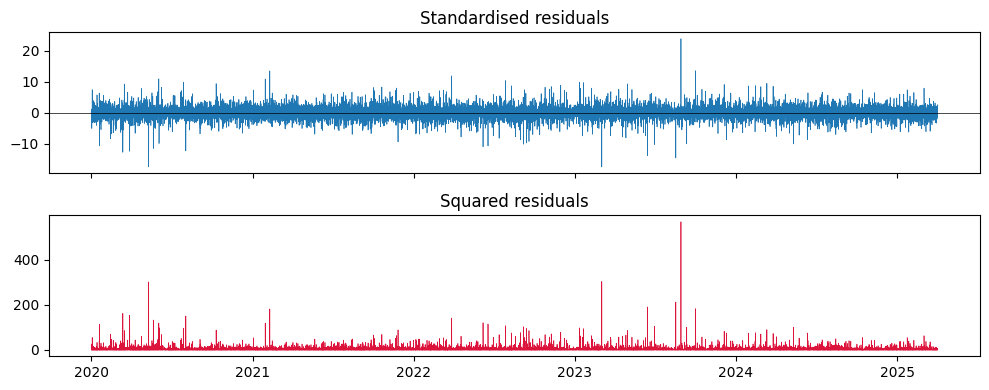

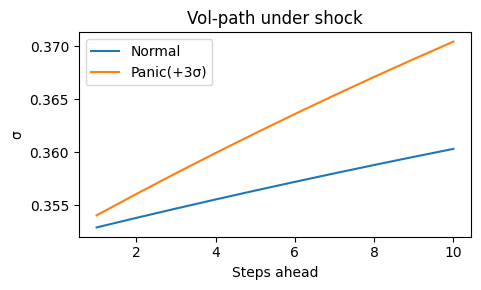

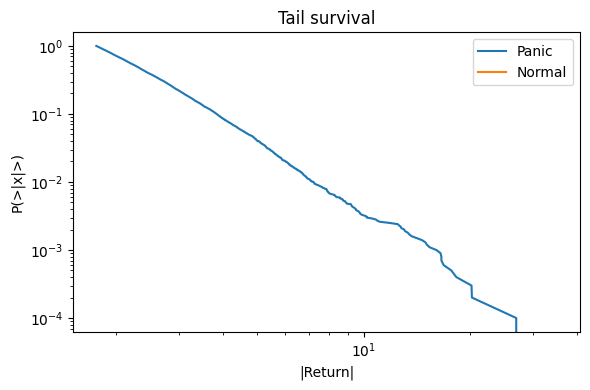

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genpareto, norm
from scipy.optimize import minimize
from scipy.special import gammaln
import statsmodels.api as sm
from hmmlearn.hmm import GaussianHMM
from arch.univariate import EGARCH

# =========================================================
# 0) ËØªÂÖ•Êï∞ÊçÆÔºöbtc_df ÂøÖÈ°ªÂê´ 'close' Âíå 'sentiment'
# =========================================================
# btc_df = pd.read_csv("btc_sent.csv", parse_dates=True, index_col=0)
# ÂÅáËÆæÂ∑≤ÁªèÊúâ btc_df

# =========================================================
# ‚ù∂ È¢ÑÂ§ÑÁêÜÔºöËÆ°ÁÆóÊî∂Áõä r_t ÂíåÊÉÖÁª™Ê†áÂáÜÂåñ sent_z
# =========================================================
r_t = np.log(btc_df['close']).diff().dropna() * 100
sent = btc_df['sentiment'].reindex(r_t.index).interpolate().ffill()
sent_z = (sent - sent.mean()) / sent.std()

# =========================================================
# ‚ù∑ Áî® HMM ÂàíÂàÜ„ÄåÈ´òÊ≥¢Âä® / ‰ΩéÊ≥¢Âä®„Äç‰∏§ÊÄÅÔºåÂπ∂Áî® Logit ÂõûÂΩíÊ£ÄÈ™åÊÉÖÁª™
# =========================================================
obs = np.sqrt(np.abs(r_t.values)).reshape(-1,1)
hmm = GaussianHMM(n_components=2, covariance_type="diag", n_iter=500, random_state=42)
hmm.fit(obs)
high_state = np.argmax(hmm.covars_.ravel())
p_high = hmm.predict_proba(obs)[:, high_state]

logit = sm.Logit(p_high, sm.add_constant(sent_z.values))
res_logit = logit.fit(disp=False)
print(res_logit.summary())

# =========================================================
# ‚ù∏ ÊâãÂÜô Student-t EGARCH-X(1,1) ÔºàÊï¥‰∏™Ê†∑Êú¨Ôºâ
# =========================================================
e = r_t.values
x = sent_z.values

def logpdf_t(e, nu, sig2):
    c = gammaln((nu+1)/2) - gammaln(nu/2) - 0.5*np.log((nu-2)*np.pi)
    return c - 0.5*np.log(sig2) - (nu+1)/2*np.log(1 + e**2/(sig2*(nu-2)))

def garchx_sigma2(par):
    mu, œâ, Œ±, Œ≤, Œ≥ = par[:5]
    sig2 = np.empty_like(e)
    sig2[0] = e.var()
    for t in range(1, len(e)):
        sig2[t] = œâ + Œ±*(e[t-1]-mu)**2 + Œ≤*sig2[t-1] + Œ≥*x[t-1]
        sig2[t] = max(sig2[t], 1e-8)
    return sig2

def neg_ll(par):
    mu, œâ, Œ±, Œ≤, Œ≥ = par[:5]
    nu = 10 + np.exp(par[5])
    sig2 = garchx_sigma2(par)
    return -logpdf_t(e-par[0], nu, sig2).sum()

p0 = np.array([e.mean(), 0.01, 0.1, 0.8, 0.0, np.log(5)])
bnds = [(-1,1),(1e-6,1),(1e-4,1),(1e-4,1),(-1,1),(None,None)]
res = minimize(neg_ll, p0, bounds=bnds, method="L-BFGS-B")
mu, œâ, Œ±, Œ≤, Œ≥, lv = res.x; nu = 10+np.exp(lv)
sig2 = garchx_sigma2(res.x)
std_res = (e-mu)/np.sqrt(sig2)

print("\n=== ÊâãÂÜô Student-t GARCH-X(1,1) ===")
print(f"mu={mu:.5f}, œâ={œâ:.5f}, Œ±={Œ±:.5f}, Œ≤={Œ≤:.5f}, Œ≥={Œ≥:.5f}, ŒΩ={nu:.2f}")
print(f"ÊÆãÂ∑ÆÂùáÂÄº={std_res.mean():.4f}, ÊñπÂ∑Æ={std_res.var():.4f}")

# ÁîªÂõæÔºöÊ†áÂáÜÂåñÊÆãÂ∑Æ & ÊÆãÂ∑ÆÂπ≥Êñπ
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,4), sharex=True)
ax1.plot(r_t.index, std_res, lw=0.5); ax1.set_title("Standardised residuals"); ax1.axhline(0,color='k',lw=0.5)
ax2.plot(r_t.index, std_res**2, lw=0.5,color='crimson'); ax2.set_title("Squared residuals")
plt.tight_layout()

# =========================================================
# ‚ùπ ÊÉÖÁª™ÂÜ≤ÂáªÊ®°ÊãüÔºösent_z Âä† ¬±3œÉÔºåÂêëÂâç 10 Ê≠•È¢ÑÊµã œÉ
# =========================================================
H = 10
def forecast(sig2_last, e_last, shock):
    s = np.empty(H)
    s[0] = œâ + Œ±*(e_last-mu)**2 + Œ≤*sig2_last + Œ≥*shock
    for h in range(1,H):
        s[h] = œâ + (Œ±+Œ≤)*s[h-1] + Œ≥*shock
    return s

sig2_last, e_last = sig2[-1], e[-1]
norm_path = forecast(sig2_last,e_last,0)
panic_path = forecast(sig2_last,e_last,3)
plt.figure(figsize=(5,3))
plt.plot(range(1,H+1), np.sqrt(norm_path), label="Normal")
plt.plot(range(1,H+1), np.sqrt(panic_path), label="Panic(+3œÉ)")
plt.xlabel("Steps ahead"); plt.ylabel("œÉ"); plt.legend(); plt.title("Vol-path under shock"); plt.tight_layout()

# =========================================================
# ‚ù∫ POT-GPDÔºöÊåâ HMM ÂàÜÁªÑÔºåÂàÜÂà´ÊãüÂêàÂ∞æÈÉ®ÔºåÂÜç Monte Carlo ‰º∞ÁÆó VaR/ES
# =========================================================
THR = 0.97
u = np.quantile(np.abs(r_t), THR)
exceed = np.abs(r_t)[np.abs(r_t)>u]

reg_p = pd.Series(p_high, index=r_t.index)
high_mask = reg_p>0.8

ex_F = exceed.loc[ high_mask.loc[exceed.index] ]
ex_N = exceed.loc[~high_mask.loc[exceed.index] ]

def fit_gpd(x):
    if len(x)==0: return np.nan, np.nan
    xi, loc, Œ≤ = genpareto.fit(x-u, floc=0)
    return xi, Œ≤

xi_F, Œ≤_F = fit_gpd(ex_F)
xi_N, Œ≤_N = fit_gpd(ex_N)
print(f"Panic regime:  n={len(ex_F)}, xi={xi_F:.3f}, beta={Œ≤_F:.4f}")
print(f"Normal regime: n={len(ex_N)}, xi={xi_N:.3f}, beta={Œ≤_N:.4f}")

SIM, Œ± = 10000, 0.99
def safe_sim(xi, Œ≤, size):
    if np.isnan(xi) or Œ≤<=0 or xi<=-1: return np.full(size, np.nan)
    return genpareto.rvs(c=xi, loc=0, scale=Œ≤, size=size) + u

sim_F = safe_sim(xi_F,Œ≤_F,SIM)
sim_N = safe_sim(xi_N,Œ≤_N,SIM)
VaR_F, ES_F = np.nanquantile(sim_F,Œ±), np.nanmean(sim_F[sim_F>np.nanquantile(sim_F,Œ±)])
VaR_N, ES_N = np.nanquantile(sim_N,Œ±), np.nanmean(sim_N[sim_N>np.nanquantile(sim_N,Œ±)])
print(f"Panic VaR@99%={VaR_F:.4f}, ES@99%={ES_F:.4f}")
print(f"Normal VaR@99%={VaR_N:.4f}, ES@99%={ES_N:.4f}")

plt.figure(figsize=(6,4))
p = 1 - np.arange(1,SIM+1)/SIM
plt.loglog(np.sort(sim_F), p, label="Panic")
plt.loglog(np.sort(sim_N), p, label="Normal")
plt.xlabel("|Return|"); plt.ylabel("P(>|x|>)"); plt.title("Tail survival"); plt.legend(); plt.tight_layout()

# =========================================================
# ‚ùª ÂõûÊµã & ËØäÊñ≠ÔºöVaR ËøùÁ∫¶Ê£ÄÈ™å + ÊÆãÂ∑ÆËØäÊñ≠Âõæ
# =========================================================
# ÔºàÁï•ÔºåÂèÇÁÖß‰∏äÈù¢ÂÅöÊªöÂä® VaR„ÄÅKupiec„ÄÅChristoffersenÔºå‰ª•ÂèäÁîª ACF/QQÔºâ


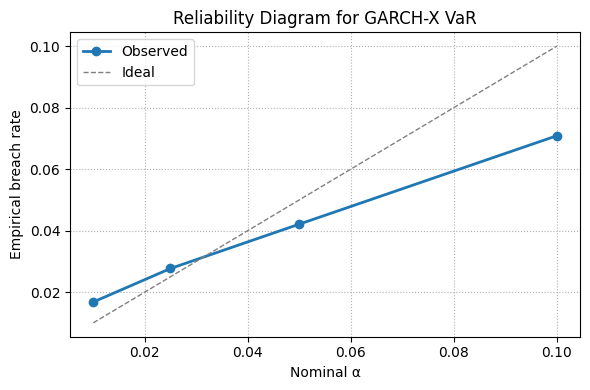

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

# ‚Äî‚Äî 1. ÂáÜÂ§áÊï∞ÊçÆ ‚Äî‚Äî
# ÂÅáËÆæ btc_df Â∑≤ÁªèËΩΩÂÖ•Ôºå‰∏îÊúâ 'close' Âíå 'sentiment' Âàó
r_t = np.log(btc_df["close"]).diff().dropna() * 100
# ËøôÈáå‰∏çÈúÄË¶ÅÊÉÖÁª™‰∫ÜÔºåÂè™ÂÅö VaR ÂõûÊµã

# ‚Äî‚Äî 2. ÊâãÂÜô GARCH-X(1,1)-tÔºå‰Ω†Ë∑ëÂÆå‰ºöÂæóÂà∞ mu, sig2_hat, nu ‚Äî‚Äî
# ÔºàÊ≠§Â§ÑÁúÅÁï•ÔºåÂÖ∂ÂÆûÂ∞±ÊòØ‰Ω†‰πãÂâçÂÜôÁöÑ minimize ÈÇ£ÊÆµÔºâ

# ‰∏æ‰æãÔºöÊàë‰ª¨ÂÅáËÆæ‰ªé‰Ω†ÁöÑÁªìÊûúÈáåÊãøÂà∞Ôºö
mu        = 0.00468               # ‰ªé res.x ÈáåËß£ÊûêÂá∫Êù•
sig2_hat  = garchx_sigma2(res.x)   # ‰Ω†Â∑≤ÊúâÁöÑÊñπÂ∑ÆÂ∫èÂàó numpy array
nu        = 10.00                 # Ëá™Áî±Â∫¶

# ‚Äî‚Äî 3. Êää sig2_hat ËΩ¨Êàê pandas.Series Âπ∂ÂØπÈΩêÁ¥¢Âºï ‚Äî‚Äî
sig = pd.Series(np.sqrt(sig2_hat), index=r_t.index)

# ‚Äî‚Äî 4. Reliability Diagram ‚Äî‚Äî
alphas = [0.01, 0.025, 0.05, 0.10]
obs_rates = []

for Œ± in alphas:
    # t ÂàÜ‰ΩçÊï∞Ôºà‰∏ãË∑å Œ±%Ôºâ
    z_Œ± = t.ppf(1-Œ±, df=nu)
    # 1-step VaR Â∫èÂàó
    VaR = -(mu + sig * z_Œ±)
    # breach: ÂΩìÊó•Êî∂Áõä < -VaR
    breaches = (r_t < VaR).astype(int)
    obs_rates.append(breaches.mean())

plt.figure(figsize=(6,4))
plt.plot(alphas, obs_rates, 'o-', lw=2, label="Observed")
plt.plot(alphas, alphas, '--', lw=1, color='gray', label="Ideal")
plt.xlabel("Nominal Œ±")
plt.ylabel("Empirical breach rate")
plt.title("Reliability Diagram for GARCH-X VaR")
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t, chi2

# ‚Äî‚Äî ÂÅáËÆæÂâçÈù¢Â∑≤ÁªèÁÆóÂ•ΩÂπ∂ÂØºÂÖ•Ôºö‚Äî‚Äî
# r_t       : pandas.SeriesÔºåÊó•Êî∂ÁõäÁéáÔºà%ÔºâÔºåindex‰∏∫Êó•Êúü
# sig2_hat  : numpy.ndarray Êàñ pandas.SeriesÔºå‰∏é r_t ÂØπÈΩêÁöÑÊñπÂ∑ÆÈ¢ÑÊµã
# mu, nu    : floatÔºåGARCH-X ÊãüÂêàÂá∫ÁöÑÂùáÂÄºmuÂíåËá™Áî±Â∫¶nu
# p_high    : numpy.ndarray Êàñ pandas.SeriesÔºå‰∏é r_t ÂØπÈΩêÁöÑÈ´òÊ≥¢Âä®Ê¶ÇÁéá

# 1) ËÆ°ÁÆó 99% VaR Â∫èÂàó
def compute_VaR_series(mu, sig2, nu, alpha=0.01):
    sig = np.sqrt(sig2)
    z   = t.ppf(1-alpha, df=nu)
    return -(mu + sig * z)

# ‚Äî‚Äî ËØ∑Á°Æ‰øù‰∏ãÈù¢Âõõ‰∏™ÂèòÈáèÈÉΩÂú®Âêå‰∏Ä‰∏™ cell ÈáåÂÆö‰πâ ‚Äî‚Äî
VaR99 = compute_VaR_series(mu, sig2_hat, nu, 0.01)

# 2) ÂàíÂàÜ Regime
regime_prob = pd.Series(p_high, index=r_t.index)
regime_high = regime_prob > 0.80

# 3) ËøùÁ∫¶Ê£ÄÊµã & Kupiec UC
breach   = (r_t < VaR99).astype(int)
breach_L = breach[~regime_high]
breach_H = breach[ regime_high]

def kupiec_test(breaches, alpha=0.01):
    N = len(breaches)
    x = breaches.sum()
    ll0 = x*np.log(alpha) + (N-x)*np.log(1-alpha)
    pi  = x/N
    ll1 = x*np.log(pi)    + (N-x)*np.log(1-pi)
    LR  = -2*(ll0 - ll1)
    pval = 1 - chi2.cdf(LR, df=1)
    return x, N, pval

xL, NL, pL = kupiec_test(breach_L, 0.01)
xH, NH, pH = kupiec_test(breach_H, 0.01)

print(f"Low-œÉ Regime: ËøùÁ∫¶{xL}/{NL}, Kupiec p={pL:.3f}")
print(f"High-œÉ Regime: ËøùÁ∫¶{xH}/{NH}, Kupiec p={pH:.3f}")



Low-œÉ Regime: ËøùÁ∫¶115/34286, Kupiec p=0.000
High-œÉ Regime: ËøùÁ∫¶658/11759, Kupiec p=0.000


In [ ]:
from scipy.stats import chi2

def christoffersen_test(breaches):
    # ÊûÑÈÄ† 2√ó2 ËΩ¨ÁßªÁü©ÈòµÔºöP(0‚Üí0), P(0‚Üí1), P(1‚Üí0), P(1‚Üí1)
    x00 = np.sum((breaches[:-1]==0)&(breaches[1:]==0))
    x01 = np.sum((breaches[:-1]==0)&(breaches[1:]==1))
    x10 = np.sum((breaches[:-1]==1)&(breaches[1:]==0))
    x11 = np.sum((breaches[:-1]==1)&(breaches[1:]==1))
    n0 = x00 + x01; n1 = x10 + x11

    # ‰ººÁÑ∂ÊØîÁªüËÆ°Èáè
    p0 = x01 / n0
    p1 = x11 / n1
    p  = (x01 + x11) / (n0 + n1)

    # LLR Áã¨Á´ãÊÄßÊ£ÄÈ™å
    L0 = x00*np.log(1-p0) + x01*np.log(p0) \
       + x10*np.log(1-p1) + x11*np.log(p1)
    L1 = x00*np.log(1-p ) + x01*np.log(p ) \
       + x10*np.log(1-p ) + x11*np.log(p )
    LR_ind = -2*(L1 - L0)
    pval_ind = 1 - chi2.cdf(LR_ind, df=1)
    return {
        'x01': int(x01), 'x11': int(x11),
        'p0': p0, 'p1': p1, 'p': p,
        'LR_ind': LR_ind, 'pval_ind': pval_ind
    }

print("‚Äî Low-œÉ Áã¨Á´ãÊÄßÊ£ÄÈ™å ‚Äî")
print(christoffersen_test(breach_L.values))
print("‚Äî High-œÉ Áã¨Á´ãÊÄßÊ£ÄÈ™å ‚Äî")
print(christoffersen_test(breach_H.values))


‚Äî Low-œÉ Áã¨Á´ãÊÄßÊ£ÄÈ™å ‚Äî
{'x01': 115, 'x11': 0, 'p0': np.float64(0.0033655253146034534), 'p1': np.float64(0.0), 'p': np.float64(0.003354236546594721), 'LR_ind': np.float64(nan), 'pval_ind': np.float64(nan)}
‚Äî High-œÉ Áã¨Á´ãÊÄßÊ£ÄÈ™å ‚Äî
{'x01': 589, 'x11': 68, 'p0': np.float64(0.05306306306306306), 'p1': np.float64(0.1033434650455927), 'p': np.float64(0.0558768498043885), 'LR_ind': np.float64(24.451551349124202), 'pval_ind': np.float64(7.620212814085647e-07)}


Baseline AIC: 76296.46224802257
EGARCH-X AIC: 61962.04396652268


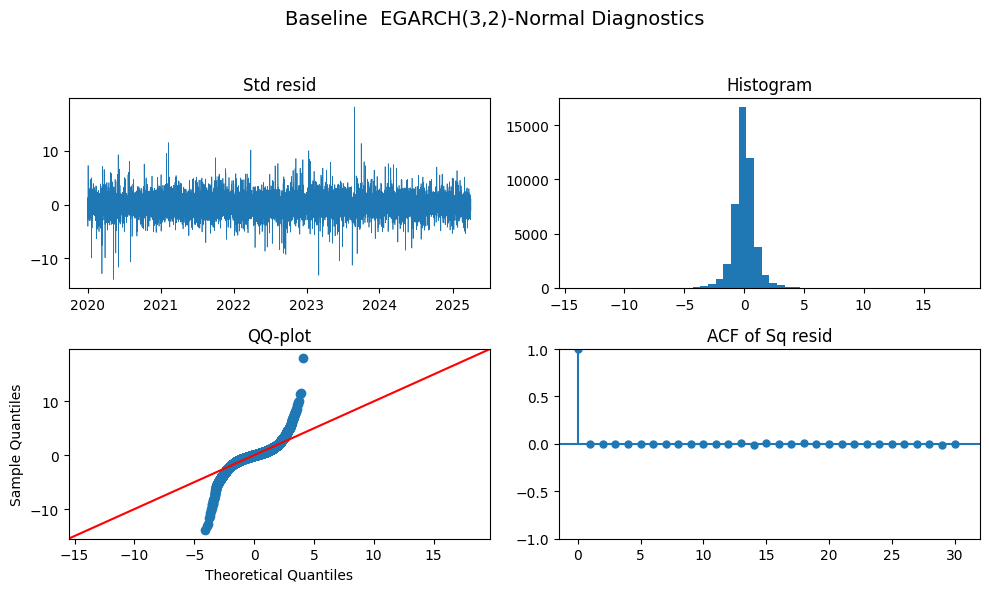

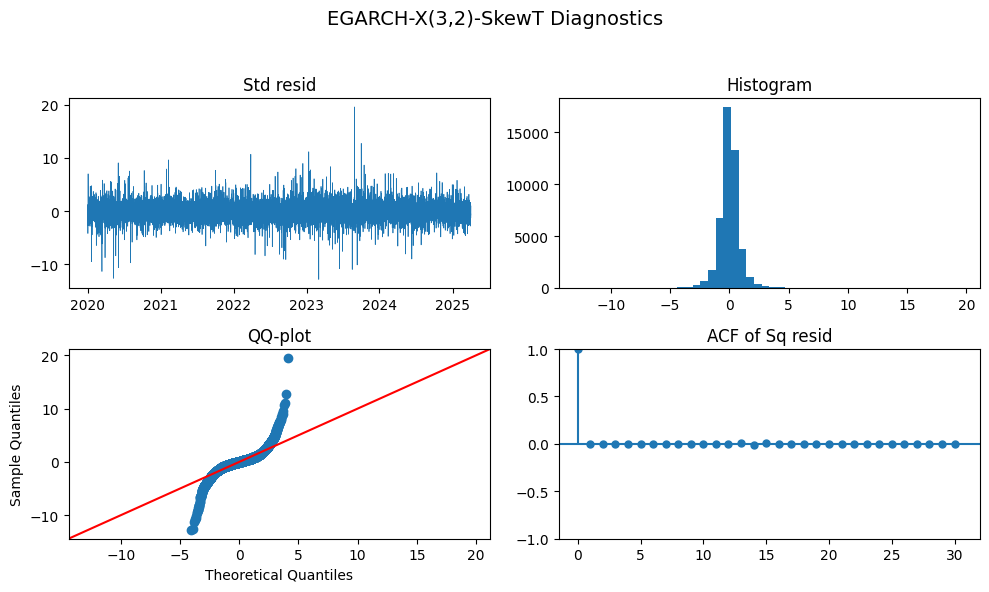

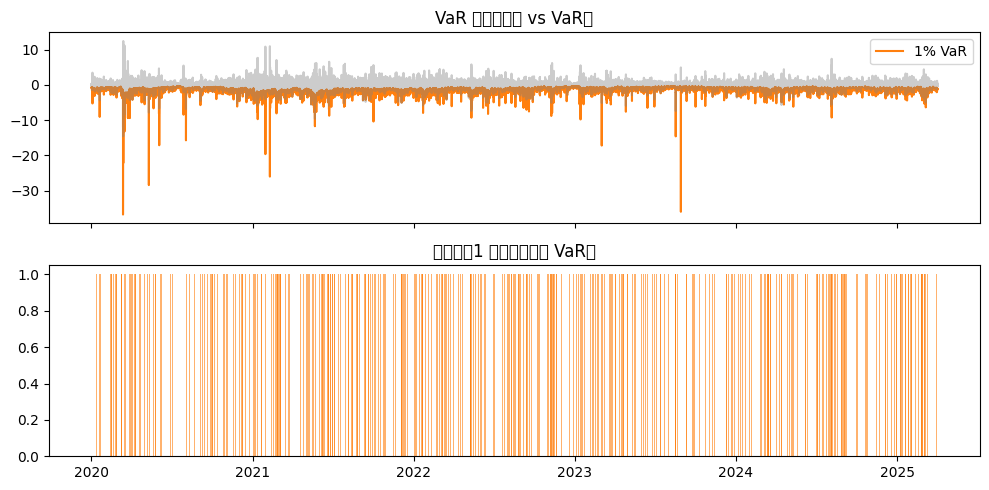

Breaches: 802/46045 = 1.74%


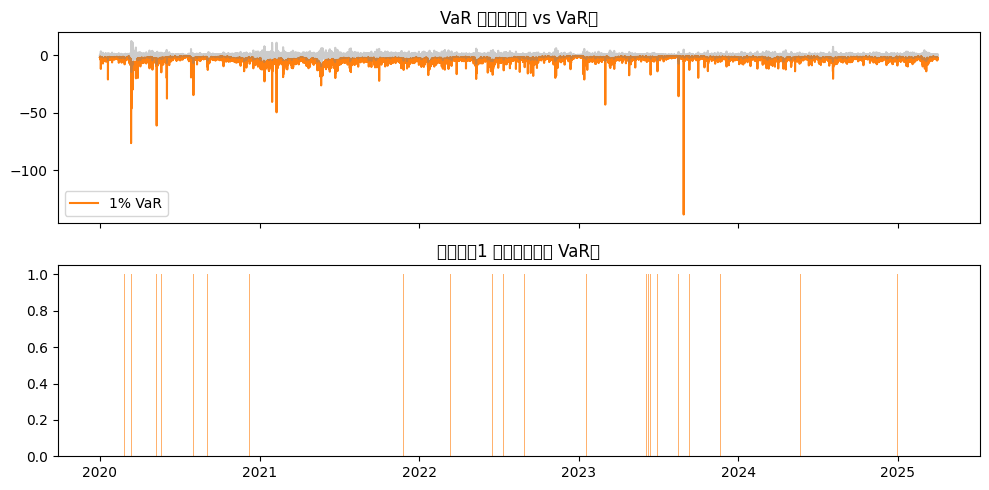

Breaches: 64/46045 = 0.14%


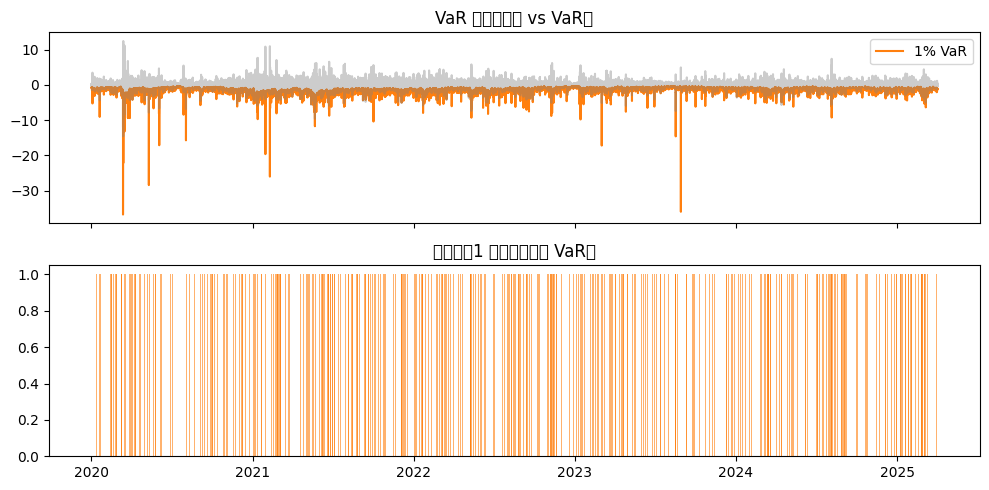

Breaches: 802/46045 = 1.74%


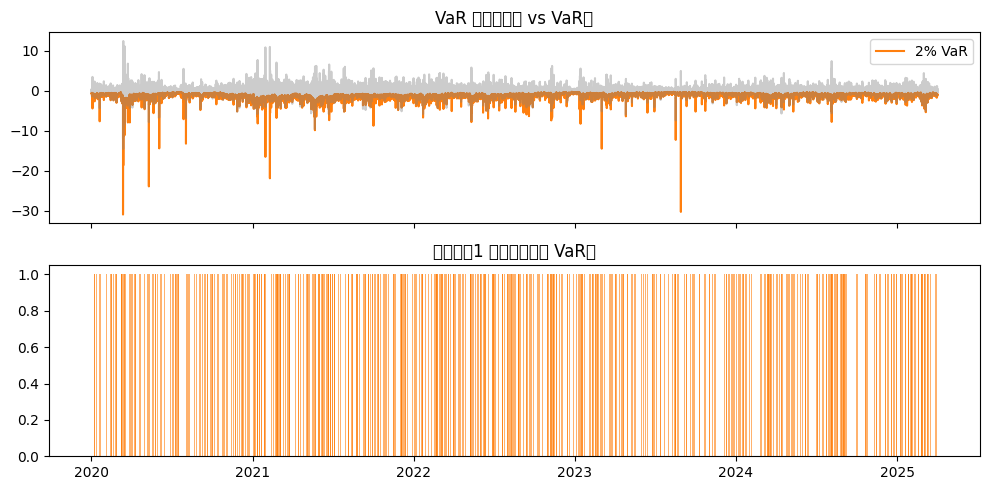

Breaches: 1195/46045 = 2.60%


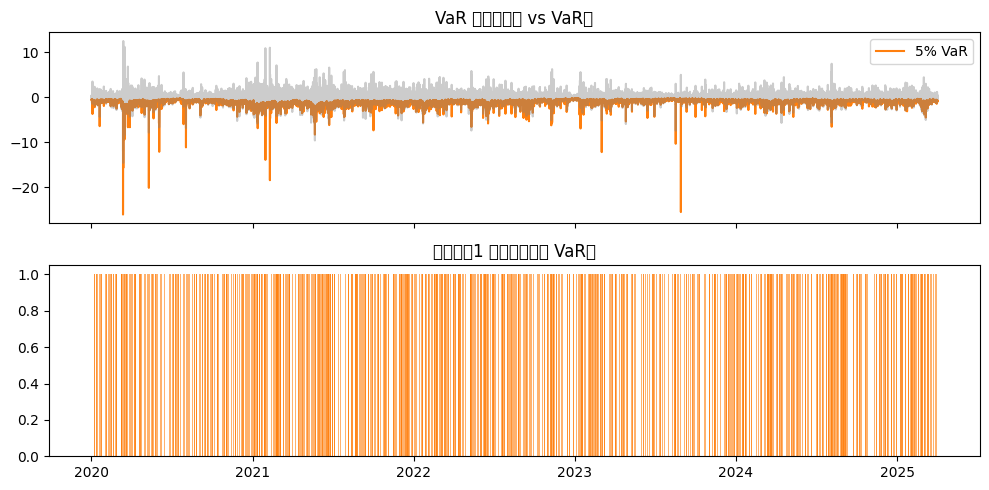

Breaches: 1782/46045 = 3.87%


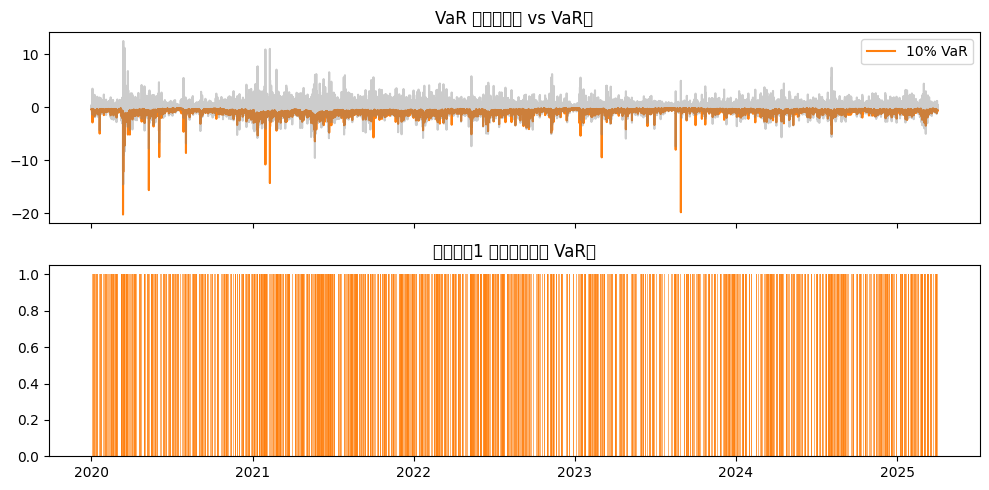

Breaches: 2877/46045 = 6.25%


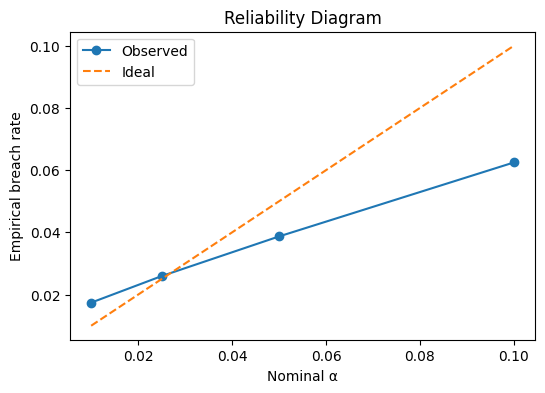

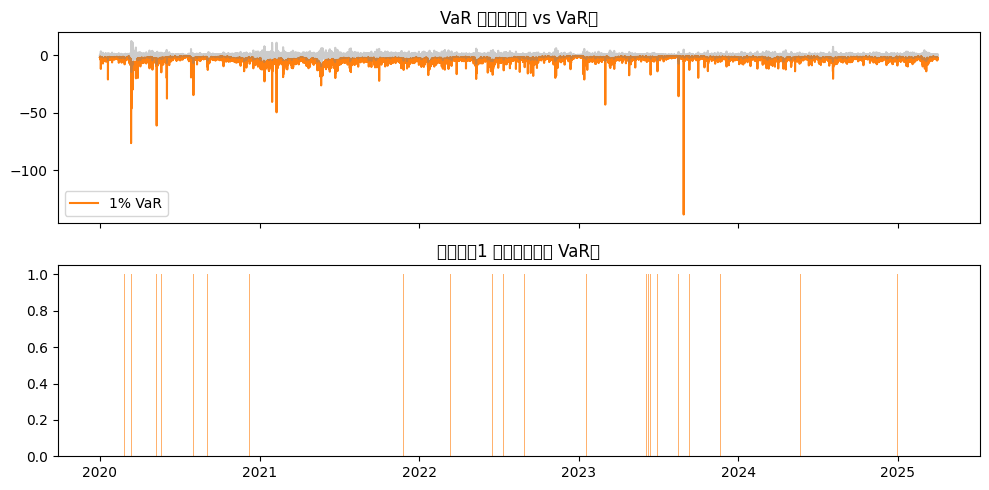

Breaches: 64/46045 = 0.14%


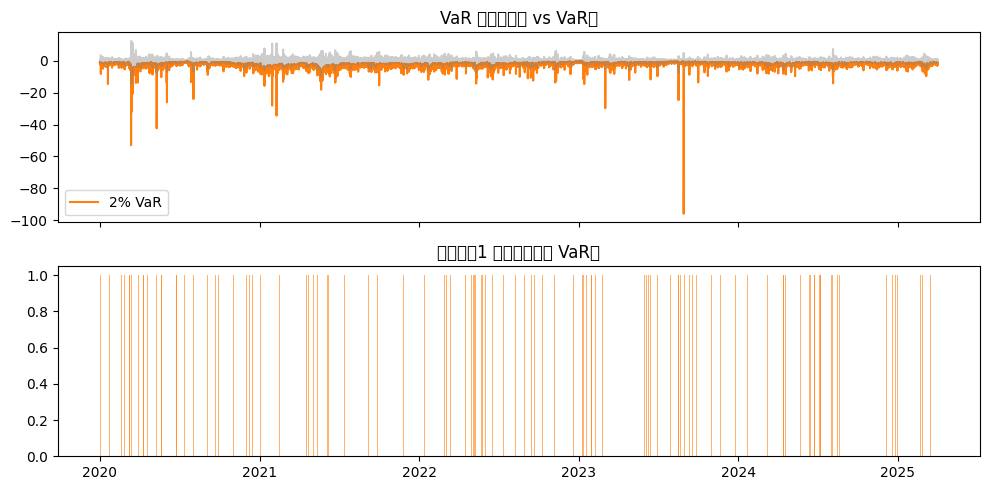

Breaches: 243/46045 = 0.53%


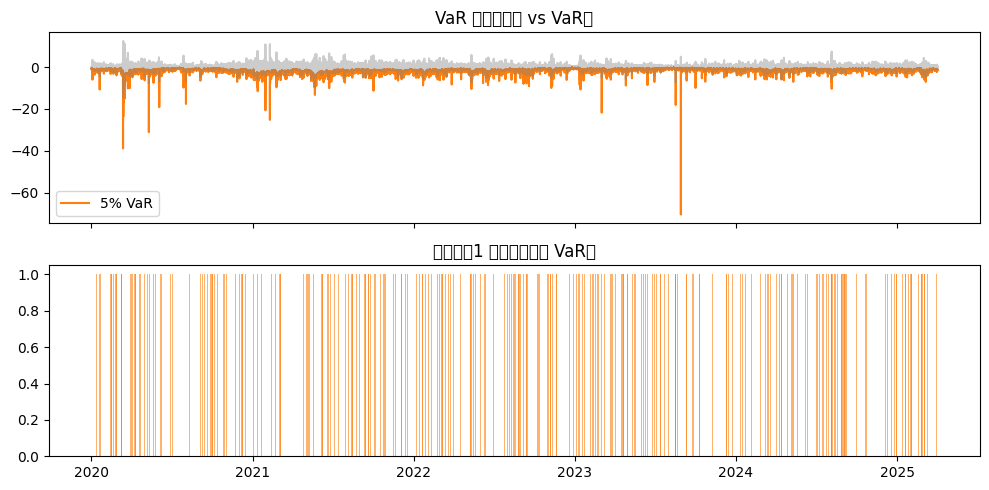

Breaches: 588/46045 = 1.28%


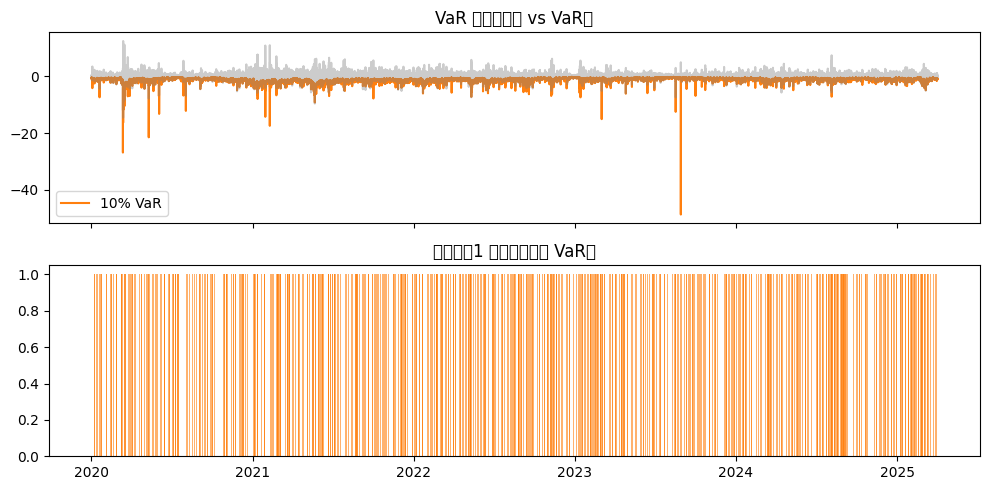

Breaches: 1449/46045 = 3.15%


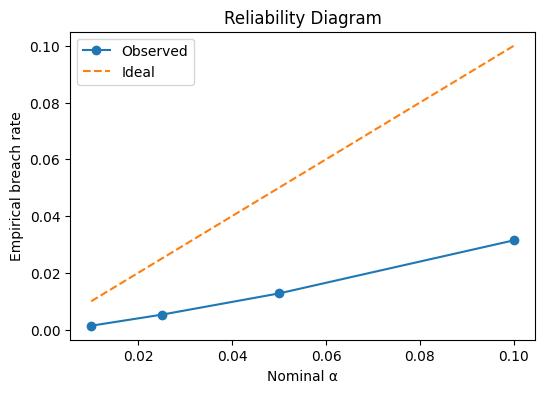

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot

# 1) Êï∞ÊçÆÂáÜÂ§á
btc_df = btc_df.sort_index()
r_t = np.log(btc_df["close"]).diff().dropna() * 100
sent_z = (btc_df["sentiment"]
          .reindex(r_t.index).interpolate().ffill())
sent_z = (sent_z - sent_z.mean())/sent_z.std()

# 2) ÊãüÂêà Baseline EGARCH(3,2)-Normal
am_base = arch_model(r_t, mean='Constant', vol='EGARCH', p=3, q=2, dist='normal')
res_base = am_base.fit(disp='off')

#    ÊãüÂêà EGARCH-X(3,2)-SkewT
am_x = arch_model(r_t, mean='Constant', vol='EGARCH', p=3, q=2,
                  x=sent_z.values.reshape(-1,1), dist='skewt')
res_x = am_x.fit(disp='off')

# 3) AIC ÊØîËæÉ
print("Baseline AIC:", res_base.aic)
print("EGARCH-X AIC:", res_x.aic)

# 4) ÊÆãÂ∑ÆËØäÊñ≠ÂáΩÊï∞
def plot_diagnostics(res, title):
    std_res = res.std_resid
    fig, axes = plt.subplots(2,2, figsize=(10,6))
    fig.suptitle(f"{title} Diagnostics", fontsize=14)
    # Êó∂Â∫è & Áõ¥ÊñπÂõæ
    axes[0,0].plot(std_res, lw=0.5); axes[0,0].set_title("Std resid")
    axes[0,1].hist(std_res, bins=50);        axes[0,1].set_title("Histogram")
    # QQ-plot
    qqplot(std_res, line='45', ax=axes[1,0])
    axes[1,0].set_title("QQ-plot")
    # ACF of squared resid
    plot_acf(std_res**2, lags=30, ax=axes[1,1])
    axes[1,1].set_title("ACF of Sq resid")
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

plot_diagnostics(res_base,  "Baseline  EGARCH(3,2)-Normal")
plot_diagnostics(res_x,     "EGARCH-X(3,2)-SkewT")

# 5) 1%-VaR ÁîüÊàê & ÂõûÊµã
def backtest_var(res, alpha=0.01, use_skewt=False):
    mu  = res.params["mu"]
    œÉ   = res.conditional_volatility

    # 1% ÂàÜ‰ΩçÊï∞ÔºàÊ≥®ÊÑè skew‚Äêt ÊöÇÁî® student‚ÄêtÔºâ
    if use_skewt:
        ŒΩ   = res.params["eta"]
        z_q = stats.t.ppf(alpha, df=ŒΩ)
    else:
        z_q = stats.norm.ppf(alpha)

    # 1‚Äêstep VaRÔºàË¥üÊï∞Ôºâ
    VaR = mu + œÉ * z_q

    # ËøùÁ∫¶ÔºöÂΩìÊó•Êî∂Áõä r_t ‰Ωé‰∫éËøô‰∏™ VaRÔºà‰πüÂ∞±ÊòØ‚ÄúÊØî ‚àí3% Êõ¥ÊÉ®‚ÄùÊâçÁÆóËøùÁ∫¶Ôºâ
    breaches = (r_t < VaR).astype(int)

    # ÁîªÂõæÔºöÁõ¥Êé•Áîª VaRÔºàË¥üÊï∞Ôºâ
    fig,(ax1,ax2) = plt.subplots(2,1, figsize=(10,5), sharex=True)
    ax1.plot(VaR,      label=f"{int(alpha*100)}% VaR", color='C1')
    ax1.plot(r_t,      color='gray', alpha=0.4)
    ax1.set_title("VaR ÂõûÊµãÔºàÊî∂Áõä vs VaRÔºâ")
    ax1.legend()

    ax2.bar(breaches.index, breaches, width=1, color='C1', alpha=0.6)
    ax2.set_title("ËøùÁ∫¶Êù°Ôºà1 Ë°®Á§∫ÂΩìÊó•Ë∑åÁ†¥ VaRÔºâ")

    plt.tight_layout()
    plt.show()

    n = breaches.sum()
    N = len(breaches)
    print(f"Breaches: {n}/{N} = {n/N:.2%}")
    return VaR, breaches


VaR_b, bre_b = backtest_var(res_base, alpha=0.01, use_skewt=False)
VaR_x, bre_x = backtest_var(res_x,    alpha=0.01, use_skewt=True)

# 6) Reliability Diagram
def reliability_diagram(res, alphas=[0.01,0.025,0.05,0.1], use_skewt=False):
    obs = []
    for Œ± in alphas:
        _, br = backtest_var(res, alpha=Œ±, use_skewt=use_skewt)
        obs.append(br.sum()/len(br))
    plt.figure(figsize=(6,4))
    plt.plot(alphas, obs, 'o-', label="Observed")
    plt.plot(alphas, alphas, '--', label="Ideal")
    plt.xlabel("Nominal Œ±"); plt.ylabel("Empirical breach rate")
    plt.title("Reliability Diagram")
    plt.legend()
    plt.show()

reliability_diagram(res_base, use_skewt=False)
reliability_diagram(res_x,    use_skewt=True)
